# data source

original data source: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015

### notes about sample weights
1. A sample weight is assigned to each record (identified by unique 'SEQN' variable. It is a measure of the number of people in the population represented by that sample person in NHANES, reflecting the unequal probability of selection, nonresponse adjustment, and adjustment to independent population controls.
2. Each component subsample has its own designated weight, which accounts for the additional probability of selection into the subsample component, as well as the additional nonresponse. 
3. It is important to check all of the variables in your analysis and select the weight of the smallest analysis subpopulation that includes all the variables you want to include in your analysis. 


#### List of sample weight variables included in files:
**demog_df:**   
'WTINT2YR' = full sample 2 year interview weight;
'WTMEC2YR' = full sample 2 year MEC exam weight.

**tot_intake1_df, tot_intake2_df:**
'WTDRD1' = Dietary day one sample weight
'WTDR2D' = Dietary two-day sample weight

**tot_diet_supp_1_df, tot_diet_supp_2_df:**
'WTDRD1' = Dietary day one sample weight
'WTDR2D' = Dietary two-day sample weight

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from scipy.stats.stats import ttest_ind
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_columns', 1700)
pd.set_option('display.max_rows', 500)

# read files into pandas
each df has individual needs & requires unique name; not common problem; unable to find solution/alternative to individually reading files into pandas df despite google, slack & mentor

In [4]:
import os
import glob

path = r'C:\Users\katec\Thinkful\data_collections\NHANES_data\2015_2016_data' # use your path
file_names = glob.glob(path + '/*.csv')

In [5]:
file_names

['C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\body_measures_15_16.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\bpq.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\bp_15_16.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\cbc_15_16.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\demo_15_16.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\hdl_15_16.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\HSCRP_I.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\medical_cond.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\std_chem.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\total_dietary_intake_1.csv',
 'C:\\Users\\katec\\Thinkful\\data_collections\\NHANE

# read files 
#### attempts to use for loops, ordered dictionary, function, and to concat not successful;

each df has individual needs & requires unique name; not common problem; unable to find solution/alternative to individually reading files into pandas df despite google, slack & mentor

see attempts:
https://github.com/kathieking/Thinkful/blob/master/check42_initial_read_concat-Copy2.ipynb

In [6]:
body_measures_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\body_measures_15_16.csv')

In [7]:
bp_quest_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\bpq.csv')

In [8]:
bp_measure_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\bp_15_16.csv')

In [9]:
cbc_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\cbc_15_16.csv')

In [10]:
demog_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\demo_15_16.csv')

In [11]:
hdl_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\hdl_15_16.csv')

In [12]:
hscrp_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\HSCRP_I.csv')

In [13]:
med_cond_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\medical_cond.csv')

In [14]:
std_chem_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\std_chem.csv')

In [15]:
tot_intake1_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\total_dietary_intake_1.csv')

In [16]:
tot_intake2_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\total_dietary_intake_2.csv')

In [17]:
tot_chol_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\tot_chol_15_16.csv')

In [18]:
tot_diet_supp_1_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\tot_diet_supplement_1.csv')

In [19]:
tot_diet_supp_2_df = pd.read_csv(r'C:\\Users\\katec\\Thinkful\\data_collections\\NHANES_data\\2015_2016_data\\tot_diet_supplement_2.csv')

# create dataframes and reduce each df to useful variables

## body measurements

In [20]:
body_measures_df.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM
0,83732.0,1.0,94.8,0.0,0.0,0.0,0.0,0,184.5,0,27.8,0,43.3,0,43.6,0,35.9,0,101.1,0,22.9,22.7,0.0,0.0,22.8,0
1,83733.0,1.0,90.4,0.0,0.0,0.0,0.0,0,171.4,0,30.8,0,38.0,0,40.0,0,33.2,0,107.9,0,27.5,27.1,0.0,0.0,27.3,0
2,83734.0,1.0,83.4,0.0,0.0,0.0,0.0,0,170.1,0,28.8,0,35.6,0,37.0,0,31.0,0,116.5,0,26.7,26.5,0.0,0.0,26.6,0
3,83735.0,1.0,109.8,0.0,0.0,0.0,0.0,0,160.9,0,42.4,0,38.5,0,37.7,0,38.3,0,110.1,0,25.2,25.0,0.0,0.0,25.1,0
4,83736.0,3.0,55.2,0.0,0.0,0.0,0.0,0,164.9,0,20.3,0,37.4,0,36.0,0,27.2,0,80.4,0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
body_measures_df.tail()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM
9595,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.0,0,165.0,0,21.4,0,38.2,0,33.5,0,26.2,0,72.5,0,16.9,16.9,0.0,0.0,16.9,0
9596,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.0,0,165.0,0,21.4,0,38.2,0,33.5,0,26.2,0,72.5,0,16.9,16.9,0.0,0.0,16.9,0
9597,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.0,0,165.0,0,21.4,0,38.2,0,33.5,0,26.2,0,72.5,0,16.9,16.9,0.0,0.0,16.9,0
9598,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.0,0,165.0,0,21.4,0,38.2,0,33.5,0,26.2,0,72.5,0,16.9,16.9,0.0,0.0,16.9,0
9599,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.0,0,165.0,0,21.4,0,38.2,0,33.5,0,26.2,0,72.5,0,16.9,16.9,0.0,0.0,16.9,0


In [22]:
body_measures_df['SEQN'].nunique()

9545

In [23]:
#eliminatimg columns not using
body_measures_df = body_measures_df.drop(
    ['BMDSTATS', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD',
     'BMIHEAD', 'BMIHT', 'BMDBMIC', 'BMXLEG', 'BMILEG', 
     'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMIWAIST', 
     'BMXSAD1', 'BMXSAD2', 'BMXSAD3', 'BMXSAD4', 'BMDSADCM'], axis=1)
body_measures_df.head()

,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD
0,83732.0,94.8,184.5,27.8,101.1,22.8
1,83733.0,90.4,171.4,30.8,107.9,27.3
2,83734.0,83.4,170.1,28.8,116.5,26.6
3,83735.0,109.8,160.9,42.4,110.1,25.1
4,83736.0,55.2,164.9,20.3,80.4,0.0


In [24]:
# no measure = 0, change 0 to NaN
body_measures_df = body_measures_df.replace(0, np.nan)

In [25]:
body_measures_df.isnull().sum()

SEQN           0
BMXWT         99
BMXHT        775
BMXBMI       788
BMXWAIST    1231
BMDAVSAD    2561
dtype: int64

In [26]:
body_measures_df.head()

,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD
0,83732.0,94.8,184.5,27.8,101.1,22.8
1,83733.0,90.4,171.4,30.8,107.9,27.3
2,83734.0,83.4,170.1,28.8,116.5,26.6
3,83735.0,109.8,160.9,42.4,110.1,25.1
4,83736.0,55.2,164.9,20.3,80.4,NaN


In [27]:
body_measures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 6 columns):
SEQN        9600 non-null float64
BMXWT       9501 non-null float64
BMXHT       8825 non-null float64
BMXBMI      8812 non-null float64
BMXWAIST    8369 non-null float64
BMDAVSAD    7039 non-null float64
dtypes: float64(6)
memory usage: 450.1 KB


## blood pressure questions

In [28]:
bp_quest_df.head()

,SEQN,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D
0,83732.0,2.0,0.0,0,0,0,2,1,1,2,0
1,83733.0,2.0,0.0,0,0,0,2,2,0,0,0
2,83734.0,1.0,1.0,55,1,1,1,0,1,1,2
3,83735.0,2.0,0.0,0,0,0,2,1,2,2,0
4,83736.0,2.0,0.0,0,0,0,2,1,1,2,0


In [29]:
bp_quest_df.tail()

,SEQN,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D
6395,3.687825e-40,3.687825e-40,3.687825e-40,0,0,0,2,1,1,2,0
6396,3.687825e-40,3.687825e-40,3.687825e-40,0,0,0,2,1,1,2,0
6397,3.687825e-40,3.687825e-40,3.687825e-40,0,0,0,2,1,1,2,0
6398,3.687825e-40,3.687825e-40,3.687825e-40,0,0,0,2,1,1,2,0
6399,3.687825e-40,3.687825e-40,3.687825e-40,0,0,0,2,1,1,2,0


In [30]:
bp_quest_df['SEQN'].nunique()

6328

In [31]:
# no measure = 0, change 0 to NaN
bp_quest_df = bp_quest_df.replace(0, np.nan)

In [32]:
bp_quest_df.isnull().sum()

SEQN          0
BPQ020        0
BPQ030     4237
BPD035     4311
BPQ040A    4310
BPQ050A    4549
BPQ080        0
BPQ060     1960
BPQ070     1689
BPQ090D    1689
BPQ100D    4876
dtype: int64

In [33]:
# drop question "age told have high bp"
bp_quest_df = bp_quest_df.drop(['BPD035'], axis=1)

In [34]:
bp_quest_df.head()

,SEQN,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D
0,83732.0,2.0,NaN,NaN,NaN,2,1.0,1.0,2.0,NaN
1,83733.0,2.0,NaN,NaN,NaN,2,2.0,NaN,NaN,NaN
2,83734.0,1.0,1.0,1.0,1.0,1,NaN,1.0,1.0,2.0
3,83735.0,2.0,NaN,NaN,NaN,2,1.0,2.0,2.0,NaN
4,83736.0,2.0,NaN,NaN,NaN,2,1.0,1.0,2.0,NaN


In [35]:
bp_quest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
SEQN       6400 non-null float64
BPQ020     6400 non-null float64
BPQ030     2163 non-null float64
BPQ040A    2090 non-null float64
BPQ050A    1851 non-null float64
BPQ080     6400 non-null int64
BPQ060     4440 non-null float64
BPQ070     4711 non-null float64
BPQ090D    4711 non-null float64
BPQ100D    1524 non-null float64
dtypes: float64(9), int64(1)
memory usage: 500.1 KB


## blood pressure measurements

In [36]:
bp_measure_df.head()

,SEQN,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
0,83732.0,0.0,0.0,1.0,4.0,76.0,1,1,150,128,70,2,124,64,2,116,62,2,0,0,0
1,83733.0,0.0,0.0,1.0,4.0,72.0,1,1,170,146,88,2,140,88,2,134,82,2,0,0,0
2,83734.0,0.0,0.0,1.0,4.0,56.0,1,1,160,138,46,2,132,44,2,136,46,2,0,0,0
3,83735.0,0.0,0.0,1.0,5.0,78.0,1,1,150,132,72,2,134,68,2,136,70,2,0,0,0
4,83736.0,0.0,0.0,1.0,3.0,76.0,1,1,130,100,70,2,114,54,2,98,56,2,0,0,0


In [37]:
bp_measure_df.tail()

,SEQN,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
9595,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,1,1,150,118,66,2,114,68,2,124,64,2,0,0,0
9596,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,1,1,150,118,66,2,114,68,2,124,64,2,0,0,0
9597,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,1,1,150,118,66,2,114,68,2,124,64,2,0,0,0
9598,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,1,1,150,118,66,2,114,68,2,124,64,2,0,0,0
9599,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,1,1,150,118,66,2,114,68,2,124,64,2,0,0,0


In [38]:
bp_measure_df['SEQN'].nunique()

9545

In [39]:
bp_measure_df = bp_measure_df.drop(['PEASCCT1', 'BPXCHR', 'BPAARM', 
                                    'BPACSZ', 'BPXPLS', 'BPXPULS', 
                                    'BPXPTY', 'BPXML1', 'BPAEN1',
                                    'BPAEN2', 'BPAEN3', 'BPAEN4'], axis=1)
bp_measure_df.head()

,SEQN,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,BPXSY4,BPXDI4
0,83732.0,128,70,124,64,116,62,0,0
1,83733.0,146,88,140,88,134,82,0,0
2,83734.0,138,46,132,44,136,46,0,0
3,83735.0,132,72,134,68,136,70,0,0
4,83736.0,100,70,114,54,98,56,0,0


In [40]:
# no measure = 0, change 0 to NaN
bp_measure_df = bp_measure_df.replace(0, np.nan)

In [41]:
bp_measure_df.isnull().sum()

SEQN         0
BPXSY1    2399
BPXDI1    2457
BPXSY2    2231
BPXDI2    2297
BPXSY3    2268
BPXDI3    2345
BPXSY4    9276
BPXDI4    9284
dtype: int64

### create average from 4 bp readings, delete individual readings

In [42]:
bp_measure_df['bp_sys_avg'] = bp_measure_df[['BPXSY1','BPXSY2','BPXSY3','BPXSY4']].mean(axis=1)

In [43]:
bp_measure_df['bp_dis_avg'] = bp_measure_df[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4']].mean(axis=1)

In [44]:
bp_measure_df.head()

,SEQN,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,BPXSY4,BPXDI4,bp_sys_avg,bp_dis_avg
0,83732.0,128.0,70.0,124.0,64.0,116.0,62.0,NaN,NaN,122.666667,65.333333
1,83733.0,146.0,88.0,140.0,88.0,134.0,82.0,NaN,NaN,140.000000,86.000000
2,83734.0,138.0,46.0,132.0,44.0,136.0,46.0,NaN,NaN,135.333333,45.333333
3,83735.0,132.0,72.0,134.0,68.0,136.0,70.0,NaN,NaN,134.000000,70.000000
4,83736.0,100.0,70.0,114.0,54.0,98.0,56.0,NaN,NaN,104.000000,60.000000


In [45]:
bp_measure_df = bp_measure_df.drop(['BPXSY1','BPXSY2','BPXSY3','BPXSY4',
                                 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4'], axis=1)

In [46]:
bp_measure_df.isnull().sum()

SEQN             0
bp_sys_avg    2181
bp_dis_avg    2209
dtype: int64

In [47]:
bp_measure_df.head()

,SEQN,bp_sys_avg,bp_dis_avg
0,83732.0,122.666667,65.333333
1,83733.0,140.000000,86.000000
2,83734.0,135.333333,45.333333
3,83735.0,134.000000,70.000000
4,83736.0,104.000000,60.000000


In [48]:
bp_measure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 3 columns):
SEQN          9600 non-null float64
bp_sys_avg    7419 non-null float64
bp_dis_avg    7391 non-null float64
dtypes: float64(3)
memory usage: 225.1 KB


## complete blood count

In [49]:
cbc_df.head()

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMCH,LBXRDW,LBXPLTSI,LBXMPSI
0,83732.0,9.8,23.9,8.2,63.5,4.0,0.5,2.3,0.8,6.2,0.4,0.0,4.93,15.2,44.7,90.8,30.8,0,13.9,181,8.3
1,83733.0,7.3,31.3,9.7,54.8,2.6,1.8,2.3,0.7,4.0,0.2,0.1,4.89,17.5,49.7,101.8,35.8,0,13.4,170,9.6
2,83734.0,4.4,29.9,9.6,55.8,3.9,0.9,1.3,0.4,2.5,0.2,0.0,4.18,12.4,37.9,90.8,29.6,0,14.7,223,9.0
3,83735.0,6.1,17.1,10.3,68.7,3.1,0.9,1.0,0.6,4.2,0.2,0.1,4.54,12.8,40.1,88.3,28.2,0,13.1,280,9.1
4,83736.0,4.2,47.1,7.8,44.8,0.2,0.2,2.0,0.3,1.9,0.0,0.0,4.16,12.1,36.5,87.8,29.1,0,12.3,275,7.7


In [50]:
cbc_df.tail()

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMCH,LBXRDW,LBXPLTSI,LBXMPSI
9195,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,0.0,0.0,4.58,12.8,39.4,86.3,28.0,0,13.8,257,8.7
9196,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,0.0,0.0,4.58,12.8,39.4,86.3,28.0,0,13.8,257,8.7
9197,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,0.0,0.0,4.58,12.8,39.4,86.3,28.0,0,13.8,257,8.7
9198,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,0.0,0.0,4.58,12.8,39.4,86.3,28.0,0,13.8,257,8.7
9199,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,0.0,0.0,4.58,12.8,39.4,86.3,28.0,0,13.8,257,8.7


In [51]:
cbc_df['SEQN'].nunique()

9166

In [52]:
cbc_df = cbc_df.replace(0, np.nan)

In [53]:
cbc_df.isnull().sum()

SEQN           0
LBXWBCSI    1048
LBXLYPCT    1049
LBXMOPCT    1049
LBXNEPCT    1049
LBXEOPCT    1066
LBXBAPCT    1049
LBDLYMNO    1049
LBDMONO     1049
LBDNENO     1049
LBDEONO     1495
LBDBANO     4940
LBXRBCSI    1048
LBXHGB      1048
LBXHCT      1048
LBXMCVSI    1048
LBXMCHSI    1048
LBXMCH      9200
LBXRDW      1048
LBXPLTSI    1048
LBXMPSI     1048
dtype: int64

In [54]:
cbc_df = cbc_df.drop(['LBXMCH', 'LBDBANO'], axis=1)

In [55]:
cbc_df.head()

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI
0,83732.0,9.8,23.9,8.2,63.5,4.0,0.5,2.3,0.8,6.2,0.4,4.93,15.2,44.7,90.8,30.8,13.9,181.0,8.3
1,83733.0,7.3,31.3,9.7,54.8,2.6,1.8,2.3,0.7,4.0,0.2,4.89,17.5,49.7,101.8,35.8,13.4,170.0,9.6
2,83734.0,4.4,29.9,9.6,55.8,3.9,0.9,1.3,0.4,2.5,0.2,4.18,12.4,37.9,90.8,29.6,14.7,223.0,9.0
3,83735.0,6.1,17.1,10.3,68.7,3.1,0.9,1.0,0.6,4.2,0.2,4.54,12.8,40.1,88.3,28.2,13.1,280.0,9.1
4,83736.0,4.2,47.1,7.8,44.8,0.2,0.2,2.0,0.3,1.9,NaN,4.16,12.1,36.5,87.8,29.1,12.3,275.0,7.7


In [56]:
cbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 19 columns):
SEQN        9200 non-null float64
LBXWBCSI    8152 non-null float64
LBXLYPCT    8151 non-null float64
LBXMOPCT    8151 non-null float64
LBXNEPCT    8151 non-null float64
LBXEOPCT    8134 non-null float64
LBXBAPCT    8151 non-null float64
LBDLYMNO    8151 non-null float64
LBDMONO     8151 non-null float64
LBDNENO     8151 non-null float64
LBDEONO     7705 non-null float64
LBXRBCSI    8152 non-null float64
LBXHGB      8152 non-null float64
LBXHCT      8152 non-null float64
LBXMCVSI    8152 non-null float64
LBXMCHSI    8152 non-null float64
LBXRDW      8152 non-null float64
LBXPLTSI    8152 non-null float64
LBXMPSI     8152 non-null float64
dtypes: float64(19)
memory usage: 1.3 MB


## demographics

In [57]:
demog_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1,62,0,3,3,1,0,2,0,1,1,0,0,5,1,0,1,2,2,1,2,2,1,2,2,1,2,2,0,0,1,1,62,1,5,1,3,134671.370419,135629.507405,1,125,10,10,4.39
1,83733.0,9.0,2.0,1,53,0,3,3,1,0,2,0,2,2,7,0,3,3,0,1,2,2,1,2,2,1,2,2,1,1,1,0,0,0,1,53,2,3,3,0,24328.560239,25282.425927,1,125,4,4,1.32
2,83734.0,9.0,2.0,1,78,0,3,3,2,0,1,2,1,1,0,0,3,1,0,1,2,2,1,2,2,1,2,2,0,2,2,0,0,2,2,79,1,3,1,3,12400.008522,12575.838818,1,131,5,5,1.51
3,83735.0,9.0,2.0,2,56,0,3,3,2,0,2,0,1,1,0,0,5,6,0,1,2,2,1,2,2,1,2,2,1,1,1,0,0,0,2,56,1,5,6,0,102717.995647,102078.634508,1,131,10,10,5.00
4,83736.0,9.0,2.0,2,42,0,4,4,2,0,2,0,1,1,0,0,4,3,1,1,2,2,1,2,2,1,2,2,1,5,5,0,2,0,2,42,1,4,3,0,17627.674984,18234.736219,2,126,7,7,1.23


In [58]:
demog_df.tail()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
9995,3.687825e-40,3.687825e-40,3.687825e-40,2,24,0,3,3,2,0,2,0,1,1,0,0,5,5,2,1,2,2,1,2,2,1,2,2,1,3,1,0,0,0,2,22,1,5,5,0,107361.906644,105080.445194,2,119,10,7,3.54
9996,3.687825e-40,3.687825e-40,3.687825e-40,2,24,0,3,3,2,0,2,0,1,1,0,0,5,5,2,1,2,2,1,2,2,1,2,2,1,3,1,0,0,0,2,22,1,5,5,0,107361.906644,105080.445194,2,119,10,7,3.54
9997,3.687825e-40,3.687825e-40,3.687825e-40,2,24,0,3,3,2,0,2,0,1,1,0,0,5,5,2,1,2,2,1,2,2,1,2,2,1,3,1,0,0,0,2,22,1,5,5,0,107361.906644,105080.445194,2,119,10,7,3.54
9998,3.687825e-40,3.687825e-40,3.687825e-40,2,24,0,3,3,2,0,2,0,1,1,0,0,5,5,2,1,2,2,1,2,2,1,2,2,1,3,1,0,0,0,2,22,1,5,5,0,107361.906644,105080.445194,2,119,10,7,3.54
9999,3.687825e-40,3.687825e-40,3.687825e-40,2,24,0,3,3,2,0,2,0,1,1,0,0,5,5,2,1,2,2,1,2,2,1,2,2,1,3,1,0,0,0,2,22,1,5,5,0,107361.906644,105080.445194,2,119,10,7,3.54


In [59]:
demog_df['SEQN'].nunique()

9972

In [60]:
demog_df = demog_df.drop(
    ['SDDSRVYR', 'RIDSTATR', 'RIDAGEMN', 'RIDEXAGM', 'RIDRETH1',
     'RIDRETH3', 'RIDEXMON', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4', 
     'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 
     'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 
     'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP',
     'AIALANGA', 'DMDFMSIZ', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 
     'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU',
     'DMDHRMAR', 'DMDHSEDU', 'SDMVPSU', 'SDMVSTRA', 
     'INDHHIN2', 'INDFMIN2'], axis=1)
demog_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR
0,83732.0,1,62,134671.370419,135629.507405,4.39
1,83733.0,1,53,24328.560239,25282.425927,1.32
2,83734.0,1,78,12400.008522,12575.838818,1.51
3,83735.0,2,56,102717.995647,102078.634508,5.00
4,83736.0,2,42,17627.674984,18234.736219,1.23


In [61]:
demog_df = demog_df.replace(0, np.nan)

In [62]:
demog_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR     396
WTINT2YR       0
WTMEC2YR     427
INDFMPIR    1144
dtype: int64

In [63]:
demog_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR
0,83732.0,1,62.0,134671.370419,135629.507405,4.39
1,83733.0,1,53.0,24328.560239,25282.425927,1.32
2,83734.0,1,78.0,12400.008522,12575.838818,1.51
3,83735.0,2,56.0,102717.995647,102078.634508,5.00
4,83736.0,2,42.0,17627.674984,18234.736219,1.23


In [64]:
demog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
SEQN        10000 non-null float64
RIAGENDR    10000 non-null int64
RIDAGEYR    9604 non-null float64
WTINT2YR    10000 non-null float64
WTMEC2YR    9573 non-null float64
INDFMPIR    8856 non-null float64
dtypes: float64(5), int64(1)
memory usage: 468.8 KB


## hdl cholesterol

In [65]:
hdl_df.head()

,SEQN,LBDHDD,LBDHDDSI
0,83732.0,46.0,1.19
1,83733.0,63.0,1.63
2,83734.0,30.0,0.78
3,83735.0,61.0,1.58
4,83736.0,53.0,1.37


In [66]:
hdl_df.tail()

,SEQN,LBDHDD,LBDHDDSI
8095,3.687825e-40,3.687825e-40,3.687825e-40
8096,3.687825e-40,3.687825e-40,3.687825e-40
8097,3.687825e-40,3.687825e-40,3.687825e-40
8098,3.687825e-40,3.687825e-40,3.687825e-40
8099,3.687825e-40,3.687825e-40,3.687825e-40


In [67]:
hdl_df['SEQN'].nunique()

8022

In [68]:
hdl_df = hdl_df.drop(['LBDHDDSI'], axis=1)
hdl_df.head()

,SEQN,LBDHDD
0,83732.0,46.0
1,83733.0,63.0
2,83734.0,30.0
3,83735.0,61.0
4,83736.0,53.0


In [69]:
# no measure = 0, change 0 to NaN
hdl_df = hdl_df.replace(0, np.nan)

In [70]:
hdl_df.isnull().sum()

SEQN        0
LBDHDD    765
dtype: int64

In [71]:
hdl_df.head()

,SEQN,LBDHDD
0,83732.0,46.0
1,83733.0,63.0
2,83734.0,30.0
3,83735.0,61.0
4,83736.0,53.0


In [72]:
hdl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 2 columns):
SEQN      8100 non-null float64
LBDHDD    7335 non-null float64
dtypes: float64(2)
memory usage: 126.6 KB


## high sensitivity C-reactive protein

In [73]:
hscrp_df.head()

,SEQN,LBXHSCRP,LBDHRPLC
0,83732.0,0.6,0.0
1,83733.0,1.4,0.0
2,83734.0,0.6,0.0
3,83735.0,9.0,0.0
4,83736.0,0.5,0.0


In [74]:
hscrp_df.tail()

,SEQN,LBXHSCRP,LBDHRPLC
9195,3.687825e-40,3.687825e-40,3.687825e-40
9196,3.687825e-40,3.687825e-40,3.687825e-40
9197,3.687825e-40,3.687825e-40,3.687825e-40
9198,3.687825e-40,3.687825e-40,3.687825e-40
9199,3.687825e-40,3.687825e-40,3.687825e-40


In [75]:
hscrp_df['SEQN'].nunique()

9166

In [76]:
hscrp_df = hscrp_df.drop(['LBDHRPLC'], axis=1)
hscrp_df.head()

,SEQN,LBXHSCRP
0,83732.0,0.6
1,83733.0,1.4
2,83734.0,0.6
3,83735.0,9.0
4,83736.0,0.5


In [77]:
# no measure = 0, change 0 to NaN
hscrp_df = hscrp_df.replace(0, np.nan)

In [78]:
hscrp_df.isnull().sum()

SEQN           0
LBXHSCRP    1298
dtype: int64

In [79]:
hscrp_df.head()

,SEQN,LBXHSCRP
0,83732.0,0.6
1,83733.0,1.4
2,83734.0,0.6
3,83735.0,9.0
4,83736.0,0.5


In [80]:
hscrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 2 columns):
SEQN        9200 non-null float64
LBXHSCRP    7902 non-null float64
dtypes: float64(2)
memory usage: 143.8 KB


## standard chemistry

In [81]:
std_chem_df.head()

,SEQN,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI
0,83732.0,4.6,46.0,52.0,21.0,25.0,13.0,4.64,25,9.8,2.450,172,4.448,203,100,0.90,79.56,2.9,29,94,5.22,22,70,12.5,4.30,110,136,272,4.7,1.518,0.5,8.55,7.5,75,158,1.784,4.2,249.8
1,83733.0,4.5,45.0,47.0,31.0,35.0,10.0,3.57,27,9.8,2.450,267,6.905,91,103,1.05,92.82,2.9,29,94,5.22,75,161,28.8,4.55,108,140,278,4.4,1.421,0.6,10.26,7.4,74,170,1.919,7.0,416.4
2,83734.0,4.5,45.0,46.0,30.0,29.0,26.0,9.28,24,9.7,2.425,236,6.103,160,106,1.12,99.01,2.8,28,103,5.72,11,72,12.9,4.70,151,140,284,3.6,1.162,0.5,8.55,7.3,73,299,3.376,7.3,434.2
3,83735.0,3.8,38.0,65.0,23.0,26.0,13.0,4.64,24,8.9,2.225,179,4.629,66,106,0.96,84.86,2.3,23,63,3.50,19,43,7.7,4.08,172,141,279,3.8,1.227,0.3,5.13,6.1,61,93,1.050,5.4,321.2
4,83736.0,4.3,43.0,46.0,20.0,13.0,12.0,4.28,24,9.3,2.325,202,5.224,67,99,0.64,56.58,3.4,34,83,4.61,23,44,7.9,3.50,93,136,270,3.2,1.033,0.3,5.13,7.7,77,52,0.587,3.3,196.3


In [82]:
std_chem_df.tail()

,SEQN,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI
6795,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25,9.0,2.25,163,4.215,78,102,0.66,58.34,2.9,29,101,5.61,11,156,27.9,3.84,93,138,275,2.8,0.904,0.5,8.55,6.8,68,79,0.892,4.2,249.8
6796,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25,9.0,2.25,163,4.215,78,102,0.66,58.34,2.9,29,101,5.61,11,156,27.9,3.84,93,138,275,2.8,0.904,0.5,8.55,6.8,68,79,0.892,4.2,249.8
6797,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25,9.0,2.25,163,4.215,78,102,0.66,58.34,2.9,29,101,5.61,11,156,27.9,3.84,93,138,275,2.8,0.904,0.5,8.55,6.8,68,79,0.892,4.2,249.8
6798,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25,9.0,2.25,163,4.215,78,102,0.66,58.34,2.9,29,101,5.61,11,156,27.9,3.84,93,138,275,2.8,0.904,0.5,8.55,6.8,68,79,0.892,4.2,249.8
6799,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25,9.0,2.25,163,4.215,78,102,0.66,58.34,2.9,29,101,5.61,11,156,27.9,3.84,93,138,275,2.8,0.904,0.5,8.55,6.8,68,79,0.892,4.2,249.8


In [83]:
std_chem_df['SEQN'].nunique()

6745

In [84]:
std_chem_df = std_chem_df.drop(
    ['LBDSALSI','LBDSBUSI','LBDSCASI','LBDSCHSI', 'LBDSCRSI', 
     'LBXSGB', 'LBDSGBSI', 'LBDSGLSI', 'LBXSGTSI', 'LBDSIRSI', 
     'LBDSTBSI', 'LBDSTPSI', 'LBDSTRSI', 'LBDSUASI'], axis=1)
std_chem_df.head()

,SEQN,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA
0,83732.0,4.6,52.0,21.0,25.0,13.0,25,9.8,172,203,100,0.90,94,70,4.30,110,136,272,4.7,1.518,0.5,7.5,158,4.2
1,83733.0,4.5,47.0,31.0,35.0,10.0,27,9.8,267,91,103,1.05,94,161,4.55,108,140,278,4.4,1.421,0.6,7.4,170,7.0
2,83734.0,4.5,46.0,30.0,29.0,26.0,24,9.7,236,160,106,1.12,103,72,4.70,151,140,284,3.6,1.162,0.5,7.3,299,7.3
3,83735.0,3.8,65.0,23.0,26.0,13.0,24,8.9,179,66,106,0.96,63,43,4.08,172,141,279,3.8,1.227,0.3,6.1,93,5.4
4,83736.0,4.3,46.0,20.0,13.0,12.0,24,9.3,202,67,99,0.64,83,44,3.50,93,136,270,3.2,1.033,0.3,7.7,52,3.3


In [85]:
std_chem_df = std_chem_df.replace(0, np.nan)

In [86]:
std_chem_df.isnull().sum()

SEQN          0
LBXSAL      488
LBXSAPSI    489
LBXSASSI    488
LBXSATSI    488
LBXSBU      489
LBXSC3SI    487
LBXSCA      487
LBXSCH      490
LBXSCK      496
LBXSCLSI    487
LBXSCR      489
LBXSGL      487
LBXSIR      491
LBXSKSI     487
LBXSLDSI    488
LBXSNASI    487
LBXSOSSI    490
LBXSPH      488
LBDSPHSI    488
LBXSTB      517
LBXSTP      491
LBXSTR      490
LBXSUA      490
dtype: int64

In [87]:
std_chem_df.head()

,SEQN,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA
0,83732.0,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,94.0,70.0,4.30,110.0,136.0,272.0,4.7,1.518,0.5,7.5,158.0,4.2
1,83733.0,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,94.0,161.0,4.55,108.0,140.0,278.0,4.4,1.421,0.6,7.4,170.0,7.0
2,83734.0,4.5,46.0,30.0,29.0,26.0,24.0,9.7,236.0,160.0,106.0,1.12,103.0,72.0,4.70,151.0,140.0,284.0,3.6,1.162,0.5,7.3,299.0,7.3
3,83735.0,3.8,65.0,23.0,26.0,13.0,24.0,8.9,179.0,66.0,106.0,0.96,63.0,43.0,4.08,172.0,141.0,279.0,3.8,1.227,0.3,6.1,93.0,5.4
4,83736.0,4.3,46.0,20.0,13.0,12.0,24.0,9.3,202.0,67.0,99.0,0.64,83.0,44.0,3.50,93.0,136.0,270.0,3.2,1.033,0.3,7.7,52.0,3.3


In [88]:
std_chem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 24 columns):
SEQN        6800 non-null float64
LBXSAL      6312 non-null float64
LBXSAPSI    6311 non-null float64
LBXSASSI    6312 non-null float64
LBXSATSI    6312 non-null float64
LBXSBU      6311 non-null float64
LBXSC3SI    6313 non-null float64
LBXSCA      6313 non-null float64
LBXSCH      6310 non-null float64
LBXSCK      6304 non-null float64
LBXSCLSI    6313 non-null float64
LBXSCR      6311 non-null float64
LBXSGL      6313 non-null float64
LBXSIR      6309 non-null float64
LBXSKSI     6313 non-null float64
LBXSLDSI    6312 non-null float64
LBXSNASI    6313 non-null float64
LBXSOSSI    6310 non-null float64
LBXSPH      6312 non-null float64
LBDSPHSI    6312 non-null float64
LBXSTB      6283 non-null float64
LBXSTP      6309 non-null float64
LBXSTR      6310 non-null float64
LBXSUA      6310 non-null float64
dtypes: float64(24)
memory usage: 1.2 MB


## medical condition

In [89]:
med_cond_df.head()

,SEQN,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,MCQ160A,MCQ180A,MCQ195,MCQ160N,MCQ180N,MCQ160B,MCQ180B,MCQ160C,MCQ180C,MCQ160D,MCQ180D,MCQ160E,MCQ180E,MCQ160F,MCQ180F,MCQ160G,MCQ180G,MCQ160M,MCQ170M,MCQ180M,MCQ160K,MCQ170K,MCQ180K,MCQ160L,MCQ170L,MCQ180L,MCQ160O,MCQ203,MCQ206,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ240A,MCQ240AA,MCQ240B,MCQ240BB,MCQ240C,MCQ240CC,MCQ240D,MCQ240DD,MCQ240DK,MCQ240E,MCQ240F,MCQ240G,MCQ240H,MCQ240I,MCQ240J,MCQ240K,MCQ240L,MCQ240M,MCQ240N,MCQ240O,MCQ240P,MCQ240Q,MCQ240R,MCQ240S,MCQ240T,MCQ240U,MCQ240V,MCQ240W,MCQ240X,MCQ240Y,MCQ240Z,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,OSQ230
0,83732,2,0,0,0,0,0,2,1,2,0,0,0,1,40,1,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,1,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,2,1,1,2,2,1
1,83733,2,0,0,0,0,0,2,2,2,0,0,0,2,0,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,2,2,2,2,2,2,2
2,83734,1,60,1,2,2,1,2,1,2,0,0,0,1,55,4,2,0,2,0,2,0,2,0,1,58,2,0,1,59,1,2,39,2,0,0,1,1,11,1,1,11,1,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0,2,1,2,2,1,1,1,1,2,2,1,2
3,83735,2,0,0,0,0,0,2,1,2,0,0,0,2,0,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,9,9,1,1,2,1,1,2,1,1,2
4,83736,1,10,2,0,0,0,2,2,2,0,0,0,1,10,9,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,9,2,2,2,2,2,2,2,2,2


In [90]:
med_cond_df.tail()

,SEQN,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,MCQ160A,MCQ180A,MCQ195,MCQ160N,MCQ180N,MCQ160B,MCQ180B,MCQ160C,MCQ180C,MCQ160D,MCQ180D,MCQ160E,MCQ180E,MCQ160F,MCQ180F,MCQ160G,MCQ180G,MCQ160M,MCQ170M,MCQ180M,MCQ160K,MCQ170K,MCQ180K,MCQ160L,MCQ170L,MCQ180L,MCQ160O,MCQ203,MCQ206,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ240A,MCQ240AA,MCQ240B,MCQ240BB,MCQ240C,MCQ240CC,MCQ240D,MCQ240DD,MCQ240DK,MCQ240E,MCQ240F,MCQ240G,MCQ240H,MCQ240I,MCQ240J,MCQ240K,MCQ240L,MCQ240M,MCQ240N,MCQ240O,MCQ240P,MCQ240Q,MCQ240R,MCQ240S,MCQ240T,MCQ240U,MCQ240V,MCQ240W,MCQ240X,MCQ240Y,MCQ240Z,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,OSQ230
9595,93702,2,0,0,0,0,0,2,2,2,0,0,0,2,0,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,0
9596,93702,2,0,0,0,0,0,2,2,2,0,0,0,2,0,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,0
9597,93702,2,0,0,0,0,0,2,2,2,0,0,0,2,0,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,0
9598,93702,2,0,0,0,0,0,2,2,2,0,0,0,2,0,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,0
9599,93702,2,0,0,0,0,0,2,2,2,0,0,0,2,0,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,0,2,0,0,2,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,1,0


In [91]:
med_cond_df['SEQN'].nunique()

9575

In [92]:
med_cond_df = med_cond_df.drop(['MCQ010','MCQ025','MCQ035','MCQ040', 'MCQ050',
                                'AGQ030', 'MCQ053', 'MCQ080', 'MCQ092', 
                                'MCD093', 'MCQ149', 'MCQ151', 'MCQ160A', 
                                'MCQ180A', 'MCQ195', 'MCQ160N', 'MCQ180N', 
                                'MCQ160F', 'MCQ180F', 'MCQ160G', 'MCQ180G', 
                                'MCQ160M', 'MCQ170M', 'MCQ180M', 'MCQ160K', 
                                'MCQ170K', 'MCQ160L', 'MCQ170L', 'MCQ180L', 
                                'MCQ160O', 'MCQ203', 'MCQ206', 'MCQ220', 
                                'MCQ230A', 'MCQ230B', 'MCQ230C', 'MCQ230D', 
                                'MCQ240A', 'MCQ240AA', 'MCQ240B', 'MCQ240BB', 
                                'MCQ240C', 'MCQ240CC', 'MCQ240D', 'MCQ240DD', 
                                'MCQ240DK', 'MCQ240E', 'MCQ240F', 'MCQ240G', 
                                'MCQ240H', 'MCQ240I', 'MCQ240J', 'MCQ240K', 
                                'MCQ240L', 'MCQ240M', 'MCQ240N', 'MCQ240O', 
                                'MCQ240P', 'MCQ240Q', 'MCQ240R', 'MCQ240S', 
                                'MCQ240T', 'MCQ240U', 'MCQ240V', 'MCQ240W', 
                                'MCQ240X', 'MCQ240Y', 'MCQ240Z', 'MCQ300B', 
                                'MCQ300C', 'MCQ365A', 'MCQ365B', 'MCQ370B', 
                                'OSQ230'], axis=1)
med_cond_df.head()

,SEQN,MCQ160B,MCQ180B,MCQ160C,MCQ180C,MCQ160D,MCQ180D,MCQ160E,MCQ180E,MCQ180K,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D
0,83732,2,0,2,0,2,0,2,0,0,2,2,2,1,2,2
1,83733,2,0,2,0,2,0,2,0,0,2,2,2,2,2,2
2,83734,2,0,2,0,2,0,1,58,0,2,1,1,1,2,1
3,83735,2,0,2,0,2,0,2,0,0,9,2,1,1,1,1
4,83736,2,0,2,0,2,0,2,0,0,2,2,2,2,2,2


In [93]:
med_cond_df = med_cond_df.replace(0, np.nan)

In [94]:
med_cond_df.isnull().sum()

SEQN          0
MCQ160B    3856
MCQ180B    9387
MCQ160C    3856
MCQ180C    9356
MCQ160D    3856
MCQ180D    9467
MCQ160E    3856
MCQ180E    9349
MCQ180K    9297
MCQ300A    3856
MCQ365C    3248
MCQ365D    3248
MCQ370A    3248
MCQ370C    3248
MCQ370D    3248
dtype: int64

In [95]:
med_cond_df = med_cond_df.drop(['MCQ180B', 'MCQ180C', 'MCQ180D', 'MCQ180E', 'MCQ180K'], axis=1)

In [96]:
med_cond_df['SEQN'] = med_cond_df['SEQN'].astype(float)

In [97]:
med_cond_df.head()

,SEQN,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D
0,83732.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
1,83733.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,83734.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
3,83735.0,2.0,2.0,2.0,2.0,9.0,2.0,1.0,1.0,1.0,1.0
4,83736.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [98]:
med_cond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 11 columns):
SEQN       9600 non-null float64
MCQ160B    5744 non-null float64
MCQ160C    5744 non-null float64
MCQ160D    5744 non-null float64
MCQ160E    5744 non-null float64
MCQ300A    5744 non-null float64
MCQ365C    6352 non-null float64
MCQ365D    6352 non-null float64
MCQ370A    6352 non-null float64
MCQ370C    6352 non-null float64
MCQ370D    6352 non-null float64
dtypes: float64(11)
memory usage: 825.1 KB


## total dietary intake 1

In [99]:
tot_intake1_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_300,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,83732.0,92670.699919,69945.934107,1.0,71.0,2.0,2.0,-1.0,1,1,1,12,1,3,3,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,17,1781,76.03,193.29,42.31,23.6,79.24,23.430,31.897,18.528,138,10.59,0.0,230,307,336,624,282,1206,1120,2.344,1.949,20.401,2.279,450,163,286,564,290.7,1.89,0.0,110.5,2.6,139.0,623,1052,255,16.01,8.73,1.095,5298,2641,113.6,360,0,0.0,3028.29,0.013,0.010,0.053,0.092,0.365,1.271,13.199,7.334,1.585,28.937,0.332,0.276,16.024,2.294,0.004,0.110,0.004,0.017,0.002,2,960.0,120.0,840.0,2,1,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,1,2,0,2,0,2,1,1,1,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,1,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2
1,83733.0,16454.105994,13190.268870,1.0,61.0,2.0,2.0,17.0,7,1,1,12,4,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2964,62.36,356.85,180.84,7.3,77.91,25.722,19.098,19.216,407,4.19,0.0,352,453,405,966,20,0,1279,1.859,2.478,29.444,1.823,478,112,365,556,672.7,2.92,0.0,30.2,4.6,87.6,594,1414,262,11.01,4.82,0.571,3164,2249,89.9,192,0,89.3,4024.25,0.563,0.441,0.275,0.764,0.863,2.688,13.234,6.144,0.693,17.837,0.155,0.000,16.712,2.140,0.000,0.206,0.005,0.026,0.036,2,507.0,0.0,507.0,4,1,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,2,2,0,2,0,2,1,2,0,2,0,2,0,1,4,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,4,2,0,2
2,83734.0,6529.619788,4928.422423,1.0,14.0,2.0,2.0,6.0,7,1,1,12,1,3,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,14,2482,116.50,304.53,62.87,35.1,91.97,23.122,28.666,32.561,506,11.62,0.0,349,555,13,2253,548,29458,774,2.776,2.406,27.708,3.117,553,65,488,599,638.6,2.35,0.0,86.9,4.7,124.2,872,1527,497,26.17,14.09,2.414,5659,5154,140.9,306,0,0.0,3008.08,0.026,0.025,0.150,0.188,0.911,0.781,13.663,6.788,0.915,27.105,0.420,0.022,28.405,3.365,0.000,0.360,0.007,0.026,0.062,1,870.0,870.0,0.0,1,1,1,1,2,0,2,0,2,0,2,0,1,1,2,0,2,0,2,0,2,0,2,1,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,1,2
3,83735.0,58191.539622,0.000000,1.0,22.0,2.0,1.0,15.0,6,1,1,12,1,2,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,12,1340,70.38,157.99,54.77,14.0,49.23,17.593,18.327,9.588,138,4.92,0.0,390,416,25,301,8,2272,227,0.866,1.608,24.306,1.259,175,63,110,218,227.8,3.08,0.0,9.8,6.9,36.3,1284,1439,318,9.07,7.59,0.822,2337,2180,104.5,248,104,0.0,1397.88,0.345,0.248,0.171,0.396,0.450,1.518,9.005,4.795,0.563,17.014,0.258,0.036,8.370,1.001,0.004,0.076,0.015,0.017,0.019,2,180.0,0.0,180.0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,1,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2
4,83736.0,12358.085471,9813.677587,1.0,73.0,2.0,2.0,2.0,7,1,1,12,1,1,4,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,604,19.30,90.30,71.84,2.0,19.63,4.581,8.504,

In [100]:
tot_intake1_df.tail()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_300,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
9595,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,7,1,1,12,4,0,2,2,0,1,1,0,0,0,0,0,0,0,9,0,0,0,0,13,1083,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117,3.58,0.0,131,292,0,1943,1,6569,1828,0.57,1.088,11.335,1.269,163,0,163,163,192.7,2.18,0.0,35.1,1.7,125.1,525,830,262,6.88,5.55,1.175,1397,1778,66.7,192,0,31.8,1982.94,0.335,0.179,0.189,0.607,0.345,0.929,5.03,1.827,0.281,7.137,0.106,0.009,17.608,3.933,0.002,0.071,0.007,0.02,0.181,2,987.0,480.0,507.0,1,1,2,0,1,1,2,0,1,1,1,1,2,0,1,1,1,4,2,0,2,0,2,1,2,0,1,7,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,4,2,0,1,2,2,0,2,0,2,0,2,0,2,0,2,0,2
9596,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,7,1,1,12,4,0,2,2,0,1,1,0,0,0,0,0,0,0,9,0,0,0,0,13,1083,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117,3.58,0.0,131,292,0,1943,1,6569,1828,0.57,1.088,11.335,1.269,163,0,163,163,192.7,2.18,0.0,35.1,1.7,125.1,525,830,262,6.88,5.55,1.175,1397,1778,66.7,192,0,31.8,1982.94,0.335,0.179,0.189,0.607,0.345,0.929,5.03,1.827,0.281,7.137,0.106,0.009,17.608,3.933,0.002,0.071,0.007,0.02,0.181,2,987.0,480.0,507.0,1,1,2,0,1,1,2,0,1,1,1,1,2,0,1,1,1,4,2,0,2,0,2,1,2,0,1,7,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,4,2,0,1,2,2,0,2,0,2,0,2,0,2,0,2,0,2
9597,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,7,1,1,12,4,0,2,2,0,1,1,0,0,0,0,0,0,0,9,0,0,0,0,13,1083,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117,3.58,0.0,131,292,0,1943,1,6569,1828,0.57,1.088,11.335,1.269,163,0,163,163,192.7,2.18,0.0,35.1,1.7,125.1,525,830,262,6.88,5.55,1.175,1397,1778,66.7,192,0,31.8,1982.94,0.335,0.179,0.189,0.607,0.345,0.929,5.03,1.827,0.281,7.137,0.106,0.009,17.608,3.933,0.002,0.071,0.007,0.02,0.181,2,987.0,480.0,507.0,1,1,2,0,1,1,2,0,1,1,1,1,2,0,1,1,1,4,2,0,2,0,2,1,2,0,1,7,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,4,2,0,1,2,2,0,2,0,2,0,2,0,2,0,2,0,2
9598,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,7,1,1,12,4,0,2,2,0,1,1,0,0,0,0,0,0,0,9,0,0,0,0,13,1083,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117,3.58,0.0,131,292,0,1943,1,6569,1828,0.57,1.088,11.335,1.269,163,0,163,163,192.7,2.18,0.0,35.1,1.7,125.1,525,830,262,6.88,5.55,1.175,1397,1778,66.7,192,0,31.8,1982.94,0.335,0.179,0.189,0.607,0.345,0.929,5.03,1.827,0.281,7.137,0.106,0.009,17.608,3.933,0.002,0.071,0.007,0.02,0.181,2,987.0,480.0,507.0,1,1,2,0,1,1,2,0,1,1,1,1,2,0,1,1,1,4,2,0,2,0,2,1,2,0,1,7,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,4,2,0,1,2,2,0,2,0,2,0,2,0,2,0,2,0,

In [101]:
tot_intake1_df['SEQN'].nunique()

9545

In [102]:
tot_intake1_df = tot_intake1_df.drop(['DR1DRSTZ','DR1EXMER','DRABF','DR1DBIH',
                                      'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP',
                                      'DR1TNUMF', 'DR1TS040', 'DR1TS060', 'DR1TS080',
                                      'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 
                                      'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 
                                      'DR1TM221', 'DR1TP182', 'DR1TP183', 'DR1TP184', 
                                      'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 
                                      'DR1_300', 'DR1_330Z', 'DR1BWATZ', 'DR1TWS', 
                                      'DRD340', 'DRD350A','DRD350AQ', 'DRD350B', 
                                      'DRD350BQ', 'DRD350C', 'DRD350CQ', 'DRD350D', 
                                      'DRD350DQ', 'DRD350E', 'DRD350EQ', 'DRD350F', 
                                      'DRD350FQ', 'DRD350G', 'DRD350GQ', 'DRD350H', 
                                      'DRD350HQ', 'DRD350I', 'DRD350IQ', 'DRD350J', 
                                      'DRD350JQ', 'DRD350K','DRD370AQ', 'DRD370A', 
                                      'DRD370B', 'DRD370BQ', 'DRD370C', 'DRD370CQ', 
                                      'DRD370D', 'DRD370DQ', 'DRD370E', 'DRD370EQ', 
                                      'DRD370F', 'DRD370FQ', 'DRD370G', 'DRD370GQ', 
                                      'DRD370H', 'DRD370HQ', 'DRD370I', 'DRD370IQ', 
                                      'DRD370J', 'DRD370JQ', 'DRD370K', 'DRD370KQ', 
                                      'DRD370L', 'DRD370LQ', 'DRD370M', 'DRD370MQ', 
                                      'DRD370N', 'DRD370NQ', 'DRD370O', 'DRD370OQ', 
                                      'DRD370P', 'DRD370PQ', 'DRD370Q', 'DRD370QQ', 
                                      'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 
                                      'DRD370T', 'DRD370TQ', 'DRD370U', 'DRD370UQ', 
                                      'DRD370V'], axis=1)
tot_intake1_df.head()

,SEQN,WTDRD1,WTDR2D,DRDINT,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1_320Z,DRD360
0,83732.0,92670.699919,69945.934107,2.0,1,3,3,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1781,76.03,193.29,42.31,23.6,79.24,23.430,31.897,18.528,138,10.59,0.0,230,307,336,624,282,1206,1120,2.344,1.949,20.401,2.279,450,163,286,564,290.7,1.89,0.0,110.5,2.6,139.0,623,1052,255,16.01,8.73,1.095,5298,2641,113.6,360,0,0.0,3028.29,960.0,1
1,83733.0,16454.105994,13190.268870,2.0,4,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2964,62.36,356.85,180.84,7.3,77.91,25.722,19.098,19.216,407,4.19,0.0,352,453,405,966,20,0,1279,1.859,2.478,29.444,1.823,478,112,365,556,672.7,2.92,0.0,30.2,4.6,87.6,594,1414,262,11.01,4.82,0.571,3164,2249,89.9,192,0,89.3,4024.25,507.0,1
2,83734.0,6529.619788,4928.422423,2.0,1,3,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2482,116.50,304.53,62.87,35.1,91.97,23.122,28.666,32.561,506,11.62,0.0,349,555,13,2253,548,29458,774,2.776,2.406,27.708,3.117,553,65,488,599,638.6,2.35,0.0,86.9,4.7,124.2,872,1527,497,26.17,14.09,2.414,5659,5154,140.9,306,0,0.0,3008.08,870.0,1
3,83735.0,58191.539622,0.000000,1.0,1,2,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1340,70.38,157.99,54.77,14.0,49.23,17.593,18.327,9.588,138,4.92,0.0,390,416,25,301,8,2272,227,0.866,1.608,24.306,1.259,175,63,110,218,227.8,3.08,0.0,9.8,6.9,36.3,1284,1439,318,9.07,7.59,0.822,2337,2180,104.5,248,104,0.0,1397.88,180.0,1
4,83736.0,12358.085471,9813.677587,2.0,1,1,4,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,604,19.30,90.30,71.84,2.0,19.63,4.581,8.504,3.889,96,1.76,0.0,17,85,7,789,67,4497,47,0.168,0.219,7.340,0.409,52,6,46,56,69.2,0.36,0.0,38.0,0.0,9.1,72,255,42,1.83,1.54,0.224,982,585,27.7,0,0,0.0,818.85,0.0,2


#intake values can be 0!! can not change to Nan
#tot_intake1_df = tot_intake1_df.replace(0, np.nan)
#missing values ~1217

In [103]:
tot_intake1_df.isnull().sum()

SEQN        0
WTDRD1      0
WTDR2D      0
DRDINT      0
DBQ095Z     0
DBD100      0
DRQSPREP    0
DR1STY      0
DR1SKY      0
DRQSDIET    0
DRQSDT1     0
DRQSDT2     0
DRQSDT3     0
DRQSDT4     0
DRQSDT5     0
DRQSDT6     0
DRQSDT7     0
DRQSDT8     0
DRQSDT9     0
DRQSDT10    0
DRQSDT11    0
DRQSDT12    0
DRQSDT91    0
DR1TKCAL    0
DR1TPROT    0
DR1TCARB    0
DR1TSUGR    0
DR1TFIBE    0
DR1TTFAT    0
DR1TSFAT    0
DR1TMFAT    0
DR1TPFAT    0
DR1TCHOL    0
DR1TATOC    0
DR1TATOA    0
DR1TRET     0
DR1TVARA    0
DR1TACAR    0
DR1TBCAR    0
DR1TCRYP    0
DR1TLYCO    0
DR1TLZ      0
DR1TVB1     0
DR1TVB2     0
DR1TNIAC    0
DR1TVB6     0
DR1TFOLA    0
DR1TFA      0
DR1TFF      0
DR1TFDFE    0
DR1TCHL     0
DR1TVB12    0
DR1TB12A    0
DR1TVC      0
DR1TVD      0
DR1TVK      0
DR1TCALC    0
DR1TPHOS    0
DR1TMAGN    0
DR1TIRON    0
DR1TZINC    0
DR1TCOPP    0
DR1TSODI    0
DR1TPOTA    0
DR1TSELE    0
DR1TCAFF    0
DR1TTHEO    0
DR1TALCO    0
DR1TMOIS    0
DR1_320Z    0
DRD360      0
dtype:

In [104]:
tot_intake1_df = tot_intake1_df.drop(['DR1SKY', 'DRQSDT1', 'DRQSDT2', 
                                      'DRQSDT3', 'DRQSDT4', 'DRQSDT5',
                                      'DRQSDT6',  'DRQSDT7', 'DRQSDT8',
                                      'DRQSDT9',  'DRQSDT10', 'DRQSDT11', 
                                      'DRQSDT12', 'DRQSDT91', 'DR1TALCO',
                                     'DR1TATOA', 'DR1TB12A', 'DR1TTHEO'],
                                     axis=1)

In [105]:
tot_intake1_df.head()

,SEQN,WTDRD1,WTDR2D,DRDINT,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TMOIS,DR1_320Z,DRD360
0,83732.0,92670.699919,69945.934107,2.0,1,3,3,1,2,1781,76.03,193.29,42.31,23.6,79.24,23.430,31.897,18.528,138,10.59,230,307,336,624,282,1206,1120,2.344,1.949,20.401,2.279,450,163,286,564,290.7,1.89,110.5,2.6,139.0,623,1052,255,16.01,8.73,1.095,5298,2641,113.6,360,3028.29,960.0,1
1,83733.0,16454.105994,13190.268870,2.0,4,0,2,2,2,2964,62.36,356.85,180.84,7.3,77.91,25.722,19.098,19.216,407,4.19,352,453,405,966,20,0,1279,1.859,2.478,29.444,1.823,478,112,365,556,672.7,2.92,30.2,4.6,87.6,594,1414,262,11.01,4.82,0.571,3164,2249,89.9,192,4024.25,507.0,1
2,83734.0,6529.619788,4928.422423,2.0,1,3,4,1,1,2482,116.50,304.53,62.87,35.1,91.97,23.122,28.666,32.561,506,11.62,349,555,13,2253,548,29458,774,2.776,2.406,27.708,3.117,553,65,488,599,638.6,2.35,86.9,4.7,124.2,872,1527,497,26.17,14.09,2.414,5659,5154,140.9,306,3008.08,870.0,1
3,83735.0,58191.539622,0.000000,1.0,1,2,2,2,2,1340,70.38,157.99,54.77,14.0,49.23,17.593,18.327,9.588,138,4.92,390,416,25,301,8,2272,227,0.866,1.608,24.306,1.259,175,63,110,218,227.8,3.08,9.8,6.9,36.3,1284,1439,318,9.07,7.59,0.822,2337,2180,104.5,248,1397.88,180.0,1
4,83736.0,12358.085471,9813.677587,2.0,1,1,4,2,2,604,19.30,90.30,71.84,2.0,19.63,4.581,8.504,3.889,96,1.76,17,85,7,789,67,4497,47,0.168,0.219,7.340,0.409,52,6,46,56,69.2,0.36,38.0,0.0,9.1,72,255,42,1.83,1.54,0.224,982,585,27.7,0,818.85,0.0,2


In [106]:
tot_intake1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 53 columns):
SEQN        9600 non-null float64
WTDRD1      9600 non-null float64
WTDR2D      9600 non-null float64
DRDINT      9600 non-null float64
DBQ095Z     9600 non-null int64
DBD100      9600 non-null int64
DRQSPREP    9600 non-null int64
DR1STY      9600 non-null int64
DRQSDIET    9600 non-null int64
DR1TKCAL    9600 non-null int64
DR1TPROT    9600 non-null float64
DR1TCARB    9600 non-null float64
DR1TSUGR    9600 non-null float64
DR1TFIBE    9600 non-null float64
DR1TTFAT    9600 non-null float64
DR1TSFAT    9600 non-null float64
DR1TMFAT    9600 non-null float64
DR1TPFAT    9600 non-null float64
DR1TCHOL    9600 non-null int64
DR1TATOC    9600 non-null float64
DR1TRET     9600 non-null int64
DR1TVARA    9600 non-null int64
DR1TACAR    9600 non-null int64
DR1TBCAR    9600 non-null int64
DR1TCRYP    9600 non-null int64
DR1TLYCO    9600 non-null int64
DR1TLZ      9600 non-null int64
DR1

## total dietary intake 2

In [107]:
tot_intake2_df.head()

,SEQN,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2MRESP,DR2HELP,DR2TNUMF,DR2STY,DR2SKY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TATOA,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TB12A,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TCAFF,DR2TTHEO,DR2TALCO,DR2TMOIS,DR2TS040,DR2TS060,DR2TS080,DR2TS100,DR2TS120,DR2TS140,DR2TS160,DR2TS180,DR2TM161,DR2TM181,DR2TM201,DR2TM221,DR2TP182,DR2TP183,DR2TP184,DR2TP204,DR2TP205,DR2TP225,DR2TP226,DR2_300,DR2_320Z,DR2_330Z,DR2BWATZ,DR2TWS
0,83732,92670.699919,69945.934107,1,87,2,2,2,4,1,1,12,25,1,1,2744,133.60,281.64,118.40,15.9,121.59,40.420,42.428,26.813,635,8.62,0.0,494,996,91,5970,42,1715,8474,2.027,3.286,35.661,3.283,395,160,235,507,540.4,7.01,0.0,64.6,9.6,533.4,1433,1880,334,15.67,15.09,1.265,4431,3774,167.8,171,7,0.0,3694.92,0.554,0.430,0.457,0.545,0.663,3.078,22.625,10.664,2.019,39.043,0.486,0.112,23.147,2.927,0.000,0.350,0.013,0.025,0.061,2,1440.0,480.0,960.0,2
1,83733,16454.105994,13190.268870,1,87,2,2,20,3,1,1,12,13,2,0,3971,165.86,223.57,34.52,12.2,154.55,32.969,61.039,47.020,773,17.82,0.0,231,296,144,644,108,3165,1133,1.933,2.806,43.695,3.068,529,126,403,617,1105.8,18.44,0.0,27.9,3.2,139.4,629,2662,524,15.95,9.30,1.213,4653,4915,153.5,180,0,144.9,5223.07,0.458,0.285,0.170,0.369,0.387,1.524,21.241,7.602,1.648,58.090,0.924,0.027,39.908,4.940,0.019,0.498,0.136,0.117,0.489,2,480.0,0.0,480.0,4
2,83734,6529.619788,4928.422423,1,43,2,2,9,3,1,5,12,15,2,0,1928,93.78,194.17,94.51,17.4,90.14,39.829,30.152,10.465,326,4.41,0.0,569,625,27,615,51,3383,226,0.960,4.828,21.310,1.742,199,83,117,256,391.0,5.48,0.0,23.4,0.3,63.9,887,1348,277,14.61,16.64,1.601,2625,2726,97.4,228,216,0.0,2096.38,1.193,0.923,0.498,1.073,1.424,4.640,19.094,9.613,1.592,27.459,0.215,0.017,9.087,1.016,0.063,0.151,0.009,0.043,0.001,2,720.0,720.0,0.0,1
3,83735,58191.539622,0.000000,5,0,2,1,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.0,0.00,0.000,0.000,0.000,0,0.00,0.0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.000,0,0,0.0,0,0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.0,0.0,0.0,0
4,83736,12358.085471,9813.677587,1,87,2,2,6,4,1,1,12,8,2,0,1102,31.29,131.83,73.63,3.1,50.88,21.936,17.853,5.942,181,1.87,0.0,210,227,11,144,111,1051,144,0.587,0.297,11.569,0.591,134,92,42,199,95.2,0.67,0.0,52.7,0.1,6.8,116,431,58,3.41,3.05,0.286,1924,694,51.9,22,0,0.0,822.95,0.915,0.569,0.339,0.720,0.738,2.324,11.284,4.700,1.271,16.300,0.194,0.013,5.194,0.534,0.001,0.078,0.002,0.008,0.003,2,0.0,0.0,0.0,4


In [108]:
tot_intake2_df.tail()

,SEQN,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2MRESP,DR2HELP,DR2TNUMF,DR2STY,DR2SKY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TATOA,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TB12A,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TCAFF,DR2TTHEO,DR2TALCO,DR2TMOIS,DR2TS040,DR2TS060,DR2TS080,DR2TS100,DR2TS120,DR2TS140,DR2TS160,DR2TS180,DR2TM161,DR2TM181,DR2TM201,DR2TM221,DR2TP182,DR2TP183,DR2TP184,DR2TP204,DR2TP205,DR2TP225,DR2TP226,DR2_300,DR2_320Z,DR2_330Z,DR2BWATZ,DR2TWS
9595,93702,67560.380806,55166.938286,1,87,2,2,4,3,1,1,12,17,2,0,868,70.29,63.61,33.28,23.7,40.71,6.641,17.82,11.094,103,7.45,0.0,76,637,1228,6077,55,5356,5538,0.754,1.248,32.727,2.342,544,0,544,544,315.0,6.92,0.0,68.0,16.7,273.9,244,979,250,6.16,4.08,1.084,1282,3246,129.8,221,0,0.0,2431.34,0.046,0.029,0.04,0.057,0.045,0.405,4.865,0.965,1.013,15.856,0.721,0.069,8.66,1.346,0.1,0.035,0.267,0.069,0.544,2,900.0,900.0,0.0,1
9596,93702,67560.380806,55166.938286,1,87,2,2,4,3,1,1,12,17,2,0,868,70.29,63.61,33.28,23.7,40.71,6.641,17.82,11.094,103,7.45,0.0,76,637,1228,6077,55,5356,5538,0.754,1.248,32.727,2.342,544,0,544,544,315.0,6.92,0.0,68.0,16.7,273.9,244,979,250,6.16,4.08,1.084,1282,3246,129.8,221,0,0.0,2431.34,0.046,0.029,0.04,0.057,0.045,0.405,4.865,0.965,1.013,15.856,0.721,0.069,8.66,1.346,0.1,0.035,0.267,0.069,0.544,2,900.0,900.0,0.0,1
9597,93702,67560.380806,55166.938286,1,87,2,2,4,3,1,1,12,17,2,0,868,70.29,63.61,33.28,23.7,40.71,6.641,17.82,11.094,103,7.45,0.0,76,637,1228,6077,55,5356,5538,0.754,1.248,32.727,2.342,544,0,544,544,315.0,6.92,0.0,68.0,16.7,273.9,244,979,250,6.16,4.08,1.084,1282,3246,129.8,221,0,0.0,2431.34,0.046,0.029,0.04,0.057,0.045,0.405,4.865,0.965,1.013,15.856,0.721,0.069,8.66,1.346,0.1,0.035,0.267,0.069,0.544,2,900.0,900.0,0.0,1
9598,93702,67560.380806,55166.938286,1,87,2,2,4,3,1,1,12,17,2,0,868,70.29,63.61,33.28,23.7,40.71,6.641,17.82,11.094,103,7.45,0.0,76,637,1228,6077,55,5356,5538,0.754,1.248,32.727,2.342,544,0,544,544,315.0,6.92,0.0,68.0,16.7,273.9,244,979,250,6.16,4.08,1.084,1282,3246,129.8,221,0,0.0,2431.34,0.046,0.029,0.04,0.057,0.045,0.405,4.865,0.965,1.013,15.856,0.721,0.069,8.66,1.346,0.1,0.035,0.267,0.069,0.544,2,900.0,900.0,0.0,1
9599,93702,67560.380806,55166.938286,1,87,2,2,4,3,1,1,12,17,2,0,868,70.29,63.61,33.28,23.7,40.71,6.641,17.82,11.094,103,7.45,0.0,76,637,1228,6077,55,5356,5538,0.754,1.248,32.727,2.342,544,0,544,544,315.0,6.92,0.0,68.0,16.7,273.9,244,979,250,6.16,4.08,1.084,1282,3246,129.8,221,0,0.0,2431.34,0.046,0.029,0.04,0.057,0.045,0.405,4.865,0.965,1.013,15.856,0.721,0.069,8.66,1.346,0.1,0.035,0.267,0.069,0.544,2,900.0,900.0,0.0,1


In [109]:
tot_intake2_df['SEQN'].nunique()

9544

In [110]:
tot_intake2_df = tot_intake2_df.drop(['DR2DRSTZ','DR2EXMER','DRABF','DR2DBIH',
                                      'DR2DAY', 'DR2LANG', 'DR2MRESP', 'DR2HELP',
                                      'DR2TNUMF', 'DR2TS040', 'DR2TS060', 'DR2TS080',
                                      'DR2TS100', 'DR2TS120', 'DR2TS140', 'DR2TS160', 
                                      'DR2TS180', 'DR2TM161', 'DR2TM181', 'DR2TM201', 
                                      'DR2TM221', 'DR2TP182', 'DR2TP183', 'DR2TP184', 
                                      'DR2TP204', 'DR2TP205', 'DR2TP225', 'DR2TP226', 
                                      'DR2_300', 'DR2_330Z', 'DR2BWATZ', 'DR2TWS'], axis=1)
tot_intake2_df.head()

,SEQN,WTDRD1,WTDR2D,DRDINT,DR2STY,DR2SKY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TATOA,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TB12A,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TCAFF,DR2TTHEO,DR2TALCO,DR2TMOIS,DR2_320Z
0,83732,92670.699919,69945.934107,2,1,1,2744,133.60,281.64,118.40,15.9,121.59,40.420,42.428,26.813,635,8.62,0.0,494,996,91,5970,42,1715,8474,2.027,3.286,35.661,3.283,395,160,235,507,540.4,7.01,0.0,64.6,9.6,533.4,1433,1880,334,15.67,15.09,1.265,4431,3774,167.8,171,7,0.0,3694.92,1440.0
1,83733,16454.105994,13190.268870,2,2,0,3971,165.86,223.57,34.52,12.2,154.55,32.969,61.039,47.020,773,17.82,0.0,231,296,144,644,108,3165,1133,1.933,2.806,43.695,3.068,529,126,403,617,1105.8,18.44,0.0,27.9,3.2,139.4,629,2662,524,15.95,9.30,1.213,4653,4915,153.5,180,0,144.9,5223.07,480.0
2,83734,6529.619788,4928.422423,2,2,0,1928,93.78,194.17,94.51,17.4,90.14,39.829,30.152,10.465,326,4.41,0.0,569,625,27,615,51,3383,226,0.960,4.828,21.310,1.742,199,83,117,256,391.0,5.48,0.0,23.4,0.3,63.9,887,1348,277,14.61,16.64,1.601,2625,2726,97.4,228,216,0.0,2096.38,720.0
3,83735,58191.539622,0.000000,1,0,0,0,0.00,0.00,0.00,0.0,0.00,0.000,0.000,0.000,0,0.00,0.0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.000,0,0,0.0,0,0,0.0,0.00,0.0
4,83736,12358.085471,9813.677587,2,2,0,1102,31.29,131.83,73.63,3.1,50.88,21.936,17.853,5.942,181,1.87,0.0,210,227,11,144,111,1051,144,0.587,0.297,11.569,0.591,134,92,42,199,95.2,0.67,0.0,52.7,0.1,6.8,116,431,58,3.41,3.05,0.286,1924,694,51.9,22,0,0.0,822.95,0.0


#intake values can be 0!! can not change to Nan
#tot_intake2_df = tot_intake2_df.replace(0, np.nan)

In [111]:
tot_intake2_df = tot_intake2_df.drop(['DR2SKY', 'DR2TATOA', 'DR2TB12A', 'DR2TCAFF',
                                      'DR2TTHEO', 'DR2TALCO'], axis=1)

In [112]:
tot_intake2_df.isnull().sum()

SEQN        0
WTDRD1      0
WTDR2D      0
DRDINT      0
DR2STY      0
DR2TKCAL    0
DR2TPROT    0
DR2TCARB    0
DR2TSUGR    0
DR2TFIBE    0
DR2TTFAT    0
DR2TSFAT    0
DR2TMFAT    0
DR2TPFAT    0
DR2TCHOL    0
DR2TATOC    0
DR2TRET     0
DR2TVARA    0
DR2TACAR    0
DR2TBCAR    0
DR2TCRYP    0
DR2TLYCO    0
DR2TLZ      0
DR2TVB1     0
DR2TVB2     0
DR2TNIAC    0
DR2TVB6     0
DR2TFOLA    0
DR2TFA      0
DR2TFF      0
DR2TFDFE    0
DR2TCHL     0
DR2TVB12    0
DR2TVC      0
DR2TVD      0
DR2TVK      0
DR2TCALC    0
DR2TPHOS    0
DR2TMAGN    0
DR2TIRON    0
DR2TZINC    0
DR2TCOPP    0
DR2TSODI    0
DR2TPOTA    0
DR2TSELE    0
DR2TMOIS    0
DR2_320Z    0
dtype: int64

In [113]:
tot_intake2_df['SEQN'] = tot_intake2_df['SEQN'].astype(float)

In [114]:
tot_intake2_df.head()

,SEQN,WTDRD1,WTDR2D,DRDINT,DR2STY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TMOIS,DR2_320Z
0,83732.0,92670.699919,69945.934107,2,1,2744,133.60,281.64,118.40,15.9,121.59,40.420,42.428,26.813,635,8.62,494,996,91,5970,42,1715,8474,2.027,3.286,35.661,3.283,395,160,235,507,540.4,7.01,64.6,9.6,533.4,1433,1880,334,15.67,15.09,1.265,4431,3774,167.8,3694.92,1440.0
1,83733.0,16454.105994,13190.268870,2,2,3971,165.86,223.57,34.52,12.2,154.55,32.969,61.039,47.020,773,17.82,231,296,144,644,108,3165,1133,1.933,2.806,43.695,3.068,529,126,403,617,1105.8,18.44,27.9,3.2,139.4,629,2662,524,15.95,9.30,1.213,4653,4915,153.5,5223.07,480.0
2,83734.0,6529.619788,4928.422423,2,2,1928,93.78,194.17,94.51,17.4,90.14,39.829,30.152,10.465,326,4.41,569,625,27,615,51,3383,226,0.960,4.828,21.310,1.742,199,83,117,256,391.0,5.48,23.4,0.3,63.9,887,1348,277,14.61,16.64,1.601,2625,2726,97.4,2096.38,720.0
3,83735.0,58191.539622,0.000000,1,0,0,0.00,0.00,0.00,0.0,0.00,0.000,0.000,0.000,0,0.00,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0.00,0.00,0.000,0,0,0.0,0.00,0.0
4,83736.0,12358.085471,9813.677587,2,2,1102,31.29,131.83,73.63,3.1,50.88,21.936,17.853,5.942,181,1.87,210,227,11,144,111,1051,144,0.587,0.297,11.569,0.591,134,92,42,199,95.2,0.67,52.7,0.1,6.8,116,431,58,3.41,3.05,0.286,1924,694,51.9,822.95,0.0


In [115]:
tot_intake2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 47 columns):
SEQN        9600 non-null float64
WTDRD1      9600 non-null float64
WTDR2D      9600 non-null float64
DRDINT      9600 non-null int64
DR2STY      9600 non-null int64
DR2TKCAL    9600 non-null int64
DR2TPROT    9600 non-null float64
DR2TCARB    9600 non-null float64
DR2TSUGR    9600 non-null float64
DR2TFIBE    9600 non-null float64
DR2TTFAT    9600 non-null float64
DR2TSFAT    9600 non-null float64
DR2TMFAT    9600 non-null float64
DR2TPFAT    9600 non-null float64
DR2TCHOL    9600 non-null int64
DR2TATOC    9600 non-null float64
DR2TRET     9600 non-null int64
DR2TVARA    9600 non-null int64
DR2TACAR    9600 non-null int64
DR2TBCAR    9600 non-null int64
DR2TCRYP    9600 non-null int64
DR2TLYCO    9600 non-null int64
DR2TLZ      9600 non-null int64
DR2TVB1     9600 non-null float64
DR2TVB2     9600 non-null float64
DR2TNIAC    9600 non-null float64
DR2TVB6     9600 non-null float

## total cholesterol

In [116]:
tot_chol_df.head()

,SEQN,LBXTC,LBDTCSI
0,83732.0,173.0,4.47
1,83733.0,265.0,6.85
2,83734.0,229.0,5.92
3,83735.0,174.0,4.50
4,83736.0,204.0,5.28


In [117]:
tot_chol_df.tail()

,SEQN,LBXTC,LBDTCSI
8095,3.687825e-40,3.687825e-40,3.687825e-40
8096,3.687825e-40,3.687825e-40,3.687825e-40
8097,3.687825e-40,3.687825e-40,3.687825e-40
8098,3.687825e-40,3.687825e-40,3.687825e-40
8099,3.687825e-40,3.687825e-40,3.687825e-40


In [118]:
tot_chol_df['SEQN'].nunique()

8022

In [119]:
tot_chol_df = tot_chol_df.drop(['LBDTCSI'], axis=1)
tot_chol_df.head()

,SEQN,LBXTC
0,83732.0,173.0
1,83733.0,265.0
2,83734.0,229.0
3,83735.0,174.0
4,83736.0,204.0


In [120]:
tot_chol_df = tot_chol_df.replace(0, np.nan)

In [121]:
tot_chol_df.isnull().sum()

SEQN       0
LBXTC    765
dtype: int64

In [122]:
tot_chol_df.head()

,SEQN,LBXTC
0,83732.0,173.0
1,83733.0,265.0
2,83734.0,229.0
3,83735.0,174.0
4,83736.0,204.0


In [123]:
tot_chol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 2 columns):
SEQN     8100 non-null float64
LBXTC    7335 non-null float64
dtypes: float64(2)
memory usage: 126.6 KB


## total dietary supplement day 1

In [124]:
tot_diet_supp_1_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DS1DSCNT,DS1DS,DS1ANCNT,DS1AN,DS1TKCAL,DS1TPROT,DS1TCARB,DS1TSUGR,DS1TFIBE,DS1TTFAT,DS1TSFAT,DS1TMFAT,DS1TPFAT,DS1TCHOL,DS1TLYCO,DS1TLZ,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TCHL,DS1TVC,DS1TVK,DS1TVD,DS1TCALC,DS1TPHOS,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,DS1TCAFF,DS1TIODI
0,83732.0,92670.699919,69945.934107,1.0,71,2,-1,1,1,1,12,2,1,0,2,150,0.0,42.0,24.0,18.0,0.0,0.0,0.0,0.0,0,300,250,1.50,1.7,20.0,3.0,25.0,400,680,0.0,60.0,30.0,12.5,220.0,20.0,50.0,4.2,11.0,0.5,30.0,290.0,19.0,0,150.0
1,83733.0,16454.105994,13190.268870,1.0,61,2,17,7,1,1,12,0,2,1,1,5,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,400.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,83734.0,6529.619788,4928.422423,1.0,14,2,6,7,1,1,12,1,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,300,0,1.35,1.7,18.0,3.0,18.0,400,680,0.0,60.0,20.0,17.5,210.0,0.0,140.0,0.0,15.0,2.0,0.0,0.0,110.0,0,0.0
3,83735.0,58191.539622,0.000000,1.0,22,1,15,6,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,83736.0,12358.085471,9813.677587,1.0,73,2,2,7,1,1,12,1,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.0,0.0,26.0,25.0,1000,1700,0.0,90.0,0.0,10.0,155.0,0.0,50.0,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [125]:
tot_diet_supp_1_df.tail()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DS1DSCNT,DS1DS,DS1ANCNT,DS1AN,DS1TKCAL,DS1TPROT,DS1TCARB,DS1TSUGR,DS1TFIBE,DS1TTFAT,DS1TSFAT,DS1TMFAT,DS1TPFAT,DS1TCHOL,DS1TLYCO,DS1TLZ,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TCHL,DS1TVC,DS1TVK,DS1TVD,DS1TCALC,DS1TPHOS,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,DS1TCAFF,DS1TIODI
9595,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,49,2,1,7,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9596,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,49,2,1,7,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9597,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,49,2,1,7,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9598,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,49,2,1,7,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9599,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,49,2,1,7,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [126]:
tot_diet_supp_1_df['SEQN'].nunique()

9545

In [127]:
tot_diet_supp_1_df = tot_diet_supp_1_df.drop(['DR1DRSTZ','DR1EXMER','DRDINT','DR1DBIH',
                                      'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP',
                                      'DS1DSCNT', 'DS1ANCNT'], axis=1)
tot_diet_supp_1_df.head()

,SEQN,WTDRD1,WTDR2D,DS1DS,DS1AN,DS1TKCAL,DS1TPROT,DS1TCARB,DS1TSUGR,DS1TFIBE,DS1TTFAT,DS1TSFAT,DS1TMFAT,DS1TPFAT,DS1TCHOL,DS1TLYCO,DS1TLZ,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TCHL,DS1TVC,DS1TVK,DS1TVD,DS1TCALC,DS1TPHOS,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,DS1TCAFF,DS1TIODI
0,83732.0,92670.699919,69945.934107,1,2,150,0.0,42.0,24.0,18.0,0.0,0.0,0.0,0.0,0,300,250,1.50,1.7,20.0,3.0,25.0,400,680,0.0,60.0,30.0,12.5,220.0,20.0,50.0,4.2,11.0,0.5,30.0,290.0,19.0,0,150.0
1,83733.0,16454.105994,13190.268870,2,1,5,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,400.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,83734.0,6529.619788,4928.422423,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,300,0,1.35,1.7,18.0,3.0,18.0,400,680,0.0,60.0,20.0,17.5,210.0,0.0,140.0,0.0,15.0,2.0,0.0,0.0,110.0,0,0.0
3,83735.0,58191.539622,0.000000,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,83736.0,12358.085471,9813.677587,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.0,0.0,26.0,25.0,1000,1700,0.0,90.0,0.0,10.0,155.0,0.0,50.0,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0


#intake values can be 0!! can not change to Nan
#tot_diet_supp_1_df = tot_diet_supp_1_df.replace(0, np.nan)

In [128]:
tot_diet_supp_1_df.isnull().sum()

SEQN        0
WTDRD1      0
WTDR2D      0
DS1DS       0
DS1AN       0
DS1TKCAL    0
DS1TPROT    0
DS1TCARB    0
DS1TSUGR    0
DS1TFIBE    0
DS1TTFAT    0
DS1TSFAT    0
DS1TMFAT    0
DS1TPFAT    0
DS1TCHOL    0
DS1TLYCO    0
DS1TLZ      0
DS1TVB1     0
DS1TVB2     0
DS1TNIAC    0
DS1TVB6     0
DS1TVB12    0
DS1TFA      0
DS1TFDFE    0
DS1TCHL     0
DS1TVC      0
DS1TVK      0
DS1TVD      0
DS1TCALC    0
DS1TPHOS    0
DS1TMAGN    0
DS1TIRON    0
DS1TZINC    0
DS1TCOPP    0
DS1TSODI    0
DS1TPOTA    0
DS1TSELE    0
DS1TCAFF    0
DS1TIODI    0
dtype: int64

In [129]:
tot_diet_supp_1_df = tot_diet_supp_1_df.drop(['DS1TKCAL', 'DS1TPROT', 
                                              'DS1TCARB', 'DS1TSUGR', 
                                              'DS1TFIBE', 'DS1TTFAT',
                                              'DS1TSFAT', 'DS1TMFAT',
                                              'DS1TPFAT', 'DS1TCHOL',
                                              'DS1TLYCO',  'DS1TLZ',
                                              'DS1TCHL',  'DS1TVK',
                                              'DS1TPHOS', 'DS1TCAFF',
                                              'DS1TIODI'], axis=1)

In [130]:
tot_diet_supp_1_df.head()

,SEQN,WTDRD1,WTDR2D,DS1DS,DS1AN,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TVC,DS1TVD,DS1TCALC,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE
0,83732.0,92670.699919,69945.934107,1,2,1.50,1.7,20.0,3.0,25.0,400,680,60.0,12.5,220.0,50.0,4.2,11.0,0.5,30.0,290.0,19.0
1,83733.0,16454.105994,13190.268870,2,1,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,400.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83734.0,6529.619788,4928.422423,1,2,1.35,1.7,18.0,3.0,18.0,400,680,60.0,17.5,210.0,140.0,0.0,15.0,2.0,0.0,0.0,110.0
3,83735.0,58191.539622,0.000000,2,2,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,83736.0,12358.085471,9813.677587,1,2,0.00,0.0,0.0,26.0,25.0,1000,1700,90.0,10.0,155.0,50.0,18.0,0.0,0.0,0.0,0.0,0.0


In [131]:
tot_diet_supp_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 22 columns):
SEQN        9600 non-null float64
WTDRD1      9600 non-null float64
WTDR2D      9600 non-null float64
DS1DS       9600 non-null int64
DS1AN       9600 non-null int64
DS1TVB1     9600 non-null float64
DS1TVB2     9600 non-null float64
DS1TNIAC    9600 non-null float64
DS1TVB6     9600 non-null float64
DS1TVB12    9600 non-null float64
DS1TFA      9600 non-null int64
DS1TFDFE    9600 non-null int64
DS1TVC      9600 non-null float64
DS1TVD      9600 non-null float64
DS1TCALC    9600 non-null float64
DS1TMAGN    9600 non-null float64
DS1TIRON    9600 non-null float64
DS1TZINC    9600 non-null float64
DS1TCOPP    9600 non-null float64
DS1TSODI    9600 non-null float64
DS1TPOTA    9600 non-null float64
DS1TSELE    9600 non-null float64
dtypes: float64(18), int64(4)
memory usage: 1.6 MB


## total dietary supplement day 2

In [132]:
tot_diet_supp_2_df.head()

,SEQN,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2MRESP,DR2HELP,DS2DSCNT,DS2DS,DS2ANCNT,DS2AN,DS2TKCAL,DS2TPROT,DS2TCARB,DS2TSUGR,DS2TFIBE,DS2TTFAT,DS2TSFAT,DS2TMFAT,DS2TPFAT,DS2TCHOL,DS2TLYCO,DS2TLZ,DS2TVB1,DS2TVB2,DS2TNIAC,DS2TVB6,DS2TVB12,DS2TFA,DS2TFDFE,DS2TCHL,DS2TVC,DS2TVK,DS2TVD,DS2TCALC,DS2TPHOS,DS2TMAGN,DS2TIRON,DS2TZINC,DS2TCOPP,DS2TSODI,DS2TPOTA,DS2TSELE,DS2TCAFF,DS2TIODI
0,83732.0,92670.699919,69945.934107,1.0,87,2,2,4,1,1,12,2,1,0,2,75,0.0,21.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,300,250,1.50,1.7,20.0,3.0,25.0,400,680,0.0,60.0,30.0,12.5,220.0,20.0,50.0,2.1,11.0,0.5,15.0,185.0,19.0,0,150.0
1,83733.0,16454.105994,13190.268870,1.0,87,2,20,3,1,1,12,0,2,1,1,5,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,400.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,83734.0,6529.619788,4928.422423,1.0,43,2,9,3,1,5,12,1,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300,0,1.35,1.7,18.0,3.0,18.0,400,680,0.0,60.0,20.0,17.5,210.0,0.0,140.0,0.0,15.0,2.0,0.0,0.0,110.0,0,0.0
3,83735.0,58191.539622,0.000000,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,83736.0,12358.085471,9813.677587,1.0,87,2,6,4,1,1,12,1,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.0,26.0,25.0,1000,1700,0.0,90.0,0.0,10.0,155.0,0.0,50.0,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [133]:
tot_diet_supp_2_df.tail()

,SEQN,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2MRESP,DR2HELP,DS2DSCNT,DS2DS,DS2ANCNT,DS2AN,DS2TKCAL,DS2TPROT,DS2TCARB,DS2TSUGR,DS2TFIBE,DS2TTFAT,DS2TSFAT,DS2TMFAT,DS2TPFAT,DS2TCHOL,DS2TLYCO,DS2TLZ,DS2TVB1,DS2TVB2,DS2TNIAC,DS2TVB6,DS2TVB12,DS2TFA,DS2TFDFE,DS2TCHL,DS2TVC,DS2TVK,DS2TVD,DS2TCALC,DS2TPHOS,DS2TMAGN,DS2TIRON,DS2TZINC,DS2TCOPP,DS2TSODI,DS2TPOTA,DS2TSELE,DS2TCAFF,DS2TIODI
9595,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,87,2,4,3,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9596,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,87,2,4,3,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9597,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,87,2,4,3,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9598,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,87,2,4,3,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9599,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,87,2,4,3,1,1,12,0,2,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [134]:
tot_diet_supp_2_df['SEQN'].nunique()

9545

In [135]:
tot_diet_supp_2_df = tot_diet_supp_2_df.drop(['DR2DRSTZ','DR2EXMER','DRDINT','DR2DBIH',
                                      'DR2DAY', 'DR2LANG', 'DR2MRESP', 'DR2HELP',
                                      'DS2DSCNT', 'DS2ANCNT'], axis=1)
tot_diet_supp_2_df.head()

,SEQN,WTDRD1,WTDR2D,DS2DS,DS2AN,DS2TKCAL,DS2TPROT,DS2TCARB,DS2TSUGR,DS2TFIBE,DS2TTFAT,DS2TSFAT,DS2TMFAT,DS2TPFAT,DS2TCHOL,DS2TLYCO,DS2TLZ,DS2TVB1,DS2TVB2,DS2TNIAC,DS2TVB6,DS2TVB12,DS2TFA,DS2TFDFE,DS2TCHL,DS2TVC,DS2TVK,DS2TVD,DS2TCALC,DS2TPHOS,DS2TMAGN,DS2TIRON,DS2TZINC,DS2TCOPP,DS2TSODI,DS2TPOTA,DS2TSELE,DS2TCAFF,DS2TIODI
0,83732.0,92670.699919,69945.934107,1,2,75,0.0,21.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,300,250,1.50,1.7,20.0,3.0,25.0,400,680,0.0,60.0,30.0,12.5,220.0,20.0,50.0,2.1,11.0,0.5,15.0,185.0,19.0,0,150.0
1,83733.0,16454.105994,13190.268870,2,1,5,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,400.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,83734.0,6529.619788,4928.422423,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300,0,1.35,1.7,18.0,3.0,18.0,400,680,0.0,60.0,20.0,17.5,210.0,0.0,140.0,0.0,15.0,2.0,0.0,0.0,110.0,0,0.0
3,83735.0,58191.539622,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,83736.0,12358.085471,9813.677587,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.0,26.0,25.0,1000,1700,0.0,90.0,0.0,10.0,155.0,0.0,50.0,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0


#intake values can be 0!! can not change to Nan
#tot_diet_supp_2_df = tot_diet_supp_2_df.replace(0, np.nan)

In [136]:
tot_diet_supp_2_df.isnull().sum()

SEQN        0
WTDRD1      0
WTDR2D      0
DS2DS       0
DS2AN       0
DS2TKCAL    0
DS2TPROT    0
DS2TCARB    0
DS2TSUGR    0
DS2TFIBE    0
DS2TTFAT    0
DS2TSFAT    0
DS2TMFAT    0
DS2TPFAT    0
DS2TCHOL    0
DS2TLYCO    0
DS2TLZ      0
DS2TVB1     0
DS2TVB2     0
DS2TNIAC    0
DS2TVB6     0
DS2TVB12    0
DS2TFA      0
DS2TFDFE    0
DS2TCHL     0
DS2TVC      0
DS2TVK      0
DS2TVD      0
DS2TCALC    0
DS2TPHOS    0
DS2TMAGN    0
DS2TIRON    0
DS2TZINC    0
DS2TCOPP    0
DS2TSODI    0
DS2TPOTA    0
DS2TSELE    0
DS2TCAFF    0
DS2TIODI    0
dtype: int64

In [137]:
tot_diet_supp_2_df = tot_diet_supp_2_df.drop(['DS2TKCAL', 'DS2TPROT', 
                                              'DS2TCARB', 'DS2TSUGR', 
                                              'DS2TFIBE', 'DS2TTFAT',
                                              'DS2TSFAT', 'DS2TMFAT',
                                              'DS2TPFAT', 'DS2TCHOL',
                                              'DS2TLYCO',  'DS2TLZ',
                                              'DS2TCHL',  'DS2TVK',
                                              'DS2TPHOS', 'DS2TCAFF',
                                              'DS2TIODI'], axis=1)

In [138]:
tot_diet_supp_2_df.head()

,SEQN,WTDRD1,WTDR2D,DS2DS,DS2AN,DS2TVB1,DS2TVB2,DS2TNIAC,DS2TVB6,DS2TVB12,DS2TFA,DS2TFDFE,DS2TVC,DS2TVD,DS2TCALC,DS2TMAGN,DS2TIRON,DS2TZINC,DS2TCOPP,DS2TSODI,DS2TPOTA,DS2TSELE
0,83732.0,92670.699919,69945.934107,1,2,1.50,1.7,20.0,3.0,25.0,400,680,60.0,12.5,220.0,50.0,2.1,11.0,0.5,15.0,185.0,19.0
1,83733.0,16454.105994,13190.268870,2,1,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,400.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83734.0,6529.619788,4928.422423,1,2,1.35,1.7,18.0,3.0,18.0,400,680,60.0,17.5,210.0,140.0,0.0,15.0,2.0,0.0,0.0,110.0
3,83735.0,58191.539622,0.000000,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,83736.0,12358.085471,9813.677587,1,2,0.00,0.0,0.0,26.0,25.0,1000,1700,90.0,10.0,155.0,50.0,18.0,0.0,0.0,0.0,0.0,0.0


In [139]:
tot_diet_supp_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 22 columns):
SEQN        9600 non-null float64
WTDRD1      9600 non-null float64
WTDR2D      9600 non-null float64
DS2DS       9600 non-null int64
DS2AN       9600 non-null int64
DS2TVB1     9600 non-null float64
DS2TVB2     9600 non-null float64
DS2TNIAC    9600 non-null float64
DS2TVB6     9600 non-null float64
DS2TVB12    9600 non-null float64
DS2TFA      9600 non-null int64
DS2TFDFE    9600 non-null int64
DS2TVC      9600 non-null float64
DS2TVD      9600 non-null float64
DS2TCALC    9600 non-null float64
DS2TMAGN    9600 non-null float64
DS2TIRON    9600 non-null float64
DS2TZINC    9600 non-null float64
DS2TCOPP    9600 non-null float64
DS2TSODI    9600 non-null float64
DS2TPOTA    9600 non-null float64
DS2TSELE    9600 non-null float64
dtypes: float64(18), int64(4)
memory usage: 1.6 MB


# merging

### put df in order to merge
demog_df, med_cond_df, body_measures_df, bp_quest_df, 
bp_measure_df, cbc_df, std_chem_df,  
hdl_df, tot_chol_df, hscrp_df,

In [140]:
nhanes27_df = pd.merge(demog_df, med_cond_df, on=['SEQN'], how='left')

In [141]:
nhanes27_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D
10020,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10021,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10022,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10023,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10024,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
nhanes27_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10025 entries, 0 to 10024
Data columns (total 16 columns):
SEQN        10025 non-null float64
RIAGENDR    10025 non-null int64
RIDAGEYR    9629 non-null float64
WTINT2YR    10025 non-null float64
WTMEC2YR    9598 non-null float64
INDFMPIR    8881 non-null float64
MCQ160B     5744 non-null float64
MCQ160C     5744 non-null float64
MCQ160D     5744 non-null float64
MCQ160E     5744 non-null float64
MCQ300A     5744 non-null float64
MCQ365C     6352 non-null float64
MCQ365D     6352 non-null float64
MCQ370A     6352 non-null float64
MCQ370C     6352 non-null float64
MCQ370D     6352 non-null float64
dtypes: float64(15), int64(1)
memory usage: 1.3 MB


In [143]:
nhanes28_df = pd.merge(nhanes27_df, body_measures_df, on=['SEQN'], how='left')

In [144]:
nhanes28_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD
11615,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9
11616,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9
11617,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9
11618,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9
11619,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9


In [145]:
nhanes28_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11620 entries, 0 to 11619
Data columns (total 21 columns):
SEQN        11620 non-null float64
RIAGENDR    11620 non-null int64
RIDAGEYR    11224 non-null float64
WTINT2YR    11620 non-null float64
WTMEC2YR    11193 non-null float64
INDFMPIR    10476 non-null float64
MCQ160B     5744 non-null float64
MCQ160C     5744 non-null float64
MCQ160D     5744 non-null float64
MCQ160E     5744 non-null float64
MCQ300A     5744 non-null float64
MCQ365C     6352 non-null float64
MCQ365D     6352 non-null float64
MCQ370A     6352 non-null float64
MCQ370C     6352 non-null float64
MCQ370D     6352 non-null float64
BMXWT       11094 non-null float64
BMXHT       10418 non-null float64
BMXBMI      10405 non-null float64
BMXWAIST    9962 non-null float64
BMDAVSAD    8632 non-null float64
dtypes: float64(20), int64(1)
memory usage: 2.0 MB


In [146]:
nhanes29_df = pd.merge(nhanes28_df, bp_quest_df, on=['SEQN'], how='left')

In [147]:
nhanes29_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D
128543,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN
128544,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN
128545,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN
128546,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN
128547,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN


## why am i getting so many duplicate rows on a left/inner merge???

In [148]:
nhanes29_df = nhanes29_df.drop_duplicates()

In [149]:
nhanes30_df = pd.merge(nhanes29_df, bp_measure_df, on=['SEQN'], how='left')

In [150]:
nhanes30_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg
10022,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0
10023,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0
10024,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0
10025,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0
10026,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0


In [151]:
nhanes31_df = pd.merge(nhanes30_df, cbc_df, on=['SEQN'], how='left')

In [152]:
nhanes31_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI
11926,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7
11927,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7
11928,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7
11929,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7
11930,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7


In [153]:
nhanes32_df = pd.merge(nhanes31_df, std_chem_df, on=['SEQN'], how='left')

In [154]:
nhanes32_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA
119726,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2
119727,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2
119728,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2
119729,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2
119730,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2


In [155]:
nhanes32_df = nhanes32_df.drop_duplicates()

In [156]:
nhanes33_df = pd.merge(nhanes32_df, hdl_df, on=['SEQN'], how='left')

In [157]:
nhanes33_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD
10045,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40
10046,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40
10047,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40
10048,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40
10049,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40


In [158]:
nhanes34_df = pd.merge(nhanes33_df, tot_chol_df, on=['SEQN'], how='left')

In [159]:
nhanes34_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC
16207,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40
16208,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40
16209,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40
16210,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40
16211,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40


In [160]:
nhanes34_df = nhanes34_df.drop_duplicates()

In [161]:
nhanes35_df = pd.merge(nhanes34_df, hscrp_df, on=['SEQN'], how='left')

In [162]:
nhanes35_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP
10001,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40
10002,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40
10003,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40
10004,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40
10005,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40


In [163]:
nhanes36_df = pd.merge(nhanes35_df, tot_intake1_df, on=['SEQN'], how='left')

In [164]:
nhanes36_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1,WTDR2D,DRDINT,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TMOIS,DR1_320Z,DRD360
11926,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0
11927,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0
11928,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0
11929,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4

In [165]:
nhanes37_df = pd.merge(nhanes36_df, tot_intake2_df, on=['SEQN'], how='left')

In [166]:
nhanes37_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TMOIS,DR1_320Z,DRD360,WTDRD1_y,WTDR2D_y,DRDINT_y,DR2STY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TMOIS,DR2_320Z
11982,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11983,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11984,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.

In [167]:
nhanes38_df = pd.merge(nhanes37_df, tot_diet_supp_1_df, on=['SEQN'], how='left')

In [168]:
nhanes38_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TMOIS,DR1_320Z,DRD360,WTDRD1_y,WTDR2D_y,DRDINT_y,DR2STY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TMOIS,DR2_320Z,WTDRD1,WTDR2D,DS1DS,DS1AN,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TVC,DS1TVD,DS1TCALC,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE
119782,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,3.687825e-40,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119783,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,3.687825e-40,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119784,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.68782

In [169]:
nhanes38_df = nhanes38_df.drop_duplicates()

In [170]:
nhanes39_df = pd.merge(nhanes38_df, tot_diet_supp_2_df, on=['SEQN'], how='left')

In [171]:
nhanes39_df.tail()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TMOIS,DR1_320Z,DRD360,WTDRD1_y,WTDR2D_y,DRDINT_y,DR2STY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TMOIS,DR2_320Z,WTDRD1_x,WTDR2D_x,DS1DS,DS1AN,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TVC,DS1TVD,DS1TCALC,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,WTDRD1_y,WTDR2D_y,DS2DS,DS2AN,DS2TVB1,DS2TVB2,DS2TNIAC,DS2TVB6,DS2TVB12,DS2TFA,DS2TFDFE,DS2TVC,DS2TVD,DS2TCALC,DS2TMAGN,DS2TIRON,DS2TZINC,DS2TCOPP,DS2TSODI,DS2TPOTA,DS2TSELE
10022,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,3.687825e-40,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.687825e-40,3.687825e-40,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10023,3.687825e-40,2,24.0,107361.906644,105080.445194,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687825e-40,165.0,21.4,72.5,16.9,3.687825e-40,3.687825e-40,NaN,NaN,2.0,1.0,1.0,2.0,NaN,118.666667,66.0,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,0.5,0.3,2.4,0.5,6.7,NaN,4.58,12.8,39.4,86.3,28.0,13.8,257.0,8.7,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,25.0,9.0,163.0,78.0,102.0,0.66,101.0,156.0,3.84,93.0,138.0,275.0,2.8,0.904,0.5,6.8,79.0,4.2,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,3.687825e-40,4.0,0.0,2.0,2.0,1.0,1083.0,56.4,70.04,42.7,8.4,42.88,9.798,7.782,21.97,117.0,3.58,131.0,292.0,0.0,1943.0,1.0,6569.0,1828.0,0.57,1.088,11.335,1.269,163.0,0.0,163.0,163.0,192.7,2.18,35.1,1.7,125.1,525.0,830.0,262.0,6.88,5.55,1.175,1397.0,1778.0,66.7,192.0,1982.94,987.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [172]:
nhanes39_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10027 entries, 0 to 10026
Columns: 216 entries, SEQN to DS2TSELE
dtypes: float64(215), int64(1)
memory usage: 16.6 MB


### individual dataframe 'SEQN' counts and total counts
**demog_df['SEQN']   9972;**  10,000  +
med_cond_df['SEQN']   9575;  9600  =  10,025  +
body_measures_df['SEQN']  9545;  9600 = 9,600  +
bp_quest_df['SEQN']   6328;  6400  =  
cbc_df['SEQN']   9166;  9200 = 
std_chem_df['SEQN']   6745;  6800  = 
hdl_df['SEQN']   8022;  8100  = 
tot_chol_df['SEQN']  8022; 8100 = 
hscrp_df['SEQN']   9166;  9200  = 


**tot_intake1_df['SEQN']   9545;**  9600
**tot_intake2_df['SEQN']   9544;**  9600

**tot_diet_supp_1_df['SEQN']  9545;**   9600
**tot_diet_supp_2_df['SEQN']  9545;**   9600  =  10027

**bold** = contains sample weights

# cleaning data
### reduce each file to relevant data only,  address missing values, convert to numeric, dummy categorical values

In [173]:
nhanes39_df['SEQN'].nunique()

9972

### remove duplicate rows

In [174]:
nhanes39_df = nhanes39_df.drop_duplicates()

In [175]:
nhanes39_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9971
Columns: 216 entries, SEQN to DS2TSELE
dtypes: float64(215), int64(1)
memory usage: 16.5 MB


In [176]:
nhanes39_df.isnull().sum()

SEQN             0
RIAGENDR         0
RIDAGEYR       396
WTINT2YR         0
WTMEC2YR       427
INDFMPIR      1144
MCQ160B       4253
MCQ160C       4253
MCQ160D       4253
MCQ160E       4253
MCQ300A       4253
MCQ365C       3645
MCQ365D       3645
MCQ370A       3645
MCQ370C       3645
MCQ370D       3645
BMXWT          526
BMXHT         1202
BMXBMI        1215
BMXWAIST      1658
BMDAVSAD      2988
BPQ020        3644
BPQ030        7881
BPQ040A       7882
BPQ050A       8121
BPQ080        3644
BPQ060        5604
BPQ070        5333
BPQ090D       5333
BPQ100D       8448
bp_sys_avg    2608
bp_dis_avg    2636
LBXWBCSI      1854
LBXLYPCT      1855
LBXMOPCT      1855
LBXNEPCT      1855
LBXEOPCT      1872
LBXBAPCT      1855
LBDLYMNO      1855
LBDMONO       1855
LBDNENO       1855
LBDEONO       2267
LBXRBCSI      1854
LBXHGB        1854
LBXHCT        1854
LBXMCVSI      1854
LBXMCHSI      1854
LBXRDW        1854
LBXPLTSI      1854
LBXMPSI       1854
LBXSAL        3715
LBXSAPSI      3716
LBXSASSI    

### for NaN in medical condition, wt hx,  bp quest, dietary intake 1&2 quest
change all missing values to: 9 = don't know

In [177]:
fill_list = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ300A',
             'MCQ365C', 'MCQ365D', 'MCQ370A', 'MCQ370C', 'MCQ370D',  
             'BPQ020', 'BPQ030', 'BPQ040A', 'BPQ050A', 'BPQ080', 
             'BPQ060', 'BPQ070', 'BPQ090D', 'BPQ100D', 'DBD100', 
             'DRQSPREP', 'DR1STY', 'DRQSDIET', 'DR2STY', 'DS1DS', 
             'DS1AN', 'DS2DS', 'DS2AN'] 

In [178]:
for column in fill_list:
    nhanes39_df.loc[:, column] = nhanes39_df.loc[:, column].fillna(9)

In [179]:
nhanes39_df.isnull().sum()

SEQN             0
RIAGENDR         0
RIDAGEYR       396
WTINT2YR         0
WTMEC2YR       427
INDFMPIR      1144
MCQ160B          0
MCQ160C          0
MCQ160D          0
MCQ160E          0
MCQ300A          0
MCQ365C          0
MCQ365D          0
MCQ370A          0
MCQ370C          0
MCQ370D          0
BMXWT          526
BMXHT         1202
BMXBMI        1215
BMXWAIST      1658
BMDAVSAD      2988
BPQ020           0
BPQ030           0
BPQ040A          0
BPQ050A          0
BPQ080           0
BPQ060           0
BPQ070           0
BPQ090D          0
BPQ100D          0
bp_sys_avg    2608
bp_dis_avg    2636
LBXWBCSI      1854
LBXLYPCT      1855
LBXMOPCT      1855
LBXNEPCT      1855
LBXEOPCT      1872
LBXBAPCT      1855
LBDLYMNO      1855
LBDMONO       1855
LBDNENO       1855
LBDEONO       2267
LBXRBCSI      1854
LBXHGB        1854
LBXHCT        1854
LBXMCVSI      1854
LBXMCHSI      1854
LBXRDW        1854
LBXPLTSI      1854
LBXMPSI       1854
LBXSAL        3715
LBXSAPSI      3716
LBXSASSI    

In [180]:
nhanes39_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TMOIS,DR1_320Z,DRD360,WTDRD1_y,WTDR2D_y,DRDINT_y,DR2STY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TMOIS,DR2_320Z,WTDRD1_x,WTDR2D_x,DS1DS,DS1AN,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TVC,DS1TVD,DS1TCALC,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,WTDRD1_y,WTDR2D_y,DS2DS,DS2AN,DS2TVB1,DS2TVB2,DS2TNIAC,DS2TVB6,DS2TVB12,DS2TFA,DS2TFDFE,DS2TVC,DS2TVD,DS2TCALC,DS2TMAGN,DS2TIRON,DS2TZINC,DS2TCOPP,DS2TSODI,DS2TPOTA,DS2TSELE
0,83732.0,1,62.0,134671.370419,135629.507405,4.39,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,94.8,184.5,27.8,101.1,22.8,2.0,9.0,9.0,9.0,2.0,1.0,1.0,2.0,9.0,122.666667,65.333333,9.8,23.9,8.2,63.5,4.0,0.5,2.3,0.8,6.2,0.4,4.93,15.2,44.7,90.8,30.8,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,94.0,70.0,4.30,110.0,136.0,272.0,4.7,1.518,0.5,7.5,158.0,4.2,46.0,173.0,0.6,92670.699919,69945.934107,2.0,1.0,3.0,3.0,1.0,2.0,1781.0,76.03,193.29,42.31,23.6,79.24,23.430,31.897,18.528,138.0,10.59,230.0,307.0,336.0,624.0,282.0,1206.0,1120.0,2.344,1.949,20.401,2.279,450.0,163.0,286.0,564.0,290.7,1.89,110.5,2.6,139.0,623.0,1052.0,255.0,16.01,8.73,1.095,5298.0,2641.0,113.6,360.0,3028.29,960.0,1.0,92670.699919,69945.934107,2.0,1.0,2744.0,133.60,281.64,118.40,15.9,121.59,40.420,42.428,26.813,635.0,8.62,494.0,996.0,91.0,5970.0,42.0,1715.0,8474.0,2.027,3.286,35.661,3.283,395.0,160.0,235.0,507.0,540.4,7.01,64.6,9.6,533.4,1433.0,1880.0,334.0,15.67,15.09,1.265,4431.0,3774.0,167.8,3694.92,1440.0,92670.699919,69945.934107,1.0,2.0,1.50,1.7,20.0,3.0,25.0,400.0,680.0,60.0,12.5,220.0,50.0,4.2,11.0,0.5,30.0,290.0,19.0,92670.699919,69945.934107,1.0,2.0,1.50,1.7,20.0,3.0,25.0,400.0,680.0,60.0,12.5,220.0,50.0,2.1,11.0,0.5,15.0,185.0,19.0
1,83733.0,1,53.0,24328.560239,25282.425927,1.32,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,90.4,171.4,30.8,107.9,27.3,2.0,9.0,9.0,9.0,2.0,2.0,9.0,9.0,9.0,140.000000,86.000000,7.3,31.3,9.7,54.8,2.6,1.8,2.3,0.7,4.0,0.2,4.89,17.5,49.7,101.8,35.8,13.4,170.0,9.6,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,94.0,161.0,4.55,108.0,140.0,278.0,4.4,1.421,0.6,7.4,170.0,7.0,63.0,265.0,1.4,16454.105994,13190.268870,2.0,4.0,0.0,2.0,2.0,2.0,2964.0,62.36,356.85,180.84,7.3,77.91,25.722,19.098,19.216,407.0,4.19,352.0,453.0,405.0,966.0,20.0,0.0,1279.0,1.859,2.478,29.444,1.823,478.0,112.0,365.0,556.0,672.7,2.92,30.2,4.6,87.6,594.0,1414.0,262.0,11.01,4.82,0.571,3164.0,2249.0,89.9,192.0,4024.25,507.0,1.0,16454.105994,13190.268870,2.0,2.0,3971.0,165.86,223.57,34.52,12.2,154.55,32.969,61.039,47.020,773.0,17.82,231.0,296.0,144.0,644.0,108.0,3165.0,1133.0,1.933,2.806,43.695,3.068,529.0,126.0,403.0,617.0,1105.8,18.44,27.9,3.2,139.4,629.0,2662.0,524.0,15.95,9.30,1.2

In [181]:
nhanes39_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9971
Columns: 216 entries, SEQN to DS2TSELE
dtypes: float64(215), int64(1)
memory usage: 16.5 MB


### will maintain nhanes39_df with 9544 entries for dietary info but Nans for lab info
missing lab info ~33%, unable to accurately fill;
will drop for full exploration
#### see note re weighting of subsamples

In [182]:
#creating a df for full variable review; 
#drop Nan; unable to accurately predict lab values, 
#other Nan values too high
nhanes_full_df = nhanes39_df.dropna()

In [183]:
nhanes_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 9963
Columns: 216 entries, SEQN to DS2TSELE
dtypes: float64(215), int64(1)
memory usage: 7.8 MB


In [184]:
nhanes_full_df.isnull().sum()

SEQN          0
RIAGENDR      0
RIDAGEYR      0
WTINT2YR      0
WTMEC2YR      0
INDFMPIR      0
MCQ160B       0
MCQ160C       0
MCQ160D       0
MCQ160E       0
MCQ300A       0
MCQ365C       0
MCQ365D       0
MCQ370A       0
MCQ370C       0
MCQ370D       0
BMXWT         0
BMXHT         0
BMXBMI        0
BMXWAIST      0
BMDAVSAD      0
BPQ020        0
BPQ030        0
BPQ040A       0
BPQ050A       0
BPQ080        0
BPQ060        0
BPQ070        0
BPQ090D       0
BPQ100D       0
bp_sys_avg    0
bp_dis_avg    0
LBXWBCSI      0
LBXLYPCT      0
LBXMOPCT      0
LBXNEPCT      0
LBXEOPCT      0
LBXBAPCT      0
LBDLYMNO      0
LBDMONO       0
LBDNENO       0
LBDEONO       0
LBXRBCSI      0
LBXHGB        0
LBXHCT        0
LBXMCVSI      0
LBXMCHSI      0
LBXRDW        0
LBXPLTSI      0
LBXMPSI       0
LBXSAL        0
LBXSAPSI      0
LBXSASSI      0
LBXSATSI      0
LBXSBU        0
LBXSC3SI      0
LBXSCA        0
LBXSCH        0
LBXSCK        0
LBXSCLSI      0
LBXSCR        0
LBXSGL        0
LBXSIR  

### compute average intake
#### mean of nutrients = new col tot_x(nutrient)for diet intake, supp intake, & total intake (diet + supplement means)
diet intake average = tot_intake1_df + tot_intake2_df (each nutrient);

supplement intake average = tot_diet_supp_1_df + tot_diet_supp_2_df (each nutrient);

total nutrient average = diet intake average + supplement average intake (where available, for each nutrient)

In [185]:
avg_columns = ['tot_kcal_avg','tot_pro_avg', 'tot_carb_avg', 'tot_sugar_avg', 
               'tot_fiber_avg', 'tot_fat_avg', 'tot_sfat_avg', 'tot_mfat_avg',
               'tot_pfat_avg', 'tot_fchol_avg']

macro1_nutrient_list = ['DR1TKCAL',  'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 
                        'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 
                        'DR1TPFAT', 'DR1TCHOL']

macro2_nutrient_list = ['DR2TKCAL', 'DR2TPROT', 'DR2TCARB', 'DR2TSUGR',
                        'DR2TFIBE', 'DR2TTFAT', 'DR2TSFAT', 'DR2TMFAT',
                        'DR2TPFAT', 'DR2TCHOL']

In [186]:
for i in range(len(avg_columns)):
    nhanes_full_df[avg_columns[i]] = nhanes_full_df[[macro1_nutrient_list[i], macro2_nutrient_list[i]]].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [187]:
nhanes_full_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TMOIS,DR1_320Z,DRD360,WTDRD1_y,WTDR2D_y,DRDINT_y,DR2STY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TMOIS,DR2_320Z,WTDRD1_x,WTDR2D_x,DS1DS,DS1AN,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TVC,DS1TVD,DS1TCALC,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,WTDRD1_y,WTDR2D_y,DS2DS,DS2AN,DS2TVB1,DS2TVB2,DS2TNIAC,DS2TVB6,DS2TVB12,DS2TFA,DS2TFDFE,DS2TVC,DS2TVD,DS2TCALC,DS2TMAGN,DS2TIRON,DS2TZINC,DS2TCOPP,DS2TSODI,DS2TPOTA,DS2TSELE,tot_kcal_avg,tot_pro_avg,tot_carb_avg,tot_sugar_avg,tot_fiber_avg,tot_fat_avg,tot_sfat_avg,tot_mfat_avg,tot_pfat_avg,tot_fchol_avg
0,83732.0,1,62.0,134671.370419,135629.507405,4.39,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,94.8,184.5,27.8,101.1,22.8,2.0,9.0,9.0,9.0,2.0,1.0,1.0,2.0,9.0,122.666667,65.333333,9.8,23.9,8.2,63.5,4.0,0.5,2.3,0.8,6.2,0.4,4.93,15.2,44.7,90.8,30.8,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,94.0,70.0,4.30,110.0,136.0,272.0,4.7,1.518,0.5,7.5,158.0,4.2,46.0,173.0,0.6,92670.699919,69945.934107,2.0,1.0,3.0,3.0,1.0,2.0,1781.0,76.03,193.29,42.31,23.6,79.24,23.430,31.897,18.528,138.0,10.59,230.0,307.0,336.0,624.0,282.0,1206.0,1120.0,2.344,1.949,20.401,2.279,450.0,163.0,286.0,564.0,290.7,1.89,110.5,2.6,139.0,623.0,1052.0,255.0,16.01,8.73,1.095,5298.0,2641.0,113.6,360.0,3028.29,960.0,1.0,92670.699919,69945.934107,2.0,1.0,2744.0,133.60,281.64,118.40,15.9,121.59,40.420,42.428,26.813,635.0,8.62,494.0,996.0,91.0,5970.0,42.0,1715.0,8474.0,2.027,3.286,35.661,3.283,395.0,160.0,235.0,507.0,540.4,7.01,64.6,9.6,533.4,1433.0,1880.0,334.0,15.67,15.09,1.265,4431.0,3774.0,167.8,3694.92,1440.0,92670.699919,69945.934107,1.0,2.0,1.50,1.7,20.0,3.0,25.0,400.0,680.0,60.0,12.5,220.0,50.0,4.2,11.0,0.5,30.0,290.0,19.0,92670.699919,69945.934107,1.0,2.0,1.50,1.7,20.0,3.0,25.0,400.0,680.0,60.0,12.5,220.0,50.0,2.1,11.0,0.5,15.0,185.0,19.0,2262.5,104.815,237.465,80.355,19.75,100.415,31.9250,37.1625,22.6705,386.5
1,83733.0,1,53.0,24328.560239,25282.425927,1.32,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,90.4,171.4,30.8,107.9,27.3,2.0,9.0,9.0,9.0,2.0,2.0,9.0,9.0,9.0,140.000000,86.000000,7.3,31.3,9.7,54.8,2.6,1.8,2.3,0.7,4.0,0.2,4.89,17.5,49.7,101.8,35.8,13.4,170.0,9.6,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,94.0,161.0,4.55,108.0,140.0,278.0,4.4,1.421,0.6,7.4,170.0,7.0,63.0,265.0,1.4,16454.105994,13190.268870,2.0,4.0,0.0,2.0,2.0,2.0,2964.0,62.36,356.85,180.84,7.3,77.91,25.722,19.098,19.216,407.0,4.19,352.0,453.0,405.0,966.0,20.0,0.0,1279.0,1.859,2.478,29.444,1.823,478.0,112.0,365.0,556.0,672.7,2.92,30.2,4.6,87.6,594.0,1414.0,262.0,11.01,4.82,0.571,3164.0,2249.0,89.9,192.0,4024.25,507.0,1.0,16454.105994,13190.268870,2.0,2.0,3971.0,165.86,223.57,

In [188]:
micro_avg_list = ['tot_vit_e_avg', 'tot_retinol_avg', 'tot_vit_a_avg', 
                  'tot_alpha_c_avg', 'tot_beta_c_avg', 'tot_beta_cry_avg',
                  'tot_lyco_avg', 'tot_lutein_avg', 'vit_b1_avg', 
                  'vit_b2_avg', 'niac_avg', 'vit_b6_avg', 'folate_avg', 
                  'folic_acid_avg', 'food_fol_avg', 'folate_dfe_avg', 
                  'tot_choline_avg', 'vit_b12_avg', 'vit_c_avg',
                  'vit_d_avg', 'tot_vit_k_avg', 'calc_avg', 'tot_phos_avg', 
                  'mag_avg', 'fe_avg', 'zn_avg', 'cu_avg', 'na_avg',
                  'k_avg', 'se_avg', 'tot_mois_avg', 'tot_h20_avg']

micro1_nutrient_list = ['DR1TATOC', 'DR1TRET', 'DR1TVARA', 'DR1TACAR',
                        'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ',
                        'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 
                        'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 
                        'DR1TCHL', 'DR1TVB12', 'DR1TVC', 'DR1TVD', 
                        'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 
                        'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 
                        'DR1TPOTA', 'DR1TSELE', 'DR1TMOIS', 'DR1_320Z']

micro2_nutrient_list = ['DR2TATOC', 'DR2TRET', 'DR2TVARA', 'DR2TACAR', 
                        'DR2TBCAR', 'DR2TCRYP', 'DR2TLYCO', 'DR2TLZ',
                        'DR2TVB1', 'DR2TVB2', 'DR2TNIAC', 'DR2TVB6',
                        'DR2TFOLA', 'DR2TFA', 'DR2TFF', 'DR2TFDFE',
                        'DR2TCHL', 'DR2TVB12', 'DR2TVC', 'DR2TVD',
                        'DR2TVK', 'DR2TCALC', 'DR2TPHOS', 'DR2TMAGN',
                        'DR2TIRON', 'DR2TZINC', 'DR2TCOPP', 'DR2TSODI',
                        'DR2TPOTA', 'DR2TSELE', 'DR2TMOIS', 'DR2_320Z']

In [189]:
for i in range(len(micro1_nutrient_list)):
    nhanes_full_df[micro_avg_list[i]] = nhanes_full_df[[micro1_nutrient_list[i], micro2_nutrient_list[i]]].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### these are food averages only (no supplement average)
'vit_e_avg', 'retinol_avg', 'vit_a_avg', 'alpha_c_avg',
'beta_c_avg', 'beta_cry_avg', 'lyco_avg', 'lutein_avg',
'choline_avg', 'vit_k_avg', 'phos_avg', 'mois_avg', 'h20_avg' 

In [190]:
suppl_avg = ['supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 'supp_b6_avg',
             'supp_b12_avg', 'supp_folate_avg', 'supp_folfde_avg', 
             'supp_c_avg', 'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg', 
             'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg', 
             'supp_potk_avg', 'supp_se_avg']

supp1_nutrient_list = ['DS1TVB1', 'DS1TVB2', 'DS1TNIAC', 'DS1TVB6',
                       'DS1TVB12', 'DS1TFA', 'DS1TFDFE', 'DS1TVC',
                       'DS1TVD', 'DS1TCALC', 'DS1TMAGN', 'DS1TIRON',
                       'DS1TZINC', 'DS1TCOPP', 'DS1TSODI', 'DS1TPOTA',
                       'DS1TSELE']
    
supp2_nutrient_list = ['DS2TVB1', 'DS2TVB2', 'DS2TNIAC', 'DS2TVB6',
                       'DS2TVB12', 'DS2TFA', 'DS2TFDFE', 'DS2TVC',
                       'DS2TVD', 'DS2TCALC', 'DS2TMAGN', 'DS2TIRON',
                       'DS2TZINC', 'DS2TCOPP', 'DS2TSODI', 'DS2TPOTA',
                       'DS2TSELE']   

In [191]:
for i in range(len(suppl_avg)):
    nhanes_full_df[suppl_avg[i]] = nhanes_full_df[[supp1_nutrient_list[i], supp2_nutrient_list[i]]].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [192]:
#calculate total micronutrient mean from food & supplement intake
total_micro_avg = ['tot_b1_avg', 'tot_b2_avg', 'tot_niac_avg', 
                   'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg', 
                   'tot_d_avg', 'tot_calc_avg', 'tot_mag_avg', 
                   'tot_fe_avg', 'tot_zn_avg', 'tot_cu_avg', 
                   'tot_na_avg', 'tot_k_avg', 'tot_se_avg']
food_micro_mean = ['vit_b1_avg', 'vit_b2_avg', 'niac_avg', 
                   'vit_b6_avg', 'vit_b12_avg', 'vit_c_avg', 
                   'vit_d_avg', 'calc_avg', 'mag_avg', 'fe_avg', 
                  'zn_avg', 'cu_avg', 'na_avg', 'k_avg', 'se_avg']
supp_micro_mean = ['supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 
                   'supp_b6_avg', 'supp_b12_avg', 'supp_c_avg', 
                   'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg', 
                   'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 
                   'supp_na_avg', 'supp_potk_avg', 'supp_se_avg']

In [193]:
for i in range(len(total_micro_avg)):
    nhanes_full_df[total_micro_avg[i]] = nhanes_full_df[[food_micro_mean[i], supp_micro_mean[i]]].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [194]:
# adding various forms of folate/folic acid to calcualte total mean
nhanes_full_df['tot_folate_avg'] = nhanes_full_df[
    ['folate_avg', 'folic_acid_avg', 'food_fol_avg', 
     'supp_folate_avg', 'folate_dfe_avg', 'supp_folfde_avg']].mean(axis=1)

C:\Users\katec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [195]:
nhanes_full_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TMOIS,DR1_320Z,DRD360,WTDRD1_y,WTDR2D_y,DRDINT_y,DR2STY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TMOIS,DR2_320Z,WTDRD1_x,WTDR2D_x,DS1DS,DS1AN,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TVC,DS1TVD,DS1TCALC,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,WTDRD1_y,WTDR2D_y,DS2DS,DS2AN,DS2TVB1,DS2TVB2,DS2TNIAC,DS2TVB6,DS2TVB12,DS2TFA,DS2TFDFE,DS2TVC,DS2TVD,DS2TCALC,DS2TMAGN,DS2TIRON,DS2TZINC,DS2TCOPP,DS2TSODI,DS2TPOTA,DS2TSELE,tot_kcal_avg,tot_pro_avg,tot_carb_avg,tot_sugar_avg,tot_fiber_avg,tot_fat_avg,tot_sfat_avg,tot_mfat_avg,tot_pfat_avg,tot_fchol_avg,tot_vit_e_avg,tot_retinol_avg,tot_vit_a_avg,tot_alpha_c_avg,tot_beta_c_avg,tot_beta_cry_avg,tot_lyco_avg,tot_lutein_avg,vit_b1_avg,vit_b2_avg,niac_avg,vit_b6_avg,folate_avg,folic_acid_avg,food_fol_avg,folate_dfe_avg,tot_choline_avg,vit_b12_avg,vit_c_avg,vit_d_avg,tot_vit_k_avg,calc_avg,tot_phos_avg,mag_avg,fe_avg,zn_avg,cu_avg,na_avg,k_avg,se_avg,tot_mois_avg,tot_h20_avg,supp_b1_avg,supp_b2_avg,supp_nia_avg,supp_b6_avg,supp_b12_avg,supp_folate_avg,supp_folfde_avg,supp_c_avg,supp_d_avg,supp_ca_avg,supp_mg_avg,supp_fe_avg,supp_zn_avg,supp_cu_avg,supp_na_avg,supp_potk_avg,supp_se_avg,tot_b1_avg,tot_b2_avg,tot_niac_avg,tot_b6_avg,tot_b12_avg,tot_c_avg,tot_d_avg,tot_calc_avg,tot_mag_avg,tot_fe_avg,tot_zn_avg,tot_cu_avg,tot_na_avg,tot_k_avg,tot_se_avg,tot_folate_avg
0,83732.0,1,62.0,134671.370419,135629.507405,4.39,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,94.8,184.5,27.8,101.1,22.8,2.0,9.0,9.0,9.0,2.0,1.0,1.0,2.0,9.0,122.666667,65.333333,9.8,23.9,8.2,63.5,4.0,0.5,2.3,0.8,6.2,0.4,4.93,15.2,44.7,90.8,30.8,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,94.0,70.0,4.30,110.0,136.0,272.0,4.7,1.518,0.5,7.5,158.0,4.2,46.0,173.0,0.6,92670.699919,69945.934107,2.0,1.0,3.0,3.0,1.0,2.0,1781.0,76.03,193.29,42.31,23.6,79.24,23.430,31.897,18.528,138.0,10.59,230.0,307.0,336.0,624.0,282.0,1206.0,1120.0,2.344,1.949,20.401,2.279,450.0,163.0,286.0,564.0,290.7,1.89,110.5,2.6,139.0,623.0,1052.0,255.0,16.01,8.73,1.095,5298.0,2641.0,113.6,360.0,3028.29,960.0,1.0,92670.699919,69945.934107,2.0,1.0,2744.0,133.60,281.64,118.40,15.9,121.59,40.420,42.428,26.813,635.0,8.62,494.0,996.0,91.0,5970.0,42.0,1715.0,8474.0,2.027,3.286,35.661,3.283,395.0,160.0,235.0,507.0,540.4,7.01,64.6,9.6,533.4,1433.0,1880.0,334.0,15.67,15.09,1.265,4431.0,3774.0,167.8,3694.92,1440.0,92670.699919,69945.934107,1.0,2.0,1.50,1.7,20.0,3.0,25.0,400.0,680.0,60.0,12.5,220.0,50.0,4.2,11.0,0.5,30.0,290.0,19.0,92670.699919,69945.934107,1.0,2.0,1.50,1.7,20.0,3.0,25.0,400.0,680.0,60.0,12.5,220.0,50.0,2.1,11.0,0.5,15.0,185.0,19.0,2262.5,104.815,237.465,80.355,19.75,100.415,31.9250,37.16

In [196]:
#drop original day 1 & day 2 nutrient intake columns, keep only averages
nhanes_full_df = nhanes_full_df.drop(
    ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 
     'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 
     'DR2TKCAL', 'DR2TPROT', 'DR2TCARB', 'DR2TSUGR', 'DR2TFIBE', 
     'DR2TTFAT', 'DR2TSFAT', 'DR2TMFAT', 'DR2TPFAT', 'DR2TCHOL', 
     'DR1TATOC', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR',
     'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 
     'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 
     'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TVC', 'DR1TVD', 
     'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 
     'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 
     'DR1TMOIS', 'DR1_320Z', 'DR2TATOC', 'DR2TRET', 'DR2TVARA', 
     'DR2TACAR', 'DR2TBCAR', 'DR2TCRYP', 'DR2TLYCO', 'DR2TLZ',
     'DR2TVB1', 'DR2TVB2', 'DR2TNIAC', 'DR2TVB6', 'DR2TFOLA', 
     'DR2TFA', 'DR2TFF', 'DR2TFDFE', 'DR2TCHL', 'DR2TVB12', 
     'DR2TVC', 'DR2TVD', 'DR2TVK', 'DR2TCALC', 'DR2TPHOS', 
     'DR2TMAGN', 'DR2TIRON', 'DR2TZINC', 'DR2TCOPP', 'DR2TSODI', 
     'DR2TPOTA', 'DR2TSELE', 'DR2TMOIS', 'DR2_320Z', 'DS1TVB1', 
     'DS1TVB2', 'DS1TNIAC', 'DS1TVB6', 'DS1TVB12', 'DS1TFA', 
     'DS1TFDFE', 'DS1TVC', 'DS1TVD', 'DS1TCALC', 'DS1TMAGN', 
     'DS1TIRON', 'DS1TZINC', 'DS1TCOPP', 'DS1TSODI', 'DS1TPOTA', 
     'DS1TSELE', 'DS2TVB1', 'DS2TVB2', 'DS2TNIAC', 'DS2TVB6', 
     'DS2TVB12', 'DS2TFA', 'DS2TFDFE', 'DS2TVC', 'DS2TVD', 
     'DS2TVD', 'DS2TCALC', 'DS2TMAGN', 'DS2TIRON', 'DS2TZINC', 
     'DS2TCOPP', 'DS2TSODI', 'DS2TPOTA', 'DS2TSELE'], axis=1)

In [197]:
#drop duplicate weight columns
nhanes_full_df = nhanes_full_df.drop(
    ['WTDRD1_y', 'WTDR2D_y', 'DRDINT_y', 'WTDRD1_y', 'WTDR2D_y'], axis=1)

In [198]:
nhanes_full_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TCAFF,DRD360,DR2STY,WTDRD1_x,WTDR2D_x,DS1DS,DS1AN,DS2DS,DS2AN,tot_kcal_avg,tot_pro_avg,tot_carb_avg,tot_sugar_avg,tot_fiber_avg,tot_fat_avg,tot_sfat_avg,tot_mfat_avg,tot_pfat_avg,tot_fchol_avg,tot_vit_e_avg,tot_retinol_avg,tot_vit_a_avg,tot_alpha_c_avg,tot_beta_c_avg,tot_beta_cry_avg,tot_lyco_avg,tot_lutein_avg,vit_b1_avg,vit_b2_avg,niac_avg,vit_b6_avg,folate_avg,folic_acid_avg,food_fol_avg,folate_dfe_avg,tot_choline_avg,vit_b12_avg,vit_c_avg,vit_d_avg,tot_vit_k_avg,calc_avg,tot_phos_avg,mag_avg,fe_avg,zn_avg,cu_avg,na_avg,k_avg,se_avg,tot_mois_avg,tot_h20_avg,supp_b1_avg,supp_b2_avg,supp_nia_avg,supp_b6_avg,supp_b12_avg,supp_folate_avg,supp_folfde_avg,supp_c_avg,supp_d_avg,supp_ca_avg,supp_mg_avg,supp_fe_avg,supp_zn_avg,supp_cu_avg,supp_na_avg,supp_potk_avg,supp_se_avg,tot_b1_avg,tot_b2_avg,tot_niac_avg,tot_b6_avg,tot_b12_avg,tot_c_avg,tot_d_avg,tot_calc_avg,tot_mag_avg,tot_fe_avg,tot_zn_avg,tot_cu_avg,tot_na_avg,tot_k_avg,tot_se_avg,tot_folate_avg
0,83732.0,1,62.0,134671.370419,135629.507405,4.39,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,94.8,184.5,27.8,101.1,22.8,2.0,9.0,9.0,9.0,2.0,1.0,1.0,2.0,9.0,122.666667,65.333333,9.8,23.9,8.2,63.5,4.0,0.5,2.3,0.8,6.2,0.4,4.93,15.2,44.7,90.8,30.8,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,94.0,70.0,4.30,110.0,136.0,272.0,4.7,1.518,0.5,7.5,158.0,4.2,46.0,173.0,0.6,92670.699919,69945.934107,2.0,1.0,3.0,3.0,1.0,2.0,360.0,1.0,1.0,92670.699919,69945.934107,1.0,2.0,1.0,2.0,2262.5,104.815,237.465,80.355,19.75,100.415,31.9250,37.1625,22.6705,386.5,9.605,362.0,651.5,213.5,3297.0,162.0,1460.5,4797.0,2.1855,2.6175,28.0310,2.7810,422.5,161.5,260.5,535.5,415.55,4.450,87.55,6.10,336.20,1028.0,1466.0,294.5,15.840,11.910,1.1800,4864.5,3207.5,140.70,3361.605,1200.0,1.50,1.7,20.0,3.0,25.0,400.0,680.0,60.0,12.5,220.0,50.0,3.15,11.0,0.5,22.5,237.5,19.0,1.84275,2.15875,24.01550,2.89050,14.7250,73.775,9.300,624.00,172.25,9.4950,11.4550,0.84000,2443.50,1722.50,79.850,410.000000
1,83733.0,1,53.0,24328.560239,25282.425927,1.32,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,90.4,171.4,30.8,107.9,27.3,2.0,9.0,9.0,9.0,2.0,2.0,9.0,9.0,9.0,140.000000,86.000000,7.3,31.3,9.7,54.8,2.6,1.8,2.3,0.7,4.0,0.2,4.89,17.5,49.7,101.8,35.8,13.4,170.0,9.6,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,94.0,161.0,4.55,108.0,140.0,278.0,4.4,1.421,0.6,7.4,170.0,7.0,63.0,265.0,1.4,16454.105994,13190.268870,2.0,4.0,0.0,2.0,2.0,2.0,192.0,1.0,2.0,16454.105994,13190.268870,2.0,1.0,2.0,1.0,3467.5,114.110,290.210,107.680,9.75,116.230,29.3455,40.0685,33.1180,590.0,11.005,291.5,374.5,274.5,805.0,64.0,1582.5,1206.0,1.8960,2.6420,36.5695,2.4455,503.5,119.0,384.0,586.5,889.25,10.680,29.05,3.90,113.50,611.5,2038.0,393.0,13.480,7.060,0.8920,3908.5,3582.0,121.70,4623.660,493.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.94800,1.32100,18.28475,1.22275,5.3400,14.525,1.950,505.75,197.50,6.7400,3.5300,0.44600,1954.25,1791.00,60.850,265.500000
2,83734.0,1,78.0,12400.008522,12575.838818,1.51,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,83.4,170.1,28.8,116.5,26.6,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,2.0,135.333333,45.333333,4.4,29.9,9.6,55.8,3.9,0.9,1.3,0.4,2.5,0.2,4.18,12.4,37.9,90.8,29.6,14.7,223.0,9.0,4.5,46.0,30.0,29.0,26.0,24.0,9.7,236.0,160.0,106.0,1.12,103.0,72.0,4.70,151.0,140.0,284.0,3.6,1.162,0.5,7.3,299.0,7.3,30.0,229.0,0.6,6529

In [199]:
nhanes_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 9963
Columns: 168 entries, SEQN to tot_folate_avg
dtypes: float64(167), int64(1)
memory usage: 6.1 MB


### review  heart disease indicators, will remove for clustering
'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E'

In [200]:
nhanes_full_df['MCQ160B'].value_counts()

2.0    3731
9.0     862
1.0     119
Name: MCQ160B, dtype: int64

In [201]:
nhanes_full_df['MCQ160C'].value_counts()

2.0    3689
9.0     872
1.0     151
Name: MCQ160C, dtype: int64

In [202]:
nhanes_full_df['MCQ160D'].value_counts()

2.0    3754
9.0     864
1.0      94
Name: MCQ160D, dtype: int64

In [203]:
nhanes_full_df['MCQ160E'].value_counts()

2.0    3691
9.0     863
1.0     158
Name: MCQ160E, dtype: int64

#### combine the 4 target values into one column as target

In [204]:
def create_new_column(row):
    if row['MCQ160B'] == 1 or row['MCQ160C'] == 1 or row['MCQ160D'] == 1 or row['MCQ160E'] == 1:
        return 1
    else:
        return 0

nhanes_full_df['heart_dz'] = nhanes_full_df.apply(lambda x: create_new_column(x), axis=1)

In [205]:
nhanes_full_df['heart_dz'].value_counts()

0    4403
1     309
Name: heart_dz, dtype: int64

###  outliers 
#### visualize

In [206]:
body_continuous = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMDAVSAD',
                   'bp_sys_avg', 'bp_dis_avg']

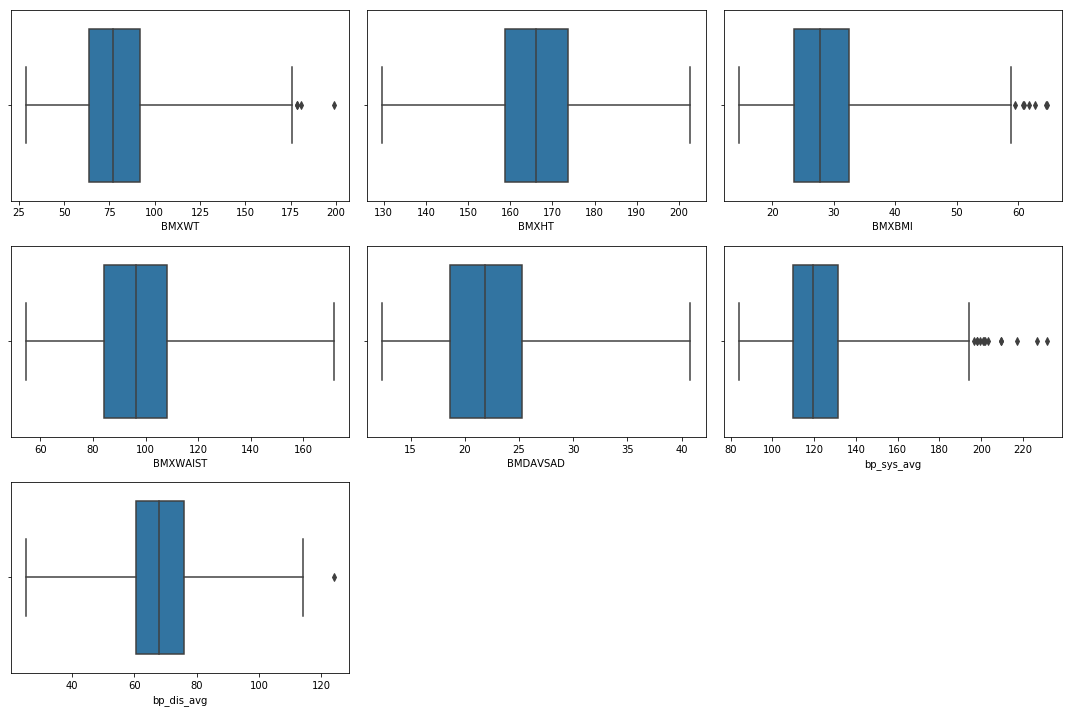

In [208]:
data = nhanes_full_df[body_continuous]

plt.figure(figsize = (15,10)) 
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3)

plt.tight_layout()
plt.show()

In [209]:
lab_continuous = ['LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXMOPCT', 
                  'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 
                  'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBXRBCSI', 
                  'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 
                  'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXSAL', 
                  'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 
                  'LBXSC3SI', 'LBXSCA', 'LBXSCH', 'LBXSCK',
                  'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 
                  'LBXSKSI', 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 
                  'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 
                  'LBXSTR', 'LBXSUA', 'LBDHDD', 'LBXTC', 
                  'LBXHSCRP']

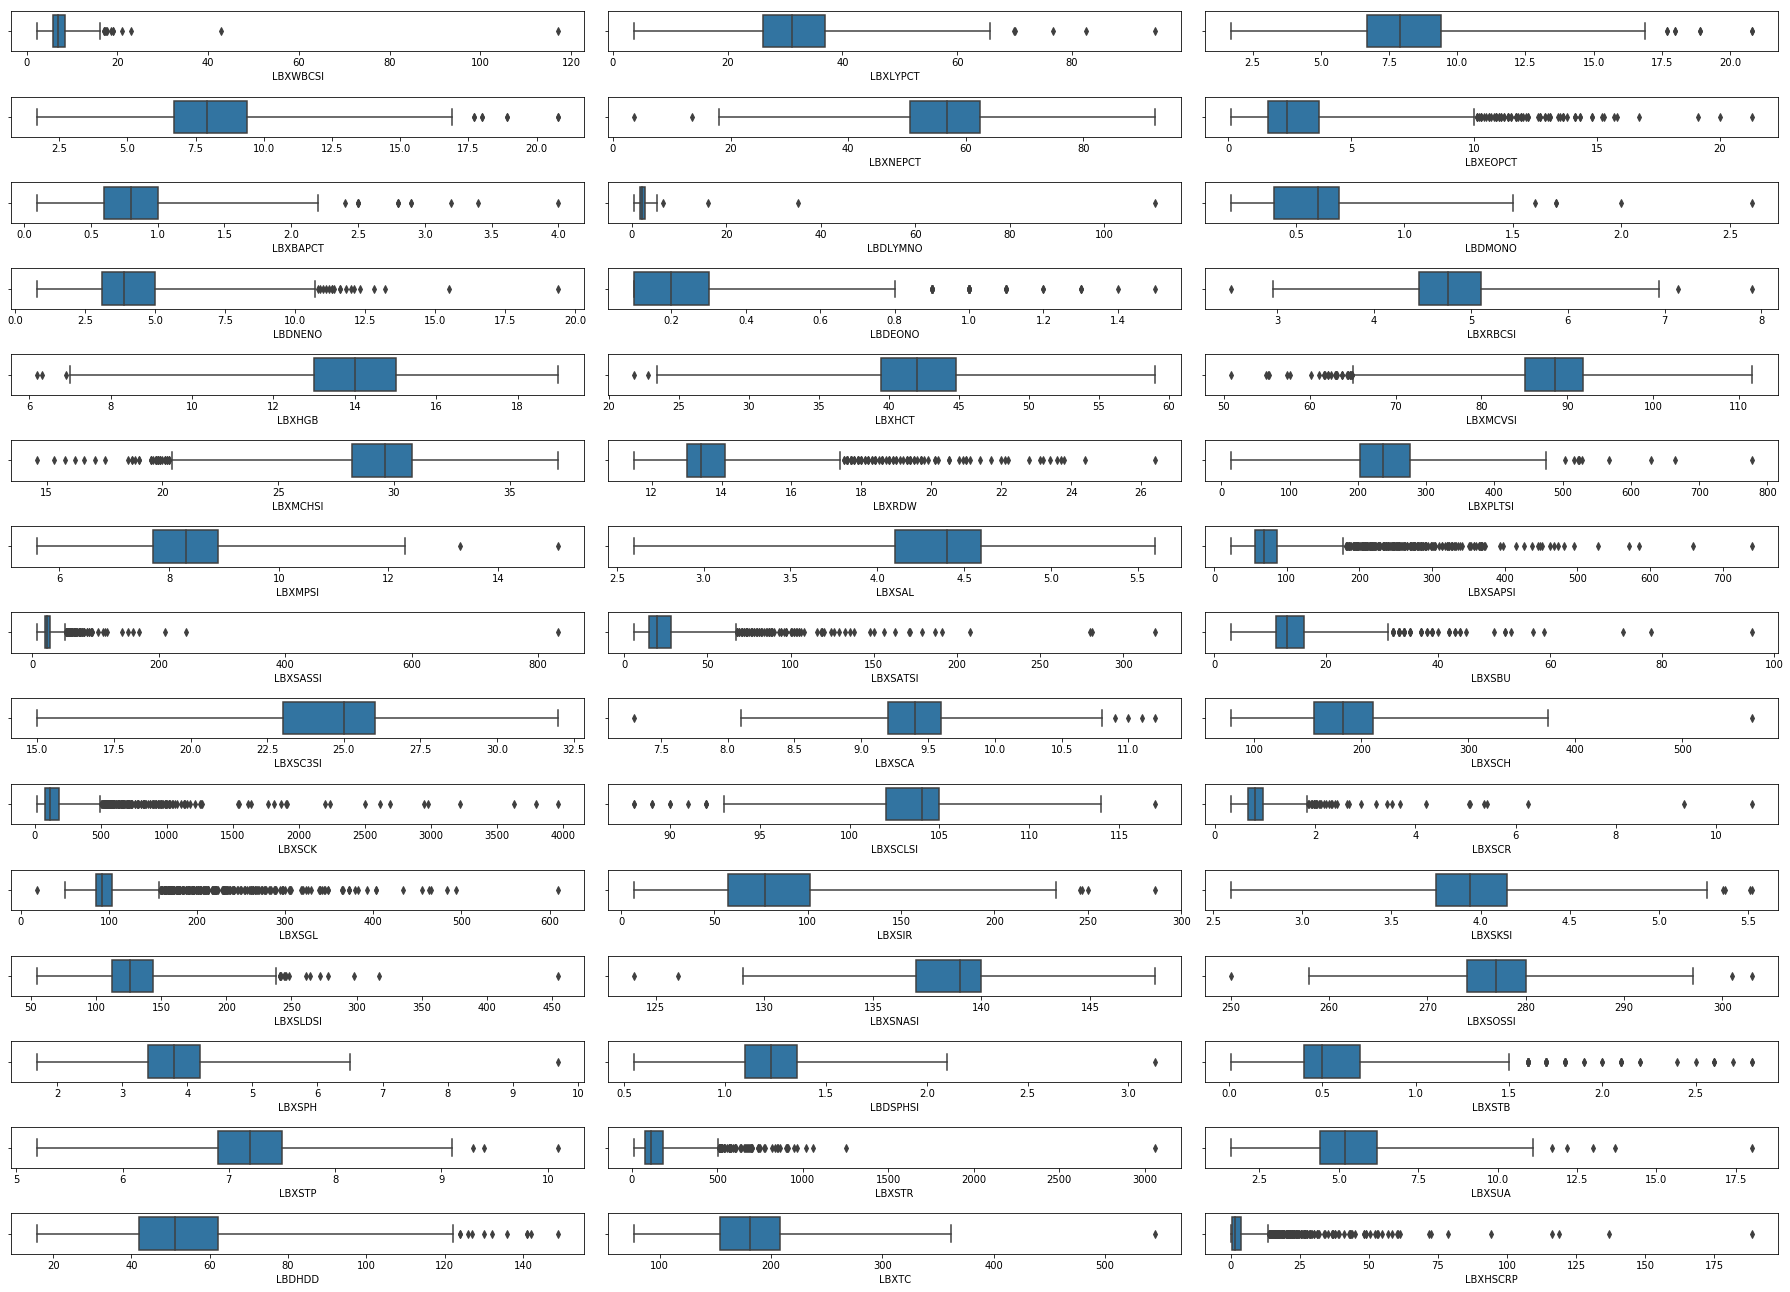

In [216]:
data = nhanes_full_df[lab_continuous]

plt.figure(figsize = (25,20)) 
for i, column in enumerate(data.columns):
    plt.subplot(17, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3)

plt.tight_layout()
plt.show()

In [217]:
diet_continuous = ['tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
                   'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
                   'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
                   'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
                   'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
                   'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
                   'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 
                   'vit_b6_avg', 'folate_avg', 'folic_acid_avg', 
                   'food_fol_avg', 'folate_dfe_avg', 'tot_choline_avg', 
                   'vit_b12_avg', 'vit_c_avg', 'vit_d_avg', 
                   'tot_vit_k_avg', 'calc_avg', 'tot_phos_avg', 
                   'mag_avg', 'fe_avg', 'zn_avg', 
                   'cu_avg', 'na_avg', 'k_avg', 
                   'se_avg', 'tot_mois_avg', 'tot_h20_avg']

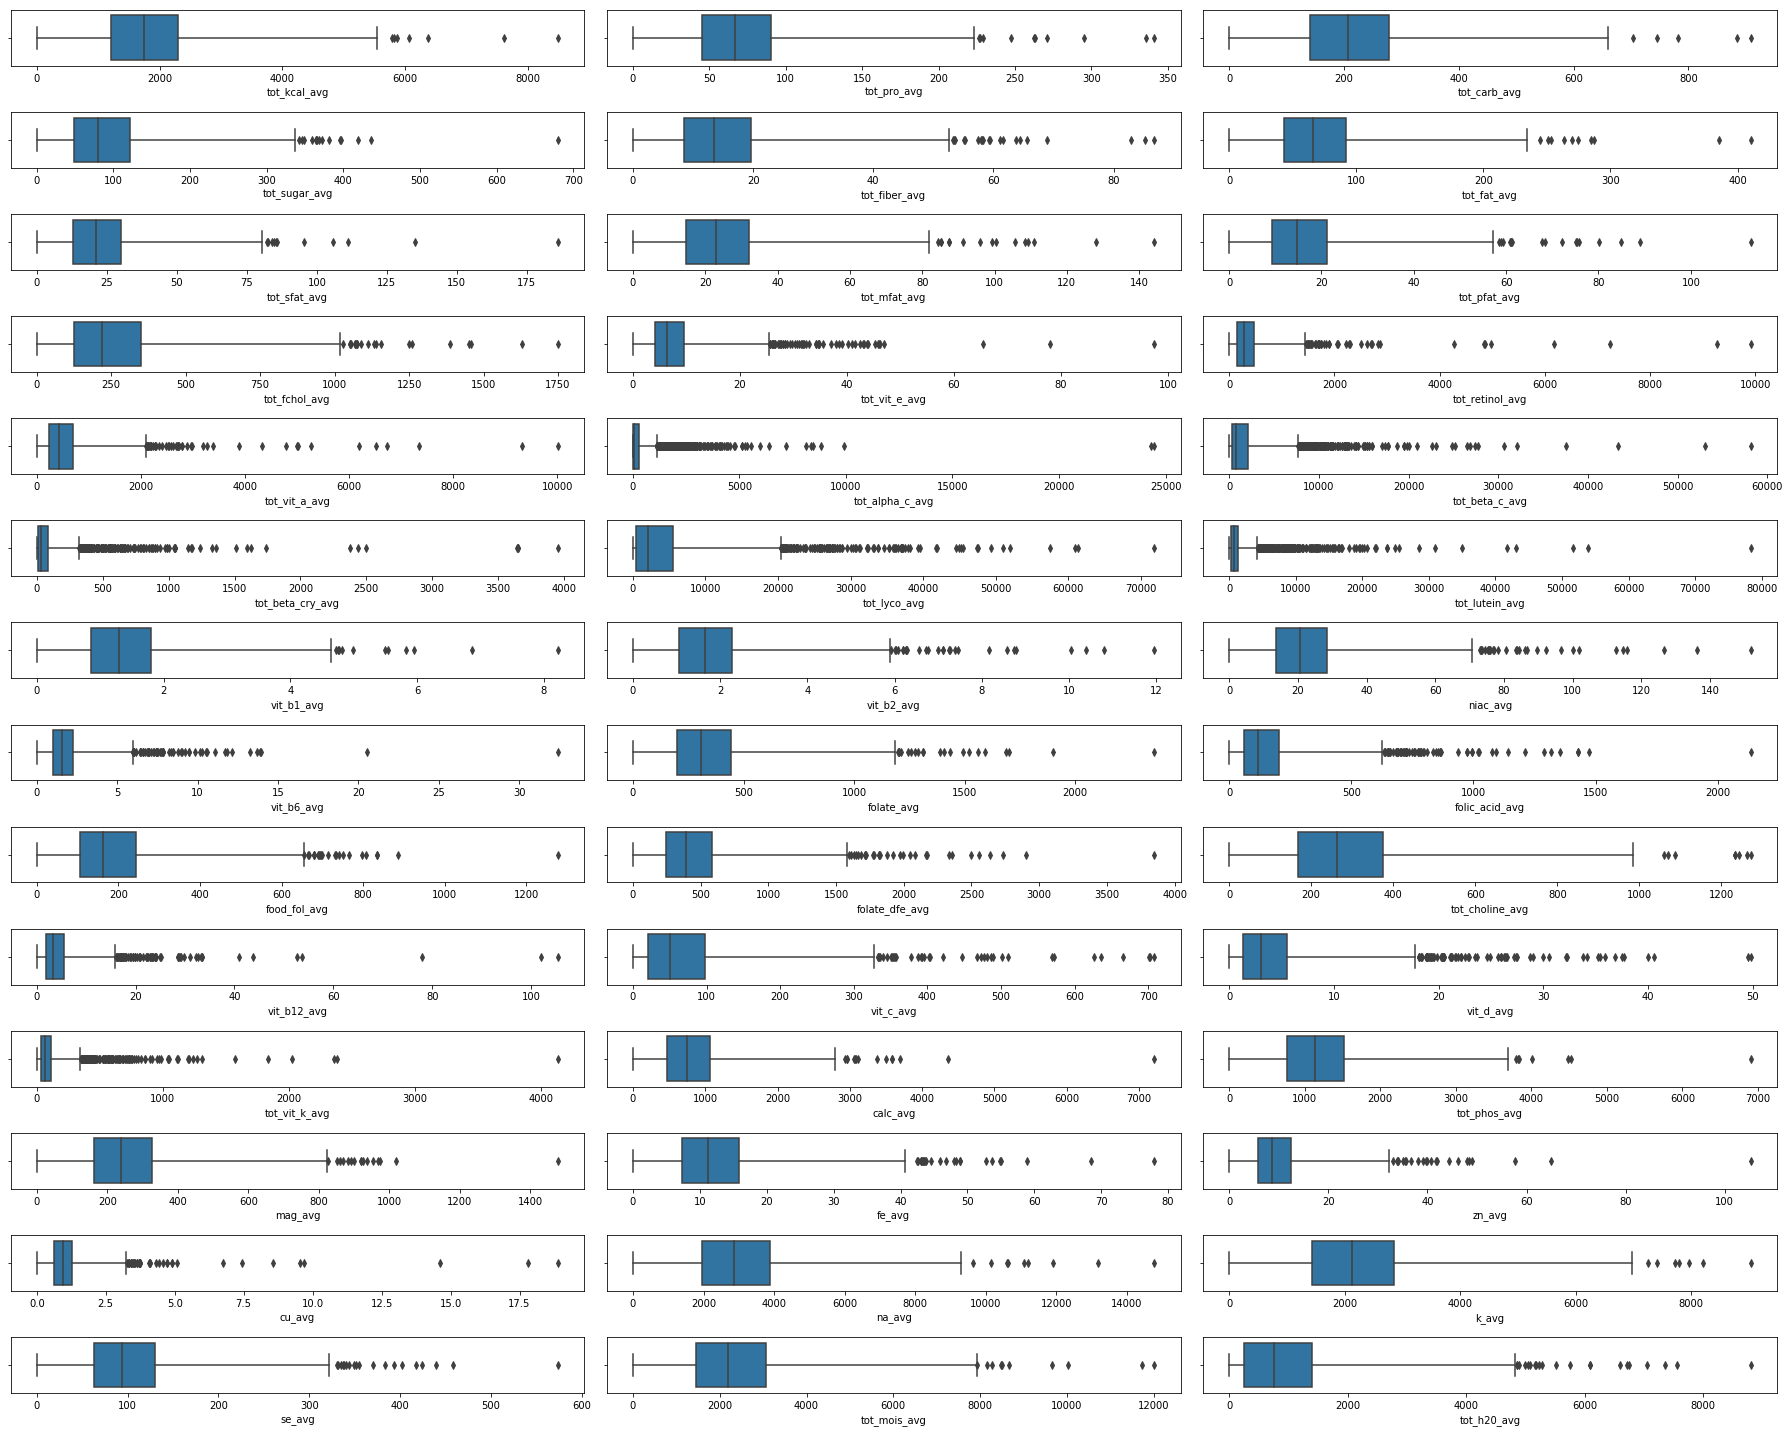

In [218]:
data = nhanes_full_df[diet_continuous]

plt.figure(figsize = (25,20)) 
for i, column in enumerate(data.columns):
    plt.subplot(14, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3)

plt.tight_layout()
plt.show()

In [219]:
supplement_continuous = ['supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 
                         'supp_b6_avg', 'supp_b12_avg', 'supp_folate_avg', 
                         'supp_folfde_avg', 'supp_c_avg', 'supp_d_avg', 
                         'supp_ca_avg', 'supp_mg_avg', 'supp_fe_avg', 
                         'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg',
                         'supp_potk_avg', 'supp_se_avg']

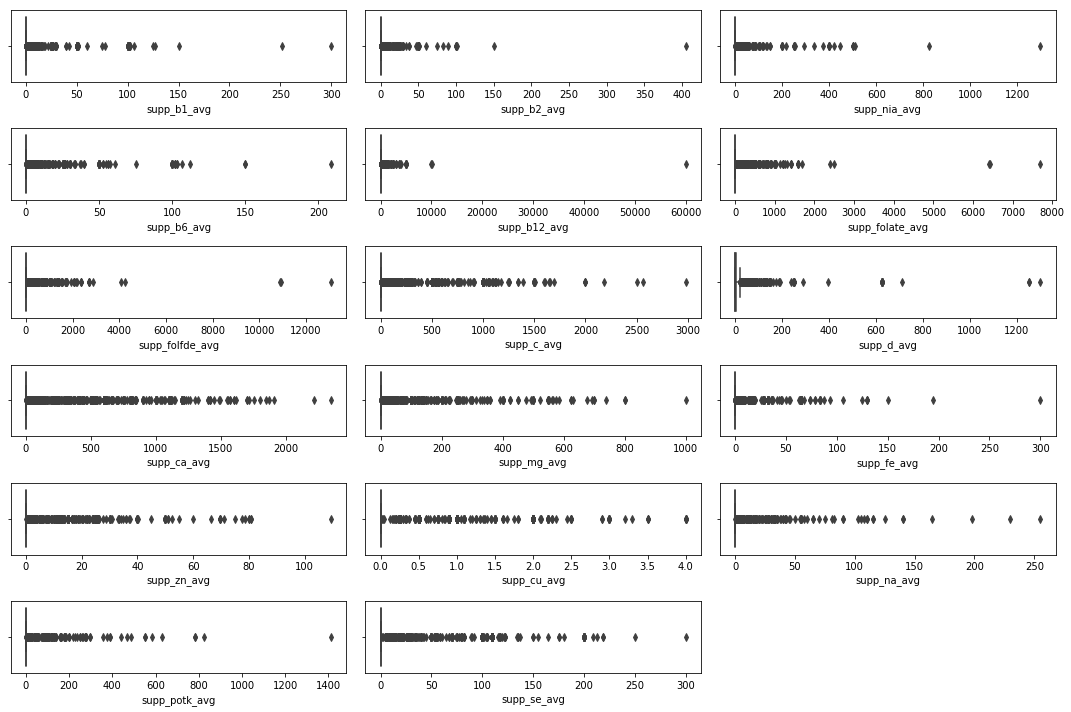

In [220]:
data = nhanes_full_df[supplement_continuous]

plt.figure(figsize = (15,10)) 
for i, column in enumerate(data.columns):
    plt.subplot(6, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3)

plt.tight_layout()
plt.show()

In [221]:
total_intake_continuous = ['tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
                           'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
                           'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
                           'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
                           'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
                           'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
                           'tot_choline_avg', 'tot_vit_k_avg', 'tot_phos_avg',
                           'tot_mois_avg', 'tot_h20_avg', 'tot_b1_avg', 
                           'tot_b2_avg', 'tot_niac_avg', 'tot_b6_avg', 
                           'tot_b12_avg', 'tot_c_avg', 'tot_d_avg', 
                           'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg',
                           'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 
                           'tot_k_avg', 'tot_se_avg', 'tot_folate_avg']

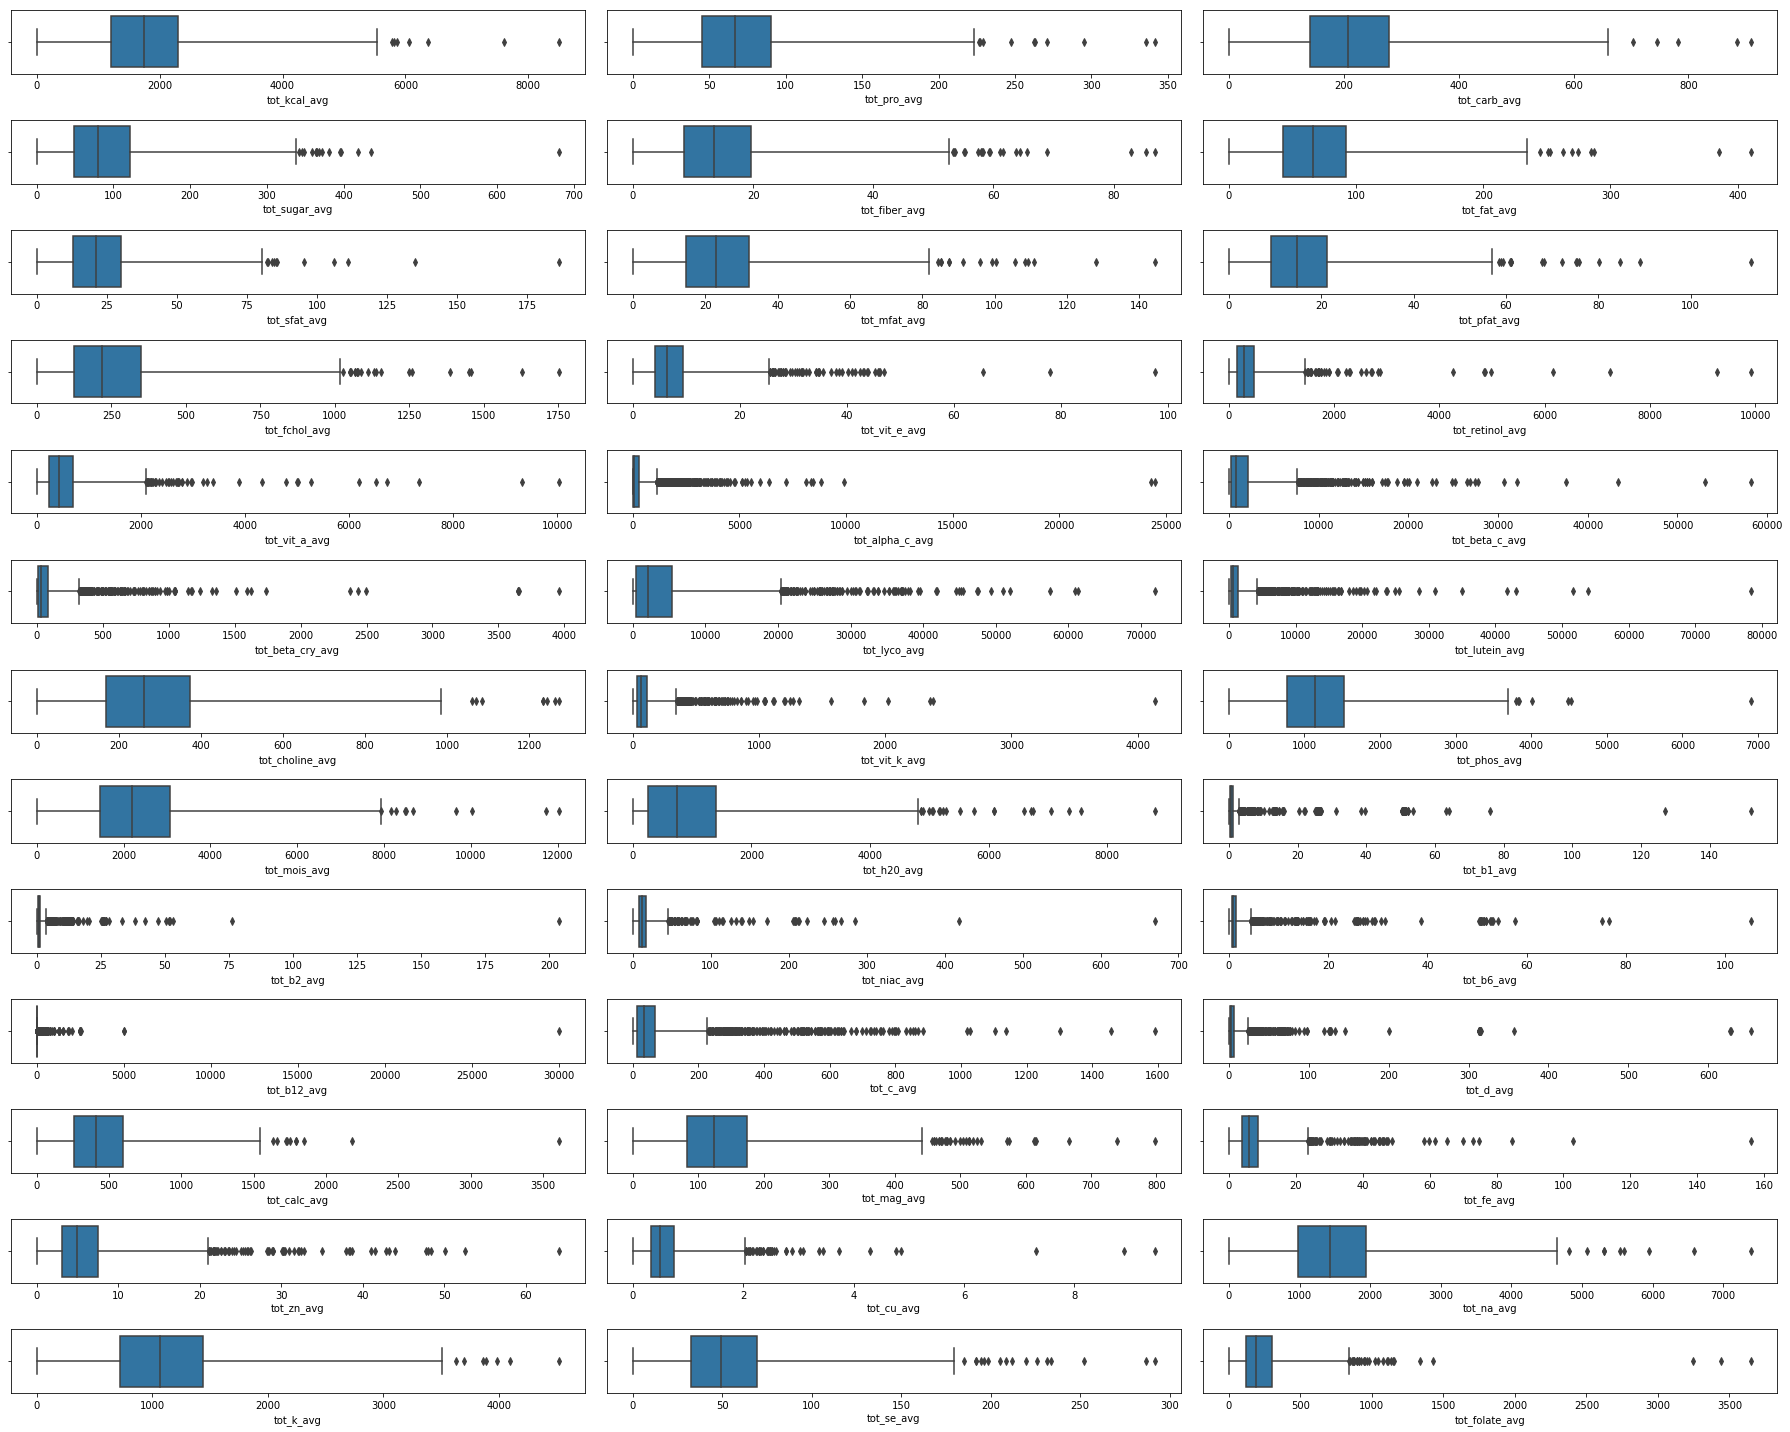

In [222]:
data = nhanes_full_df[total_intake_continuous]

plt.figure(figsize = (25,20)) 
for i, column in enumerate(data.columns):
    plt.subplot(13, 3, i + 1) 
    sns.boxplot(x=column, data=data, whis=3)

plt.tight_layout()
plt.show()

#### z-score, iqr to determine outliers

In [223]:
continuous_data = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMDAVSAD',
 'bp_sys_avg', 'bp_dis_avg', 'LBXWBCSI', 'LBXLYPCT',
 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT',
 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO',
 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI',
 'LBXMCHSI', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI',
 'LBXSAL', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI',
 'LBXSBU', 'LBXSC3SI', 'LBXSCA', 'LBXSCH', 'LBXSCK',
 'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 'LBXSKSI',
 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH',
 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA',
 'LBDHDD', 'LBXTC', 'LBXHSCRP', 'DR1TCAFF', 
 'tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
 'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
 'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
 'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
 'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
 'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
 'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 'vit_b6_avg',
 'folate_avg', 'folic_acid_avg', 'food_fol_avg',
 'folate_dfe_avg', 'tot_choline_avg', 'vit_b12_avg',
 'vit_c_avg', 'vit_d_avg', 'tot_vit_k_avg', 'calc_avg',
 'tot_phos_avg', 'mag_avg', 'fe_avg', 'zn_avg', 'cu_avg',
 'na_avg', 'k_avg', 'se_avg', 'tot_mois_avg', 'tot_h20_avg', 
 'supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 'supp_b6_avg',
 'supp_b12_avg', 'supp_folate_avg', 'supp_folfde_avg', 
 'supp_c_avg', 'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg',
 'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg',
 'supp_potk_avg', 'supp_se_avg', 'tot_b1_avg', 'tot_b2_avg',
 'tot_niac_avg', 'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg',
 'tot_d_avg', 'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg',
 'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 'tot_k_avg',
 'tot_se_avg', 'tot_folate_avg']

In [224]:
#zscore
z_outliers = []

for i in continuous_data:
    threshold = 4 
    z_scores = zscore(nhanes_full_df[i])
    #for threshold = 4:
    z_outliers = (i)
    print(i)  
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}'.format(len((np.where(z_scores > threshold)[0]))))
    

BMXWT
The score threshold is: 4
Number of outliers is: 10
BMXHT
The score threshold is: 4
Number of outliers is: 0
BMXBMI
The score threshold is: 4
Number of outliers is: 14
BMXWAIST
The score threshold is: 4
Number of outliers is: 1
BMDAVSAD
The score threshold is: 4
Number of outliers is: 0
bp_sys_avg
The score threshold is: 4
Number of outliers is: 14
bp_dis_avg
The score threshold is: 4
Number of outliers is: 1
LBXWBCSI
The score threshold is: 4
Number of outliers is: 7
LBXLYPCT
The score threshold is: 4
Number of outliers is: 5
LBXMOPCT
The score threshold is: 4
Number of outliers is: 6
LBXNEPCT
The score threshold is: 4
Number of outliers is: 0
LBXEOPCT
The score threshold is: 4
Number of outliers is: 47
LBXBAPCT
The score threshold is: 4
Number of outliers is: 21
LBDLYMNO
The score threshold is: 4
Number of outliers is: 3
LBDMONO
The score threshold is: 4
Number of outliers is: 18
LBDNENO
The score threshold is: 4
Number of outliers is: 18
LBDEONO
The score threshold is: 4
Numbe

In [225]:
#iqr
for i in continuous_data:
    threshold = 3 
    q75, q25 = np.percentile(nhanes_full_df[i], [75 ,25])
    iqr = q75 - q25

    for threshold in np.arange(3,5,1):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print(i)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((nhanes_full_df[i] > max_val) 
                      | (nhanes_full_df[i] < min_val))[0]))
        ))

BMXWT
The score threshold is: 3
Number of outliers is: 4
BMXWT
The score threshold is: 4
Number of outliers is: 0
BMXHT
The score threshold is: 3
Number of outliers is: 0
BMXHT
The score threshold is: 4
Number of outliers is: 0
BMXBMI
The score threshold is: 3
Number of outliers is: 7
BMXBMI
The score threshold is: 4
Number of outliers is: 0
BMXWAIST
The score threshold is: 3
Number of outliers is: 0
BMXWAIST
The score threshold is: 4
Number of outliers is: 0
BMDAVSAD
The score threshold is: 3
Number of outliers is: 0
BMDAVSAD
The score threshold is: 4
Number of outliers is: 0
bp_sys_avg
The score threshold is: 3
Number of outliers is: 13
bp_sys_avg
The score threshold is: 4
Number of outliers is: 3
bp_dis_avg
The score threshold is: 3
Number of outliers is: 1
bp_dis_avg
The score threshold is: 4
Number of outliers is: 0
LBXWBCSI
The score threshold is: 3
Number of outliers is: 12
LBXWBCSI
The score threshold is: 4
Number of outliers is: 4
LBXLYPCT
The score threshold is: 3
Number of o

The score threshold is: 3
Number of outliers is: 1015
supp_folfde_avg
The score threshold is: 4
Number of outliers is: 1015
supp_c_avg
The score threshold is: 3
Number of outliers is: 1157
supp_c_avg
The score threshold is: 4
Number of outliers is: 1157
supp_d_avg
The score threshold is: 3
Number of outliers is: 670
supp_d_avg
The score threshold is: 4
Number of outliers is: 437
supp_ca_avg
The score threshold is: 3
Number of outliers is: 1121
supp_ca_avg
The score threshold is: 4
Number of outliers is: 1121
supp_mg_avg
The score threshold is: 3
Number of outliers is: 760
supp_mg_avg
The score threshold is: 4
Number of outliers is: 760
supp_fe_avg
The score threshold is: 3
Number of outliers is: 518
supp_fe_avg
The score threshold is: 4
Number of outliers is: 518
supp_zn_avg
The score threshold is: 3
Number of outliers is: 901
supp_zn_avg
The score threshold is: 4
Number of outliers is: 901
supp_cu_avg
The score threshold is: 3
Number of outliers is: 728
supp_cu_avg
The score threshold

In [ ]:
irq4_outlier = ['bp_sys_avg', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 
                'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 
                'LBDNENO', 'LBDEONO', 'LBXRBCSI', 'LBXMCVSI', 'LBXMCHSI', 
                'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXSAPSI', 'LBXSASSI',
                'LBXSATSI', 'LBXSBU', 'LBXSCA', 'LBXSCH', 'LBXSCK', 
                'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 'LBXSLDSI', 
                'LBXSNASI', 'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 
                'LBXSTR', 'LBXSUA', 'LBDHDD', 'LBXTC', 'LBXHSCRP', 'DR1TCAFF', 
                'tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg', 'tot_sugar_avg',
                'tot_fiber_avg', 'tot_fat_avg', 'tot_sfat_avg', 'tot_mfat_avg',
                'tot_pfat_avg', 'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg', 
                'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg', 'tot_beta_cry_avg', 
                'tot_lyco_avg', 'tot_lutein_avg', 'vit_b1_avg', 'vit_b2_avg',
                'niac_avg', 'vit_b6_avg', 'folate_avg', 'folic_acid_avg',
                'food_fol_avg', 'folate_dfe_avg', 'tot_choline_avg', 
                'vit_b12_avg', 'vit_c_avg', 'vit_d_avg', 'tot_vit_k_avg', 
                'calc_avg', 'tot_phos_avg', 'mag_avg', 'fe_avg', 'zn_avg', 
                'cu_avg', 'na_avg', 'k_avg', 'se_avg', 'tot_mois_avg', 
                'tot_h20_avg', 'tot_b1_avg', 'tot_b2_avg', 'tot_niac_avg', 
                'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg', 'tot_d_avg', 
                'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg', 'tot_zn_avg', 
                'tot_cu_avg', 'tot_na_avg', 'tot_k_avg', 'tot_se_avg', 
                'tot_folate_avg']

#### fewer outlier columns with iqr but much higher numbers; will use z-score outliers
will also remove total supplement columns and use only food totals and intake totals (which includes supplement totals); have column to determine whether or not individual took supplement

In [340]:
z_outliers = ['BMXWT', 'BMXBMI', 'BMXWAIST', 'bp_sys_avg',
              'bp_dis_avg', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT',
              'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO',
              'LBDNENO', 'LBDEONO', 'LBXRBCSI', 'LBXHCT',
              'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXSAPSI', 
              'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBXSCA', 
              'LBXSCH', 'LBXSCK', 'LBXSCLSI', 'LBXSCR', 
              'LBXSGL', 'LBXSIR', 'LBXSKSI', 'LBXSLDSI', 
              'LBXSNASI', 'LBXSOSSI', 'LBXSPH', 'LBDSPHSI', 
              'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA', 'LBDHDD',
              'LBXTC', 'LBXHSCRP', 'DR1TCAFF', 'tot_kcal_avg', 
              'tot_pro_avg', 'tot_carb_avg', 
              'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
              'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg', 
              'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg', 
              'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg', 
              'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg', 
              'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 'vit_b6_avg', 
              'folate_avg', 'folic_acid_avg', 'food_fol_avg',
              'folate_dfe_avg', 'tot_choline_avg', 'vit_b12_avg', 
              'vit_c_avg', 'vit_d_avg', 'tot_vit_k_avg', 
              'calc_avg', 'tot_phos_avg', 'mag_avg', 'fe_avg',
              'zn_avg', 'cu_avg', 'na_avg', 'k_avg', 'se_avg',
              'tot_mois_avg', 'tot_h20_avg', 'tot_b1_avg', 
              'tot_b2_avg', 'tot_niac_avg', 'tot_b6_avg', 
              'tot_b12_avg', 'tot_c_avg', 'tot_d_avg', 
              'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg', 
              'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 
              'tot_k_avg', 'tot_se_avg', 'tot_folate_avg']

In [341]:
for outlier in z_outliers:
    nhanes_full_df['log_'+ outlier] = np.log(nhanes_full_df[outlier]+1)

In [342]:
nhanes_full_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TCAFF,DRD360,DR2STY,WTDRD1_x,WTDR2D_x,DS1DS,DS1AN,DS2DS,DS2AN,tot_kcal_avg,tot_pro_avg,tot_carb_avg,tot_sugar_avg,tot_fiber_avg,tot_fat_avg,tot_sfat_avg,tot_mfat_avg,tot_pfat_avg,tot_fchol_avg,tot_vit_e_avg,tot_retinol_avg,tot_vit_a_avg,tot_alpha_c_avg,tot_beta_c_avg,tot_beta_cry_avg,tot_lyco_avg,tot_lutein_avg,vit_b1_avg,vit_b2_avg,niac_avg,vit_b6_avg,folate_avg,folic_acid_avg,food_fol_avg,folate_dfe_avg,tot_choline_avg,vit_b12_avg,vit_c_avg,vit_d_avg,tot_vit_k_avg,calc_avg,tot_phos_avg,mag_avg,fe_avg,zn_avg,cu_avg,na_avg,k_avg,se_avg,tot_mois_avg,tot_h20_avg,supp_b1_avg,supp_b2_avg,supp_nia_avg,supp_b6_avg,supp_b12_avg,supp_folate_avg,supp_folfde_avg,supp_c_avg,supp_d_avg,supp_ca_avg,supp_mg_avg,supp_fe_avg,supp_zn_avg,supp_cu_avg,supp_na_avg,supp_potk_avg,supp_se_avg,tot_b1_avg,tot_b2_avg,tot_niac_avg,tot_b6_avg,tot_b12_avg,tot_c_avg,tot_d_avg,tot_calc_avg,tot_mag_avg,tot_fe_avg,tot_zn_avg,tot_cu_avg,tot_na_avg,tot_k_avg,tot_se_avg,tot_folate_avg,heart_dz,log_BMXWT,log_BMXBMI,log_BMXWAIST,log_bp_sys_avg,log_bp_dis_avg,log_LBXWBCSI,log_LBXLYPCT,log_LBXMOPCT,log_LBXEOPCT,log_LBXBAPCT,log_LBDLYMNO,log_LBDMONO,log_LBDNENO,log_LBDEONO,log_LBXRBCSI,log_LBXHCT,log_LBXRDW,log_LBXPLTSI,log_LBXMPSI,log_LBXSAPSI,log_LBXSASSI,log_LBXSATSI,log_LBXSBU,log_LBXSCA,log_LBXSCH,log_LBXSCK,log_LBXSCLSI,log_LBXSCR,log_LBXSGL,log_LBXSIR,log_LBXSKSI,log_LBXSLDSI,log_LBXSNASI,log_LBXSOSSI,log_LBXSPH,log_LBDSPHSI,log_LBXSTB,log_LBXSTP,log_LBXSTR,log_LBXSUA,log_LBDHDD,log_LBXTC,log_LBXHSCRP,log_DR1TCAFF,log_tot_kcal_avg,log_tot_pro_avg,log_tot_carb_avg,log_tot_sugar_avg,log_tot_fiber_avg,log_tot_fat_avg,log_tot_sfat_avg,log_tot_mfat_avg,log_tot_pfat_avg,log_tot_fchol_avg,log_tot_vit_e_avg,log_tot_retinol_avg,log_tot_vit_a_avg,log_tot_alpha_c_avg,log_tot_beta_c_avg,log_tot_beta_cry_avg,log_tot_lyco_avg,log_tot_lutein_avg,log_vit_b1_avg,log_vit_b2_avg,log_niac_avg,log_vit_b6_avg,log_folate_avg,log_folic_acid_avg,log_food_fol_avg,log_folate_dfe_avg,log_tot_choline_avg,log_vit_b12_avg,log_vit_c_avg,log_vit_d_avg,log_tot_vit_k_avg,log_calc_avg,log_tot_phos_avg,log_mag_avg,log_fe_avg,log_zn_avg,log_cu_avg,log_na_avg,log_k_avg,log_se_avg,log_tot_mois_avg,log_tot_h20_avg,log_tot_b1_avg,log_tot_b2_avg,log_tot_niac_avg,log_tot_b6_avg,log_tot_b12_avg,log_tot_c_avg,log_tot_d_avg,log_tot_calc_avg,log_tot_mag_avg,log_tot_fe_avg,log_tot_zn_avg,log_tot_cu_avg,log_tot_na_avg,log_tot_k_avg,log_tot_se_avg,log_tot_folate_avg,MCQ160B_2.0,MCQ160B_9.0,MCQ160C_2.0,MCQ160C_9.0,MCQ160D_2.0,MCQ160D_9.0,MCQ160E_2.0,MCQ160E_9.0,MCQ300A_2.0,MCQ300A_7.0,MCQ300A_9.0,MCQ365C_2.0,MCQ365C_9.0,MCQ365D_2.0,MCQ365D_9.0,MCQ370A_2.0,MCQ370A_9.0,MCQ370C_2.0,MCQ370C_9.0,MCQ370D_2.0,MCQ370D_9.0,BPQ020_2.0,BPQ020_9.0,BPQ030_2.0,BPQ030_9.0,BPQ040A_2.0,BPQ040A_9.0,BPQ050A_2.0,BPQ050A_9.0,BPQ080_2.0,BPQ080_9.0,BPQ060_2.0,BPQ060_9.0,BPQ070_2.0,BPQ070_3.0,BPQ070_4.0,BPQ070_9.0,BPQ090D_2.0,BPQ090D_9.0,BPQ100D_2.0,BPQ100D_9.0,DBD100_1.0,DBD100_2.0,DBD100_3.0,DBD100_9.0,DRQSPREP_1.0,DRQSPREP_2.0,DRQSPREP_3.0,DRQSPREP_4.0,DRQSPREP_9.0,DR1STY_1.0,DR1STY_2.0,DR1STY_9.0,DRQSDIET_1.0,DRQSDIET_2.0,DRQSDIET_9.0,DR2STY_1.0,DR2STY_2.0,DR2STY_9.0,DS1DS_1.0,DS1DS_2.0,DS1AN_1.0,DS1AN_2.0,DS2DS_1.0,DS2DS_2.0,DS2AN_1.0,DS2AN_2.0
0,83732.0,1,62.0,134671.370419,135629.507405,4.39,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,94.8,184.5,27.8,101.1,22.8,2.

In [343]:
log_continuous = ['log_BMXWT', 'log_BMXBMI', 'log_BMXWAIST',
                  'log_bp_sys_avg', 'log_bp_dis_avg', 'log_LBXWBCSI',
                  'log_LBXLYPCT', 'log_LBXMOPCT', 'log_LBXEOPCT',
                  'log_LBXBAPCT', 'log_LBDLYMNO', 'log_LBDMONO',
                  'log_LBDNENO', 'log_LBDEONO', 'log_LBXRBCSI',
                  'log_LBXHCT','log_LBXRDW', 'log_LBXPLTSI',
                  'log_LBXMPSI', 'log_LBXSAPSI', 'log_LBXSASSI',
                  'log_LBXSATSI', 'log_LBXSBU', 'log_LBXSCA',
                  'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI',
                  'log_LBXSCR', 'log_LBXSGL', 'log_LBXSIR',
                  'log_LBXSKSI', 'log_LBXSLDSI', 'log_LBXSNASI',
                  'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI',
                  'log_LBXSTB', 'log_LBXSTP', 'log_LBXSTR',
                  'log_LBXSUA', 'log_LBDHDD', 'log_LBXTC',
                  'log_LBXHSCRP', 'log_DR1TCAFF', 'log_tot_kcal_avg',
                  'log_tot_pro_avg', 'log_tot_carb_avg', 'log_tot_sugar_avg',
                  'log_tot_fiber_avg', 'log_tot_fat_avg', 'log_tot_sfat_avg',
                  'log_tot_mfat_avg', 'log_tot_pfat_avg', 'log_tot_fchol_avg',
                  'log_tot_vit_e_avg', 'log_tot_retinol_avg', 'log_tot_vit_a_avg',
                  'log_tot_alpha_c_avg', 'log_tot_beta_c_avg', 'log_tot_beta_cry_avg',
                  'log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_vit_b1_avg',
                  'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg',
                  'log_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg',
                  'log_folate_dfe_avg', 'log_tot_choline_avg', 'log_vit_b12_avg',
                  'log_vit_c_avg', 'log_vit_d_avg', 'log_tot_vit_k_avg',
                  'log_calc_avg', 'log_tot_phos_avg', 'log_mag_avg',
                  'log_fe_avg', 'log_zn_avg', 'log_cu_avg',
                  'log_na_avg', 'log_k_avg', 'log_se_avg', 'log_tot_mois_avg',
                  'log_tot_h20_avg', 'log_tot_b1_avg', 'log_tot_b2_avg',
                  'log_tot_niac_avg', 'log_tot_b6_avg', 'log_tot_b12_avg',
                  'log_tot_c_avg', 'log_tot_d_avg', 'log_tot_calc_avg',
                  'log_tot_mag_avg', 'log_tot_fe_avg', 'log_tot_zn_avg',
                  'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg',
                  'log_tot_se_avg', 'log_tot_folate_avg']

In [344]:
for i in log_continuous:
    threshold = 4 
    z_scores = zscore(nhanes_full_df[i])
    #for threshold = 4:
    z_outliers = np.where(z_scores > threshold)
    print(i)  
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}'.format(len((np.where(z_scores > threshold)[0]))))
    

log_BMXWT
The score threshold is: 4
Number of outliers is: 0
log_BMXBMI
The score threshold is: 4
Number of outliers is: 0
log_BMXWAIST
The score threshold is: 4
Number of outliers is: 0
log_bp_sys_avg
The score threshold is: 4
Number of outliers is: 3
log_bp_dis_avg
The score threshold is: 4
Number of outliers is: 0
log_LBXWBCSI
The score threshold is: 4
Number of outliers is: 4
log_LBXLYPCT
The score threshold is: 4
Number of outliers is: 1
log_LBXMOPCT
The score threshold is: 4
Number of outliers is: 0
log_LBXEOPCT
The score threshold is: 4
Number of outliers is: 2
log_LBXBAPCT
The score threshold is: 4
Number of outliers is: 12
log_LBDLYMNO
The score threshold is: 4
Number of outliers is: 3
log_LBDMONO
The score threshold is: 4
Number of outliers is: 5
log_LBDNENO
The score threshold is: 4
Number of outliers is: 1
log_LBDEONO
The score threshold is: 4
Number of outliers is: 29
log_LBXRBCSI
The score threshold is: 4
Number of outliers is: 2
log_LBXHCT
The score threshold is: 4
Numbe

# what to do when log does not remove all outliers

In [ ]:
# outliers remain but are significantly reduced
remaining_ outliers = ['log_bp_sys_avg', 'log_LBXWBCSI', 
                       'log_LBXBAPCT', 'log_LBDLYMNO', 
                       'log_LBDMONO', 'log_LBDNENO', 'log_LBXRBCSI',
                       'log_LBXRDW', 'log_LBXPLTSI', 'log_LBXMPSI',
                       'log_LBXSAPSI', 'log_LBXSASSI', 'log_LBXSATSI', 
                       'log_LBXSBU', 'log_LBXSCA', 'log_LBXSCH', 
                       'log_LBXSCK', 'log_LBXSCLSI', 'log_LBXSCR', 
                       'log_LBXSGL', 'log_LBXSKSI', 'log_LBXSLDSI', 
                       'log_LBXSNASI', 'log_LBXSOSSI', 'log_LBXSPH', 
                       'log_LBDSPHSI', 'log_LBXSTP', 'log_LBXSTR',
                       'log_LBXSUA', 'log_LBXTC']

# comment on decision not to remove outliers
consider not removing outliers secondary to need to consider exteme values in intake of population; research

# consider dropping these colums
### will not use supplement totals (contain 0.0); will only use totals 
'supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 'supp_b6_avg', 
'supp_b12_avg', 'supp_folate_avg', 'supp_folfde_avg', 'supp_c_avg', 
'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg', 'supp_fe_avg', 
'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg', 'supp_potk_avg', 
'supp_se_avg',

# data exploration and visualization

### summary statistics

In [345]:
nhanes_full_df.describe()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TCAFF,DRD360,DR2STY,WTDRD1_x,WTDR2D_x,DS1DS,DS1AN,DS2DS,DS2AN,tot_kcal_avg,tot_pro_avg,tot_carb_avg,tot_sugar_avg,tot_fiber_avg,tot_fat_avg,tot_sfat_avg,tot_mfat_avg,tot_pfat_avg,tot_fchol_avg,tot_vit_e_avg,tot_retinol_avg,tot_vit_a_avg,tot_alpha_c_avg,tot_beta_c_avg,tot_beta_cry_avg,tot_lyco_avg,tot_lutein_avg,vit_b1_avg,vit_b2_avg,niac_avg,vit_b6_avg,folate_avg,folic_acid_avg,food_fol_avg,folate_dfe_avg,tot_choline_avg,vit_b12_avg,vit_c_avg,vit_d_avg,tot_vit_k_avg,calc_avg,tot_phos_avg,mag_avg,fe_avg,zn_avg,cu_avg,na_avg,k_avg,se_avg,tot_mois_avg,tot_h20_avg,supp_b1_avg,supp_b2_avg,supp_nia_avg,supp_b6_avg,supp_b12_avg,supp_folate_avg,supp_folfde_avg,supp_c_avg,supp_d_avg,supp_ca_avg,supp_mg_avg,supp_fe_avg,supp_zn_avg,supp_cu_avg,supp_na_avg,supp_potk_avg,supp_se_avg,tot_b1_avg,tot_b2_avg,tot_niac_avg,tot_b6_avg,tot_b12_avg,tot_c_avg,tot_d_avg,tot_calc_avg,tot_mag_avg,tot_fe_avg,tot_zn_avg,tot_cu_avg,tot_na_avg,tot_k_avg,tot_se_avg,tot_folate_avg,heart_dz,log_BMXWT,log_BMXBMI,log_BMXWAIST,log_bp_sys_avg,log_bp_dis_avg,log_LBXWBCSI,log_LBXLYPCT,log_LBXMOPCT,log_LBXEOPCT,log_LBXBAPCT,log_LBDLYMNO,log_LBDMONO,log_LBDNENO,log_LBDEONO,log_LBXRBCSI,log_LBXHCT,log_LBXRDW,log_LBXPLTSI,log_LBXMPSI,log_LBXSAPSI,log_LBXSASSI,log_LBXSATSI,log_LBXSBU,log_LBXSCA,log_LBXSCH,log_LBXSCK,log_LBXSCLSI,log_LBXSCR,log_LBXSGL,log_LBXSIR,log_LBXSKSI,log_LBXSLDSI,log_LBXSNASI,log_LBXSOSSI,log_LBXSPH,log_LBDSPHSI,log_LBXSTB,log_LBXSTP,log_LBXSTR,log_LBXSUA,log_LBDHDD,log_LBXTC,log_LBXHSCRP,log_DR1TCAFF,log_tot_kcal_avg,log_tot_pro_avg,log_tot_carb_avg,log_tot_sugar_avg,log_tot_fiber_avg,log_tot_fat_avg,log_tot_sfat_avg,log_tot_mfat_avg,log_tot_pfat_avg,log_tot_fchol_avg,log_tot_vit_e_avg,log_tot_retinol_avg,log_tot_vit_a_avg,log_tot_alpha_c_avg,log_tot_beta_c_avg,log_tot_beta_cry_avg,log_tot_lyco_avg,log_tot_lutein_avg,log_vit_b1_avg,log_vit_b2_avg,log_niac_avg,log_vit_b6_avg,log_folate_avg,log_folic_acid_avg,log_food_fol_avg,log_folate_dfe_avg,log_tot_choline_avg,log_vit_b12_avg,log_vit_c_avg,log_vit_d_avg,log_tot_vit_k_avg,log_calc_avg,log_tot_phos_avg,log_mag_avg,log_fe_avg,log_zn_avg,log_cu_avg,log_na_avg,log_k_avg,log_se_avg,log_tot_mois_avg,log_tot_h20_avg,log_tot_b1_avg,log_tot_b2_avg,log_tot_niac_avg,log_tot_b6_avg,log_tot_b12_avg,log_tot_c_avg,log_tot_d_avg,log_tot_calc_avg,log_tot_mag_avg,log_tot_fe_avg,log_tot_zn_avg,log_tot_cu_avg,log_tot_na_avg,log_tot_k_avg,log_tot_se_avg,log_tot_folate_avg,MCQ160B_2.0,MCQ160B_9.0,MCQ160C_2.0,MCQ160C_9.0,MCQ160D_2.0,MCQ160D_9.0,MCQ160E_2.0,MCQ160E_9.0,MCQ300A_2.0,MCQ300A_7.0,MCQ300A_9.0,MCQ365C_2.0,MCQ365C_9.0,MCQ365D_2.0,MCQ365D_9.0,MCQ370A_2.0,MCQ370A_9.0,MCQ370C_2.0,MCQ370C_9.0,MCQ370D_2.0,MCQ370D_9.0,BPQ020_2.0,BPQ020_9.0,BPQ030_2.0,BPQ030_9.0,BPQ040A_2.0,BPQ040A_9.0,BPQ050A_2.0,BPQ050A_9.0,BPQ080_2.0,BPQ080_9.0,BPQ060_2.0,BPQ060_9.0,BPQ070_2.0,BPQ070_3.0,BPQ070_4.0,BPQ070_9.0,BPQ090D_2.0,BPQ090D_9.0,BPQ100D_2.0,BPQ100D_9.0,DBD100_1.0,DBD100_2.0,DBD100_3.0,DBD100_9.0,DRQSPREP_1.0,DRQSPREP_2.0,DRQSPREP_3.0,DRQSPREP_4.0,DRQSPREP_9.0,DR1STY_1.0,DR1STY_2.0,DR1STY_9.0,DRQSDIET_1.0,DRQSDIET_2.0,DRQSDIET_9.0,DR2STY_1.0,DR2STY_2.0,DR2STY_9.0,DS1DS_1.0,DS1DS_2.0,DS1AN_1.0,DS1AN_2.0,DS2DS_1.0,DS2DS_2.0,DS2AN_1.0,DS2AN_2.0
count,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.

In [346]:
continuous_data_df = nhanes_full_df[['RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMDAVSAD',
 'bp_sys_avg', 'bp_dis_avg', 'LBXWBCSI', 'LBXLYPCT',
 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT',
 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO',
 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI',
 'LBXMCHSI', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI',
 'LBXSAL', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI',
 'LBXSBU', 'LBXSC3SI', 'LBXSCA', 'LBXSCH', 'LBXSCK',
 'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 'LBXSKSI',
 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH',
 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA',
 'LBDHDD', 'LBXTC', 'LBXHSCRP', 'DR1TCAFF', 
 'tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
 'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
 'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
 'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
 'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
 'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
 'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 'vit_b6_avg',
 'folate_avg', 'folic_acid_avg', 'food_fol_avg',
 'folate_dfe_avg', 'tot_choline_avg', 'vit_b12_avg',
 'vit_c_avg', 'vit_d_avg', 'tot_vit_k_avg', 'calc_avg',
 'tot_phos_avg', 'mag_avg', 'fe_avg', 'zn_avg', 'cu_avg',
 'na_avg', 'k_avg', 'se_avg', 'tot_mois_avg', 'tot_h20_avg', 
 'supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 'supp_b6_avg',
 'supp_b12_avg', 'supp_folate_avg', 'supp_folfde_avg', 
 'supp_c_avg', 'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg',
 'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg',
 'supp_potk_avg', 'supp_se_avg', 'tot_b1_avg', 'tot_b2_avg',
 'tot_niac_avg', 'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg',
 'tot_d_avg', 'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg',
 'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 'tot_k_avg',
 'tot_se_avg', 'tot_folate_avg', 'heart_dz']]

In [347]:
continuous_data_df.groupby('heart_dz').describe()

RIDAGEYR                                                       BMXWT  \
            count       mean        std   min   25%   50%   75%   max   count   
heart_dz                                                                        
0          4403.0  41.387917  19.785041  12.0  24.0  41.0  58.0  80.0  4403.0   
1           309.0  65.582524  12.059262  31.0  59.0  68.0  76.0  80.0   309.0   

                                                                BMXHT  \
               mean        std   min   25%   50%   75%    max   count   
heart_dz                                                                
0         79.136339  22.090336  29.0  63.4  76.0  91.2  198.9  4403.0   
1         87.239482  22.758301  32.4  72.2  84.0  99.1  178.3   309.0   

                                                                    BMXBMI  \
                mean        std    min    25%    50%    75%    max   count   
heart_dz                                                                     
0         166.172246  10.075509  129.7  158.7  165.9  173.5  202.7  4403.0   
1         167.065372   9.426837  137.4  160.6  167.7  174.0  187.7   309.0   

                                                            BMXWAIST  \
               mean       std   min   25%   50%   75%   max    count   
heart_dz                                                               
0         28.523461  7.039455  14.6  23.4  27.6  32.3  64.6   4403.0   
1         31.161812  7.424536  16.9  26.0  30.0  34.7  64.5    309.0   

                                                                 BMDAVSAD  \
                mean        std   min   25%    50%    75%    max    count   
heart_dz                                                                    
0          96.663797  17.599170  54.6  83.5   95.6  107.4  171.6   4403.0   
1         108.002265  16.154535  71.6  97.1  107.0  117.1  160.0    309.0   

                                                            bp_sys_avg  \
               mean       std   min   25%   50%   75%   max      count   
heart_dz                                                                 
0         22.018010  4.662452  12.4  18.4  21.6  25.1  39.9     4403.0   
1         25.290291  4.673270  14.5  21.7  25.2  28.1  40.8      309.0   

                                                                           \
                mean        std   min         25%         50%         75%   
heart_dz                                                                    
0         121.727913  17.060301  84.0  110.000000  119.333333  130.000000   
1         130.592233  22.027249  86.0  114.666667  127.333333  141.333333   

                     bp_dis_avg                                              \
                 max      count       mean        std        min        25%   
heart_dz                                                                      
0         231.333333     4403.0  68.382542  11.814519  25.333333  60.666667   
1         217.333333      309.0  66.865156  12.815660  31.000000  56.666667   

                                      LBXWBCSI                                \
                50%        75%    max    count      mean       std  min  25%   
heart_dz                                                                       
0         68.000000  76.000000  124.0   4403.0  7.271542  2.071086  2.4  5.8   
1         66.666667  75.333333  114.0    309.0  8.075405  6.934666  3.3  6.0   

                          LBXLYPCT                                        \
          50%  75%    max    count       mean       std  min   25%   50%   
heart_dz                                                                   
0         7.0  8.4   23.0   4403.0  32.106496  8.353170  5.4  26.5  31.6   
1         7.2  9.0  117.2    309.0  27.962783  9.941034  3.7  21.6  27.2   

                     LBXMOPCT                                                \
           75%   max    count      mean      std  min  25%  50%   75%   max   
heart_

In [251]:
nhanes_full_df.columns.tolist()

['SEQN',
 'RIAGENDR',
 'RIDAGEYR',
 'WTINT2YR',
 'WTMEC2YR',
 'INDFMPIR',
 'MCQ160B',
 'MCQ160C',
 'MCQ160D',
 'MCQ160E',
 'MCQ300A',
 'MCQ365C',
 'MCQ365D',
 'MCQ370A',
 'MCQ370C',
 'MCQ370D',
 'BMXWT',
 'BMXHT',
 'BMXBMI',
 'BMXWAIST',
 'BMDAVSAD',
 'BPQ020',
 'BPQ030',
 'BPQ040A',
 'BPQ050A',
 'BPQ080',
 'BPQ060',
 'BPQ070',
 'BPQ090D',
 'BPQ100D',
 'bp_sys_avg',
 'bp_dis_avg',
 'LBXWBCSI',
 'LBXLYPCT',
 'LBXMOPCT',
 'LBXNEPCT',
 'LBXEOPCT',
 'LBXBAPCT',
 'LBDLYMNO',
 'LBDMONO',
 'LBDNENO',
 'LBDEONO',
 'LBXRBCSI',
 'LBXHGB',
 'LBXHCT',
 'LBXMCVSI',
 'LBXMCHSI',
 'LBXRDW',
 'LBXPLTSI',
 'LBXMPSI',
 'LBXSAL',
 'LBXSAPSI',
 'LBXSASSI',
 'LBXSATSI',
 'LBXSBU',
 'LBXSC3SI',
 'LBXSCA',
 'LBXSCH',
 'LBXSCK',
 'LBXSCLSI',
 'LBXSCR',
 'LBXSGL',
 'LBXSIR',
 'LBXSKSI',
 'LBXSLDSI',
 'LBXSNASI',
 'LBXSOSSI',
 'LBXSPH',
 'LBDSPHSI',
 'LBXSTB',
 'LBXSTP',
 'LBXSTR',
 'LBXSUA',
 'LBDHDD',
 'LBXTC',
 'LBXHSCRP',
 'WTDRD1_x',
 'WTDR2D_x',
 'DRDINT_x',
 'DBQ095Z',
 'DBD100',
 'DRQSPREP',
 'DR1STY',


In [252]:
categorical_data_df = nhanes_full_df[['MCQ160B', 'MCQ160C', 'MCQ160D',
                                      'MCQ160E', 'MCQ300A', 'MCQ365C',
                                      'MCQ365D', 'MCQ370A', 'MCQ370C',
                                      'MCQ370D', 'BPQ020', 'BPQ030',
                                      'BPQ040A', 'BPQ050A', 'BPQ080',
                                      'BPQ060', 'BPQ070', 'BPQ090D',
                                      'BPQ100D', 'DBQ095Z', 'DBD100',
                                      'DRQSPREP', 'DR1STY', 'DRQSDIET',
                                      'DR1TCAFF', 'DRD360', 'DR2STY', 
                                      'DS1DS', 'DS1AN', 'DS2DS', 
                                      'DS2AN', 'heart_dz']]


In [253]:
categorical_data_df.groupby('heart_dz').describe()

MCQ160B                                              MCQ160C  \
           count      mean       std  min  25%  50%  75%  max   count   
heart_dz                                                                
0         4403.0  3.362480  2.771778  2.0  2.0  2.0  2.0  9.0  4403.0   
1          309.0  1.728155  1.052463  1.0  1.0  2.0  2.0  9.0   309.0   

                                                      MCQ160D            \
              mean       std  min  25%  50%  75%  max   count      mean   
heart_dz                                                                  
0         3.378378  2.783969  2.0  2.0  2.0  2.0  9.0  4403.0  3.368839   
1         1.624595  1.069733  1.0  1.0  2.0  2.0  9.0   309.0  1.763754   

                                            MCQ160E                           \
               std  min  25%  50%  75%  max   count      mean       std  min   
heart_dz                                                                       
0         2.776672  2.0  2.0  2.0  2.0  9.0  4403.0  3.370429  2.777891  2.0   
1         0.852335  1.0  1.0  2.0  2.0  9.0   309.0  1.511327  0.657648  1.0   

                             MCQ300A                                          \
          25%  50%  75%  max   count      mean       std  min  25%  50%  75%   
heart_dz                                                                       
0         2.0  2.0  2.0  9.0  4403.0  3.402907  2.930252  1.0  2.0  2.0  2.0   
1         1.0  1.0  2.0  9.0   309.0  1.928803  1.341682  1.0  1.0  2.0  2.0   

              MCQ365C                                              MCQ365D  \
          max   count      mean       std  min  25%  50%  75%  max   count   
heart_dz                                                                     
0         9.0  4403.0  2.528503  2.271206  1.0  2.0  2.0  2.0  9.0  4403.0   
1         9.0   309.0  1.430421  0.495938  1.0  1.0  1.0  2.0  2.0   309.0   

                                                      MCQ370A            \
              mean       std  min  25%  50%  75%  max   count      mean   
heart_dz                                                                  
0         2.487622  2.283719  1.0  1.0  2.0  2.0  9.0  4403.0  2.188962   
1         1.472492  0.500053  1.0  1.0  1.0  2.0  2.0   309.0  1.249191   

                                            MCQ370C                           \
               std  min  25%  50%  75%  max   count      mean       std  min   
heart_dz                                                                       
0         2.388199  1.0  1.0  1.0  2.0  9.0  4403.0  2.310697  2.346949  1.0   
1         0.433246  1.0  1.0  1.0  1.0  2.0   309.0  1.307443  0.462183  1.0   

                             MCQ370D                                          \
          25%  50%  75%  max   count      mean       std  min  25%  50%  75%   
heart_dz                                                                       
0         1.0  2.0  2.0  9.0  4403.0  2.248467  2.364846  1.0  1.0  2.0  2.0   
1         1.0  1.0  2.0  2.0   309.0  1.343042  0.638682  1.0  1.0  1.0  2.0   

               BPQ020                                              BPQ030  \
          max   count      mean      std  min  25%  50%  75%  max   count   
heart_dz                                                                    
0         9.0  4403.0  2.478764  2.28753  1.0  1.0  2.0  2.0  9.0  4403.0   
1         9.0   309.0  1.252427  0.43511  1.0  1.0  1.0  2.0  2.0   309.0   

                                                      BPQ040A            \
              mean       std  min  25%  50%  75%  max   count      mean   
heart_dz                                                                  
0         6.962980  3.430658  1.0  2.0  9.0  9.0  9.0  4403.0  6.928458   
1         3.132686  3.429039  1.0  1.0  1.0  9.0  9.0   309.0  3.058252   

                                            BPQ050A                           \
               std  min  25%  50%  75%  max   count   

#### First look:
On average, those with indicator for heart disease are older, weigh more, have higher BMI, larger waist circumference, larger sagittal abdominal diameter, higher systolic blood pressure, higher cbc markers for LBXWBCSI, LBXMOPCT, LBXNEPCT, LBXEOPCT, LBXBAPCT, LBDLYMNO, LBDMONO, LBDNENO, LBDEONO, LBXMCVSI, LBXMCHSI, LBXRDW, LBXMPSI, LBXSASSI, LBXSBU, LBXSC3SI, LBXSCR, LBXSGL, LBXSKSI, LBXSLDSI, LBXSOSSI, LBXSTB, LBXSTR, LBXSUA, LBXHSCRP, 

use more salt, drink more caffeine, consume more cholesterol, retinol, vitamin A, choline, B12, C, D, copper, potassium, and more supplements 

lower cbc markers for LBXLYPCT, LBXRBCSI, LBXHGB, LBXHCT, LBXPLTSI, LBXSAL, LBXSAPSI, LBXSATSI, LBXSCA, LBXSCH, LBXSCK, LBXSCLSI, LBXSIR, LBXSNASI, LBXSPH, LBDSPHSI, LBXSTP, LBDHDD, LBXTC, eat less fish, 
consume less calories, protein, carbohydrates, sugar, fiber, fat, vitamin E, lycopene, lutein, vitamin B1, B2, niacin, B6, folate, folic acid, food folate, folatae DFE, vitamin K, calcium, phosphorus, magnesium, iron, zinc, sodium, selenium,  
 than those without heart disease. 

## visualization

### categorical values

In [254]:
# need to change cat values to original columns, NOT dummy
categorical_values = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 
                      'MCQ300A', 'MCQ365C', 'MCQ365D', 'MCQ370A', 
                      'MCQ370C', 'MCQ370D', 'BPQ020', 'BPQ030',
                      'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ060', 
                      'BPQ070', 'BPQ090D', 'BPQ100D', 'DBQ095Z', 
                      'DBD100', 'DRQSPREP', 'DR1STY', 'DRQSDIET',
                      'DR1TCAFF', 'DRD360', 'DR2STY', 'DS1DS', 
                      'DS1AN', 'DS2DS', 'DS2AN', 'heart_dz']

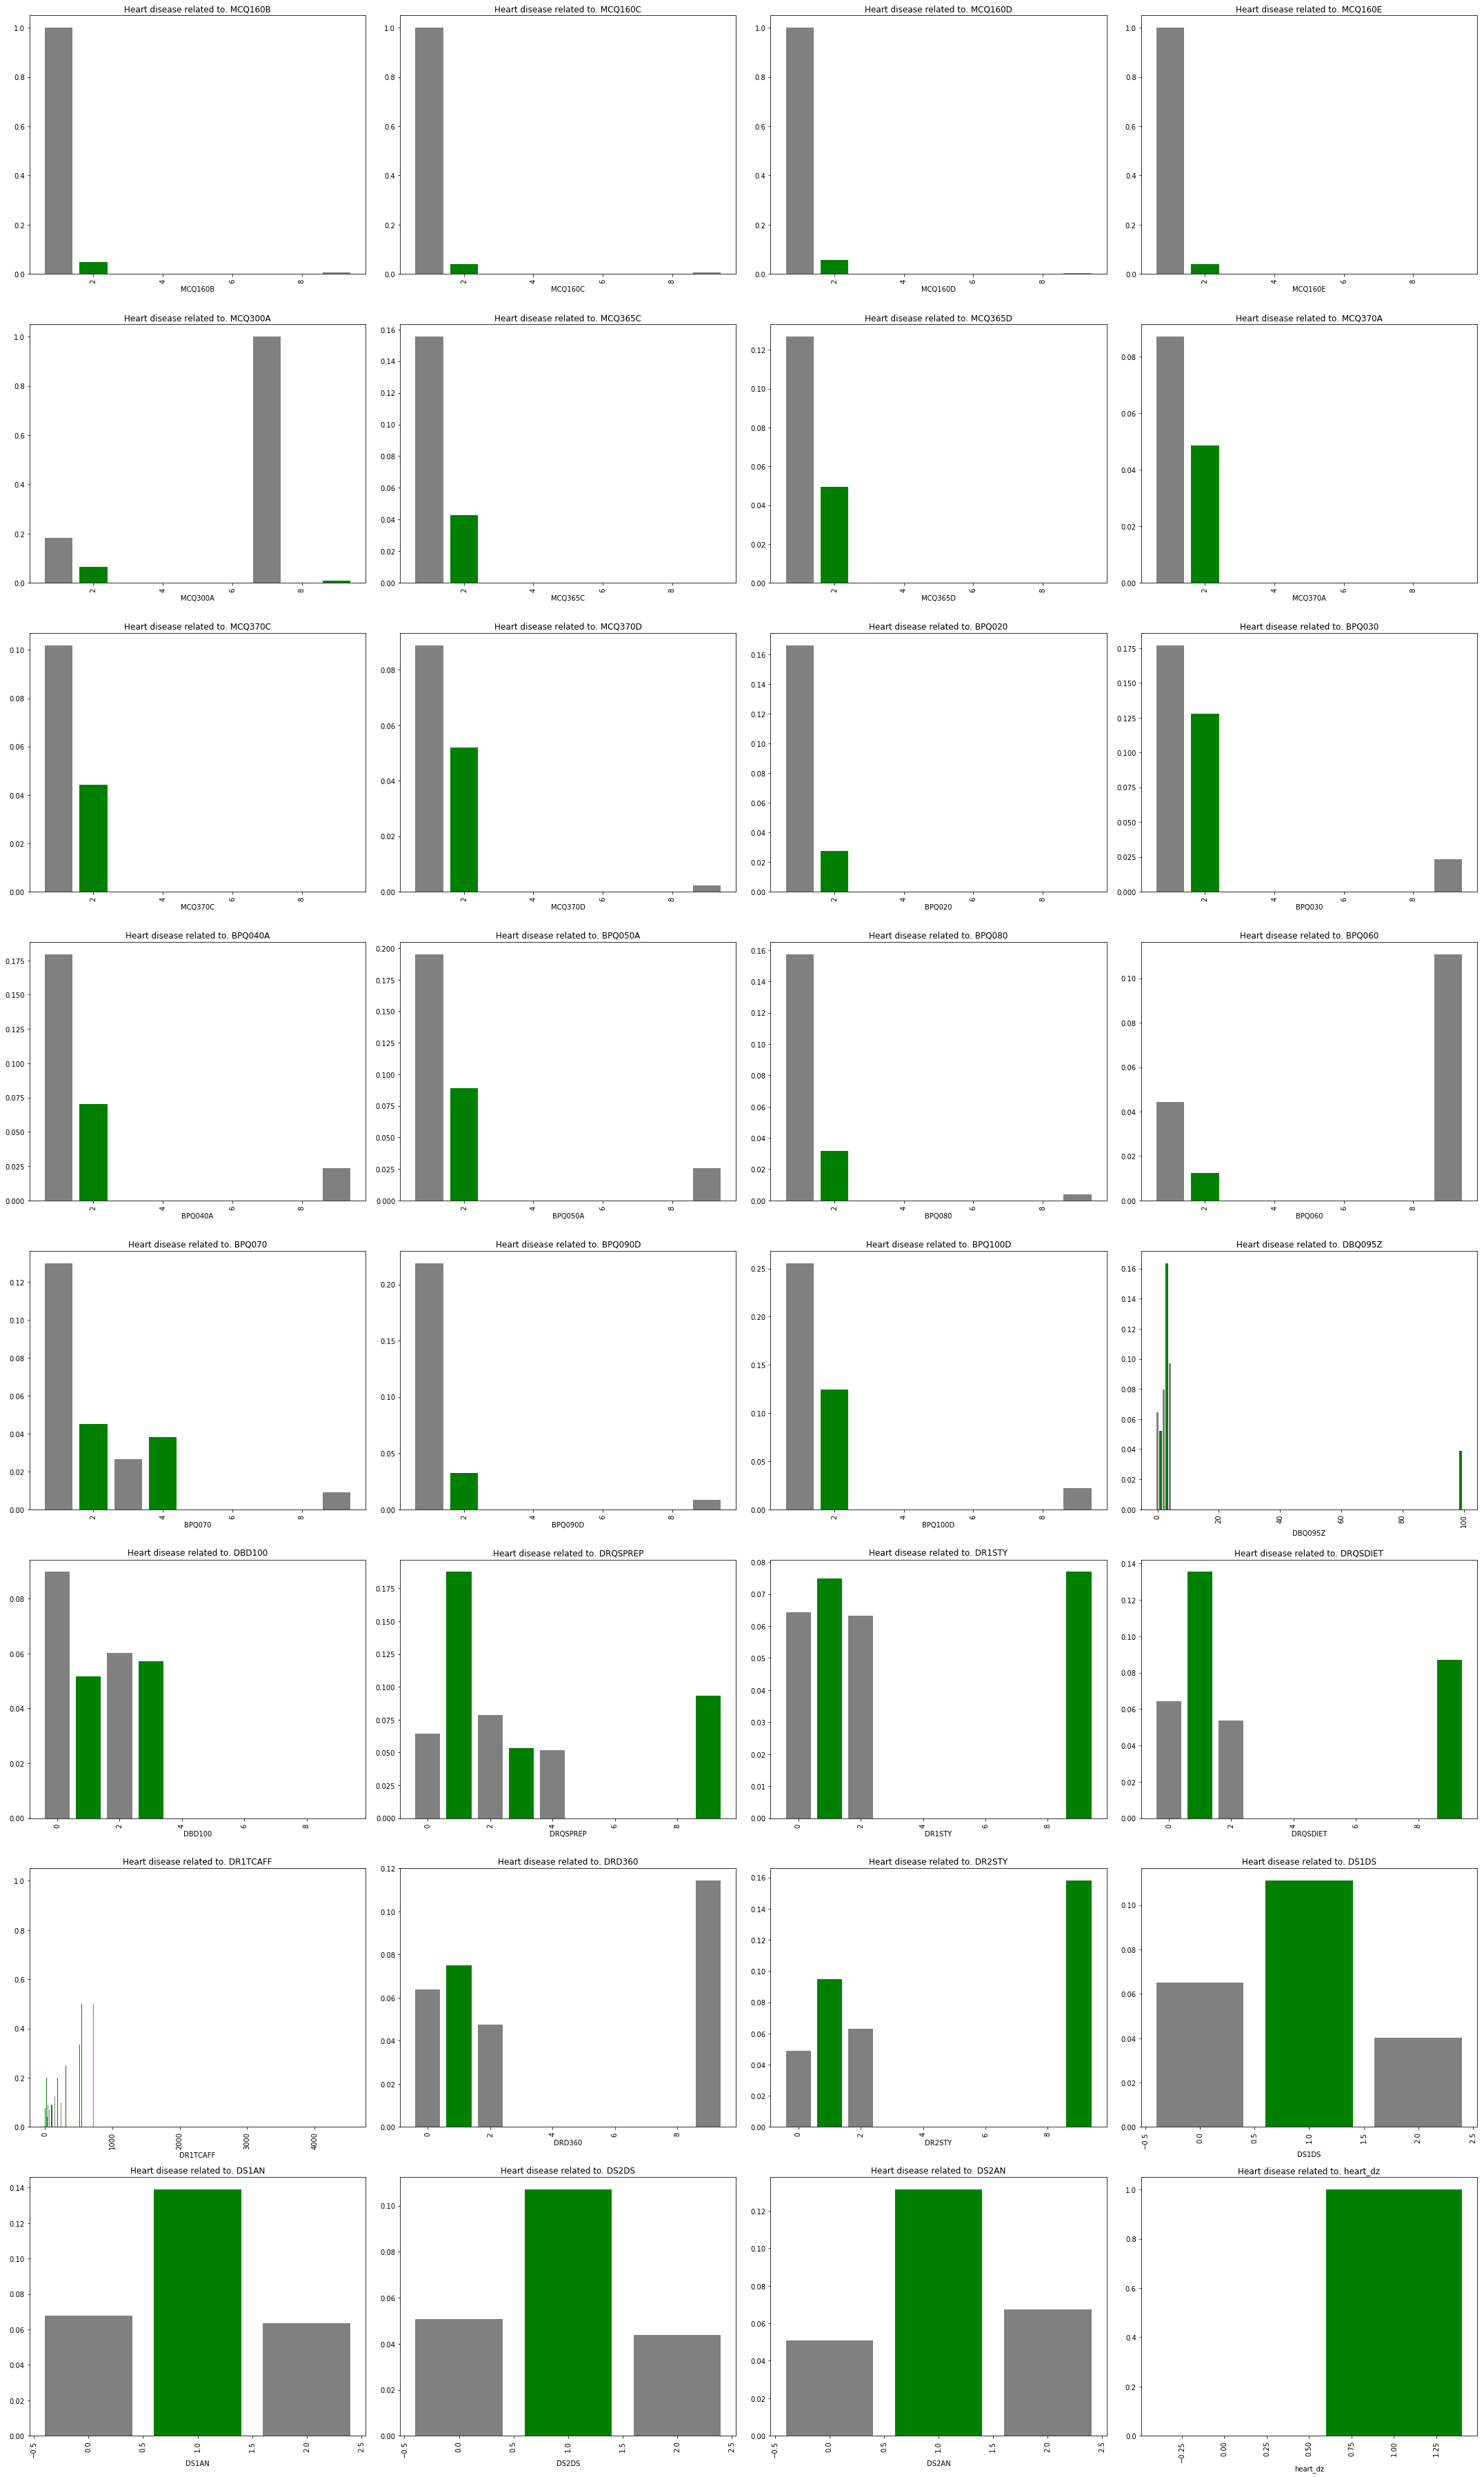

In [255]:
plt.figure(figsize=(30,50))

for index, column in enumerate(categorical_values):
    plt.subplot(8,4,index+1)
    plt.bar(nhanes_full_df.groupby(column)['heart_dz'].mean().index, nhanes_full_df.groupby(column)['heart_dz'].mean(),
           color=('grey','green'))
    plt.title('Heart disease related to. {}'.format(column))
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

### continuous variables

In [258]:
continuous_values = ['RIDAGEYR','BMXWT', 'BMXHT', 'BMXBMI',
                     'BMXWAIST', 'BMDAVSAD','bp_sys_avg', 'bp_dis_avg', 
                     'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 
                     'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 
                     'LBDNENO', 'LBDEONO', 'LBXRBCSI', 'LBXHGB', 
                     'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXRDW', 
                     'LBXPLTSI', 'LBXMPSI', 'LBXSAL', 'LBXSAPSI', 
                     'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBXSC3SI', 
                     'LBXSCA', 'LBXSCH', 'LBXSCK', 'LBXSCLSI', 
                     'LBXSCR', 'LBXSGL', 'LBXSIR', 'LBXSKSI',
                     'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH',
                     'LBDSPHSI', 'LBXSTB', 'LBXSTP', 'LBXSTR', 
                     'LBXSUA', 'LBDHDD', 'LBXTC', 'LBXHSCRP', 
                     'DR1TCAFF', 'tot_kcal_avg', 'tot_pro_avg', 
                     'tot_carb_avg', 'tot_sugar_avg', 'tot_fiber_avg', 
                     'tot_fat_avg', 'tot_sfat_avg', 'tot_mfat_avg', 
                     'tot_pfat_avg', 'tot_fchol_avg', 'tot_vit_e_avg', 
                     'tot_retinol_avg', 'tot_vit_a_avg', 'tot_alpha_c_avg', 
                     'tot_beta_c_avg', 'tot_beta_cry_avg', 'tot_lyco_avg', 
                     'tot_lutein_avg', 'vit_b1_avg', 'vit_b2_avg', 
                     'niac_avg', 'vit_b6_avg', 'folate_avg', 
                     'folic_acid_avg', 'food_fol_avg', 'folate_dfe_avg', 
                     'tot_choline_avg', 'vit_b12_avg', 'vit_c_avg', 
                     'vit_d_avg', 'tot_vit_k_avg', 'calc_avg',
                     'tot_phos_avg', 'mag_avg', 'fe_avg', 'zn_avg', 
                     'cu_avg', 'na_avg', 'k_avg', 'se_avg', 'tot_mois_avg',
                     'tot_h20_avg', 'supp_b1_avg', 'supp_b2_avg', 
                     'supp_nia_avg', 'supp_b6_avg', 'supp_b12_avg', 
                     'supp_folate_avg', 'supp_folfde_avg', 'supp_c_avg', 
                     'supp_d_avg', 'supp_ca_avg', 'supp_mg_avg',
                     'supp_fe_avg', 'supp_zn_avg', 'supp_cu_avg', 
                     'supp_na_avg', 'supp_potk_avg', 'supp_se_avg', 
                     'tot_b1_avg', 'tot_b2_avg', 'tot_niac_avg', 
                     'tot_b6_avg', 'tot_b12_avg', 'tot_c_avg',
                     'tot_d_avg', 'tot_calc_avg', 'tot_mag_avg', 
                     'tot_fe_avg', 'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg',
                     'tot_k_avg', 'tot_se_avg', 'tot_folate_avg']


In [259]:
len(continuous_values)

128

In [348]:
log_values = ['log_BMXWT', 'log_BMXBMI', 'log_BMXWAIST',
                  'log_bp_sys_avg', 'log_bp_dis_avg', 'log_LBXWBCSI',
                  'log_LBXLYPCT', 'log_LBXMOPCT', 'log_LBXEOPCT',
                  'log_LBXBAPCT', 'log_LBDLYMNO', 'log_LBDMONO',
                  'log_LBDNENO', 'log_LBDEONO', 'log_LBXRBCSI',
                  'log_LBXHCT','log_LBXRDW', 'log_LBXPLTSI',
                  'log_LBXMPSI', 'log_LBXSAPSI', 'log_LBXSASSI',
                  'log_LBXSATSI', 'log_LBXSBU', 'log_LBXSCA',
                  'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI',
                  'log_LBXSCR', 'log_LBXSGL', 'log_LBXSIR',
                  'log_LBXSKSI', 'log_LBXSLDSI', 'log_LBXSNASI',
                  'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI',
                  'log_LBXSTB', 'log_LBXSTP', 'log_LBXSTR',
                  'log_LBXSUA', 'log_LBDHDD', 'log_LBXTC',
                  'log_LBXHSCRP', 'log_DR1TCAFF', 'log_tot_kcal_avg',
                  'log_tot_pro_avg', 'log_tot_carb_avg', 'log_tot_sugar_avg',
                  'log_tot_fiber_avg', 'log_tot_fat_avg', 'log_tot_sfat_avg',
                  'log_tot_mfat_avg', 'log_tot_pfat_avg', 'log_tot_fchol_avg',
                  'log_tot_vit_e_avg', 'log_tot_retinol_avg', 'log_tot_vit_a_avg',
                  'log_tot_alpha_c_avg', 'log_tot_beta_c_avg', 'log_tot_beta_cry_avg',
                  'log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_vit_b1_avg',
                  'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg',
                  'log_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg',
                  'log_folate_dfe_avg', 'log_tot_choline_avg', 'log_vit_b12_avg',
                  'log_vit_c_avg', 'log_vit_d_avg', 'log_tot_vit_k_avg',
                  'log_calc_avg', 'log_tot_phos_avg', 'log_mag_avg',
                  'log_fe_avg', 'log_zn_avg', 'log_cu_avg',
                  'log_na_avg', 'log_k_avg', 'log_se_avg', 'log_tot_mois_avg',
                  'log_tot_h20_avg', 'log_tot_b1_avg', 'log_tot_b2_avg',
                  'log_tot_niac_avg', 'log_tot_b6_avg', 'log_tot_b12_avg',
                  'log_tot_c_avg', 'log_tot_d_avg', 'log_tot_calc_avg',
                  'log_tot_mag_avg', 'log_tot_fe_avg', 'log_tot_zn_avg',
                  'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg',
                  'log_tot_se_avg', 'log_tot_folate_avg']

In [328]:
len(log_values)

102

In [298]:
body_continuous = nhanes_full_df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMDAVSAD',
                   'bp_sys_avg', 'bp_dis_avg']]

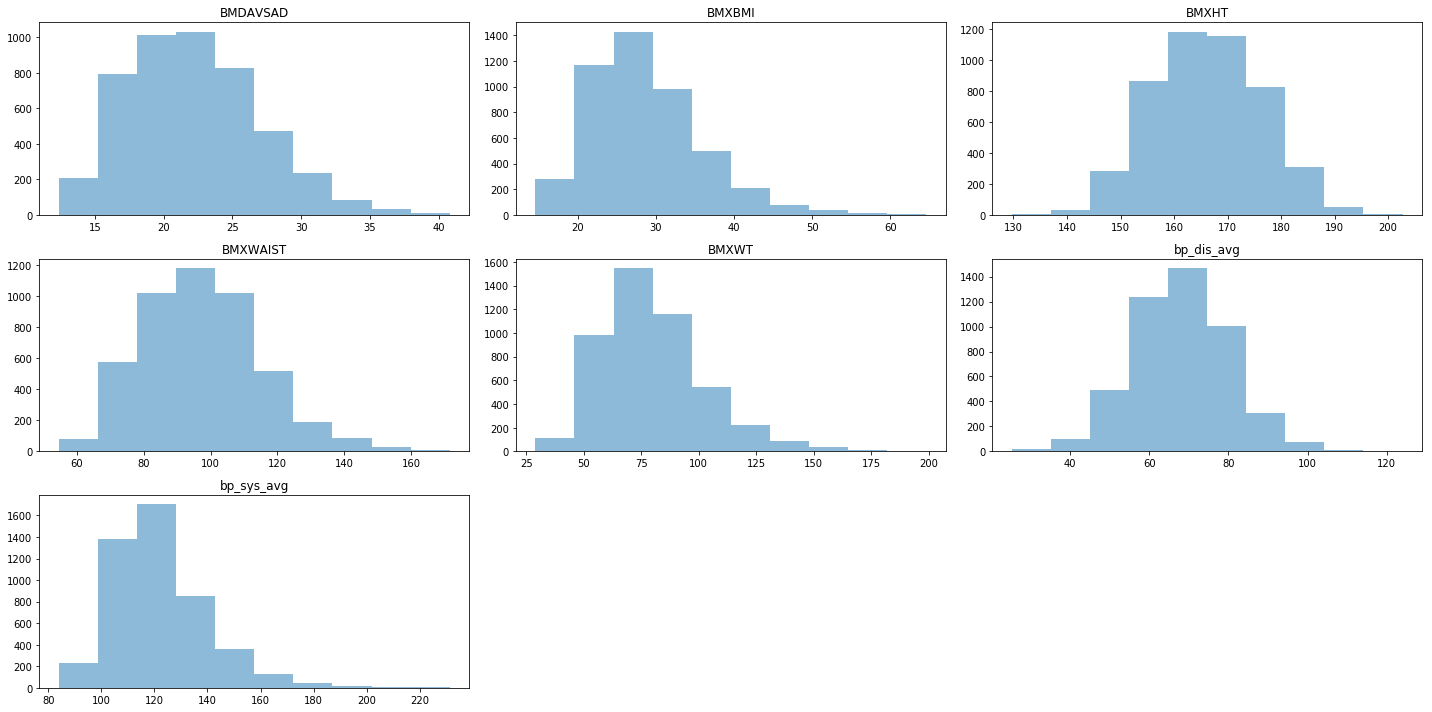

In [312]:
body_continuous.hist(grid=False, alpha=0.5, figsize=(20, 10))
plt.tight_layout()

#### comment: would anticipte these values to be normal distribution as they are body measurements

In [349]:
body_log_continuous = nhanes_full_df[['log_BMXWT', 'log_BMXBMI', 'log_BMXWAIST',
                  'log_bp_sys_avg', 'log_bp_dis_avg']]

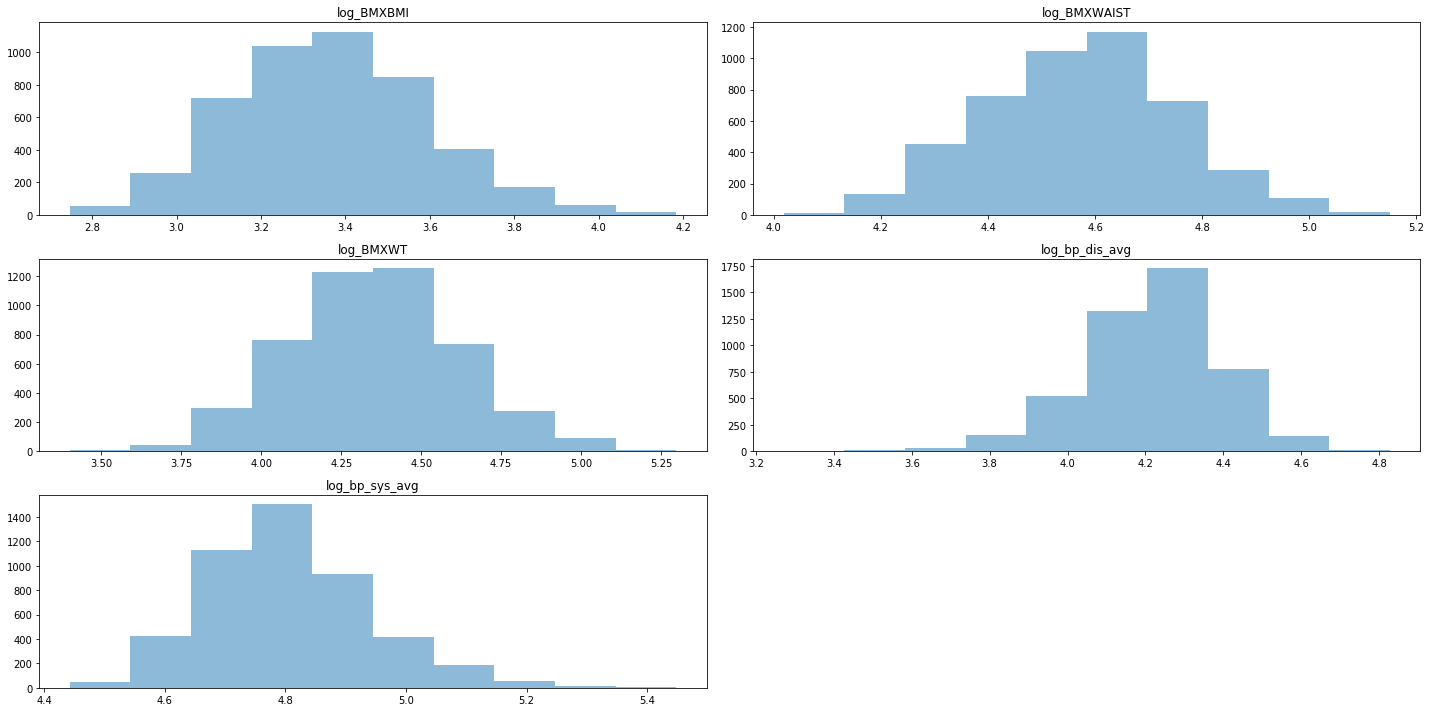

In [350]:
body_log_continuous.hist(grid=False, alpha=0.5, figsize=(20, 10))
plt.tight_layout()

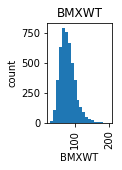

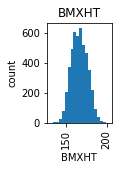

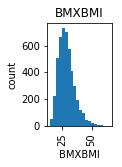

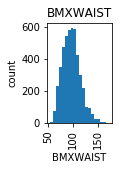

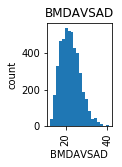

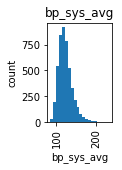

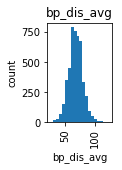

In [299]:
#remove from final
for column in body_continuous.columns.to_list(): 
       
    plt.subplot(2,4,index+1)
    plt.hist(body_continuous[column], bins=20)
    plt.title('{}'.format(column))
    plt.xlabel(column)
    plt.ylabel('count')
    plt.xticks(rotation='vertical')

    plt.tight_layout()
    plt.show()

In [300]:
lab_continuous = nhanes_full_df[['LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXMOPCT', 
                  'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 
                  'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBXRBCSI', 
                  'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 
                  'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXSAL', 
                  'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 
                  'LBXSC3SI', 'LBXSCA', 'LBXSCH', 'LBXSCK',
                  'LBXSCLSI', 'LBXSCR', 'LBXSGL', 'LBXSIR', 
                  'LBXSKSI', 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 
                  'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBXSTP', 
                  'LBXSTR', 'LBXSUA', 'LBDHDD', 'LBXTC', 
                  'LBXHSCRP']]

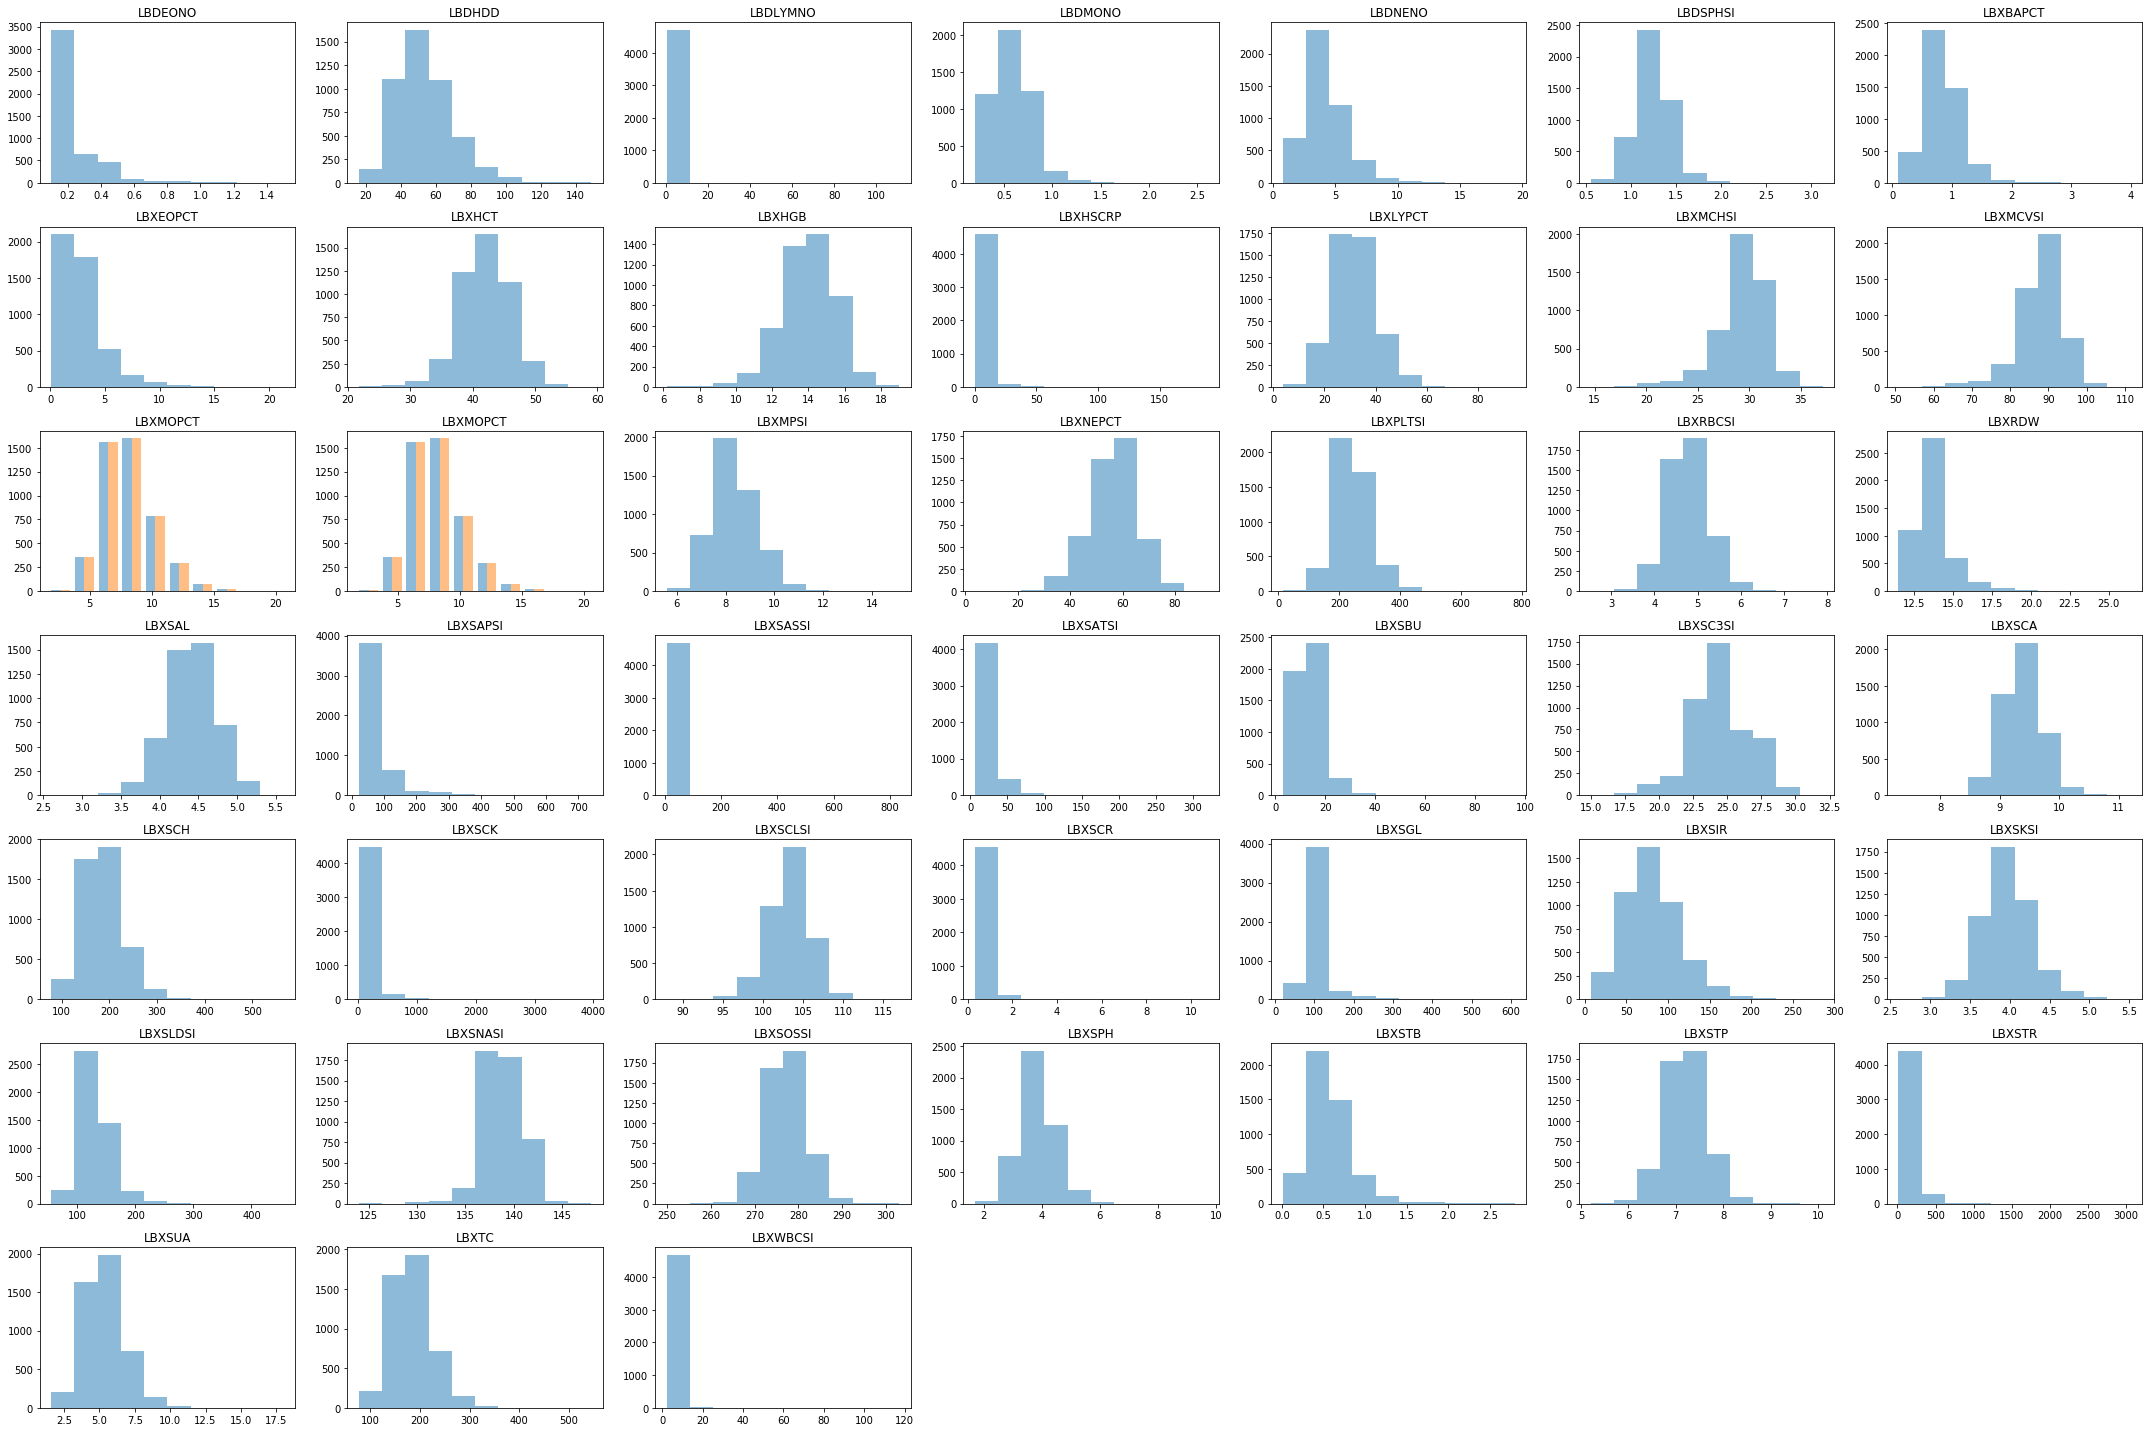

In [314]:
#use this one
lab_continuous.hist(grid=False, alpha=0.5, figsize=(30, 20))
plt.tight_layout()

In [351]:
lab_log_continuous = nhanes_full_df[
    ['log_LBXWBCSI','log_LBXLYPCT', 'log_LBXMOPCT', 'log_LBXEOPCT',
     'log_LBXBAPCT', 'log_LBDLYMNO', 'log_LBDMONO', 'log_LBDNENO', 
     'log_LBDEONO', 'log_LBXRBCSI', 'log_LBXHCT','log_LBXRDW', 
     'log_LBXPLTSI', 'log_LBXMPSI', 'log_LBXSAPSI', 'log_LBXSASSI',
     'log_LBXSATSI', 'log_LBXSBU', 'log_LBXSCA', 'log_LBXSCH', 
     'log_LBXSCK', 'log_LBXSCLSI', 'log_LBXSCR', 'log_LBXSGL', 
     'log_LBXSIR', 'log_LBXSKSI', 'log_LBXSLDSI', 'log_LBXSNASI',
     'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI', 'log_LBXSTB', 
     'log_LBXSTP', 'log_LBXSTR', 'log_LBXSUA', 'log_LBDHDD', 
     'log_LBXTC', 'log_LBXHSCRP']]

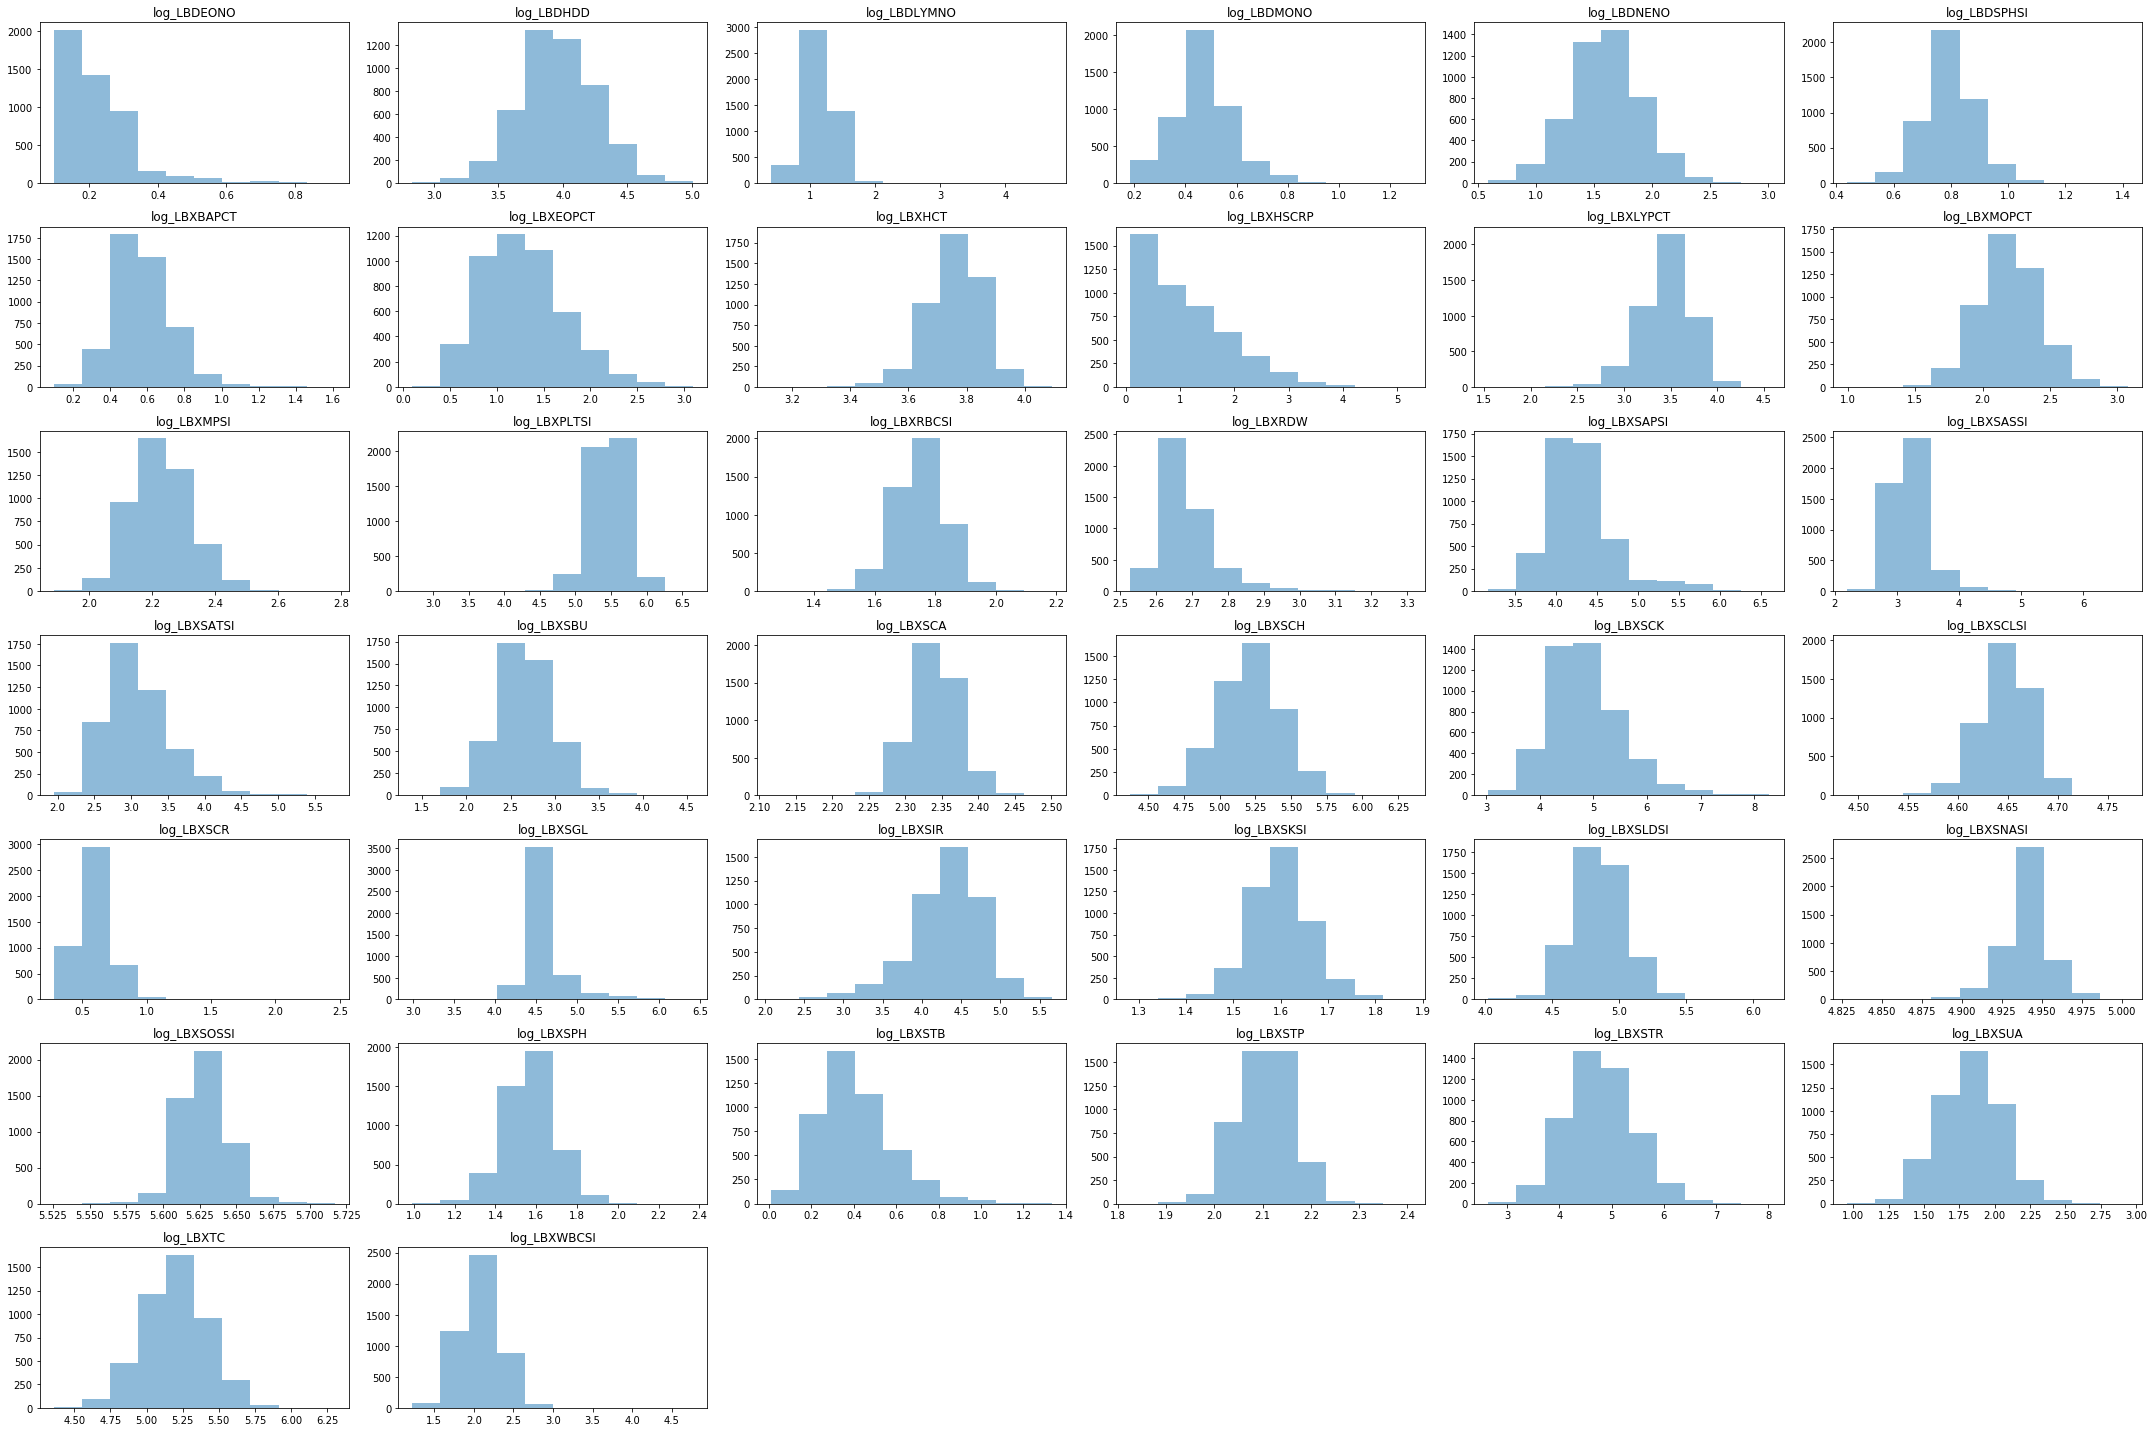

In [352]:
lab_log_continuous.hist(grid=False, alpha=0.5, figsize=(30, 20))
plt.tight_layout()

#### comment: distribution of lab values is much more normal after log-transformation

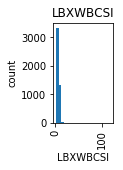

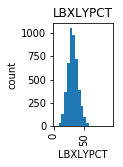

KeyboardInterrupt: 

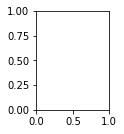

In [301]:
#unable to run due to run time; freezes computer
for column in lab_continuous.columns.to_list(): 
       
    plt.subplot(2,4,index+1)
    plt.hist(lab_continuous[column], bins=20)
    plt.title('{}'.format(column))
    plt.xlabel(column)
    plt.ylabel('count')
    plt.xticks(rotation='vertical')

    plt.tight_layout()
    plt.show()

In [319]:
diet_continuous = nhanes_full_df[['tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
                   'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
                   'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
                   'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
                   'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
                   'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
                   'vit_b1_avg', 'vit_b2_avg', 'niac_avg', 
                   'vit_b6_avg', 'folate_avg', 'folic_acid_avg', 
                   'food_fol_avg', 'folate_dfe_avg', 'tot_choline_avg', 
                   'vit_b12_avg', 'vit_c_avg', 'vit_d_avg', 
                   'tot_vit_k_avg', 'calc_avg', 'tot_phos_avg', 
                   'mag_avg', 'fe_avg', 'zn_avg', 
                   'cu_avg', 'na_avg', 'k_avg', 
                   'se_avg', 'tot_mois_avg', 'tot_h20_avg']]

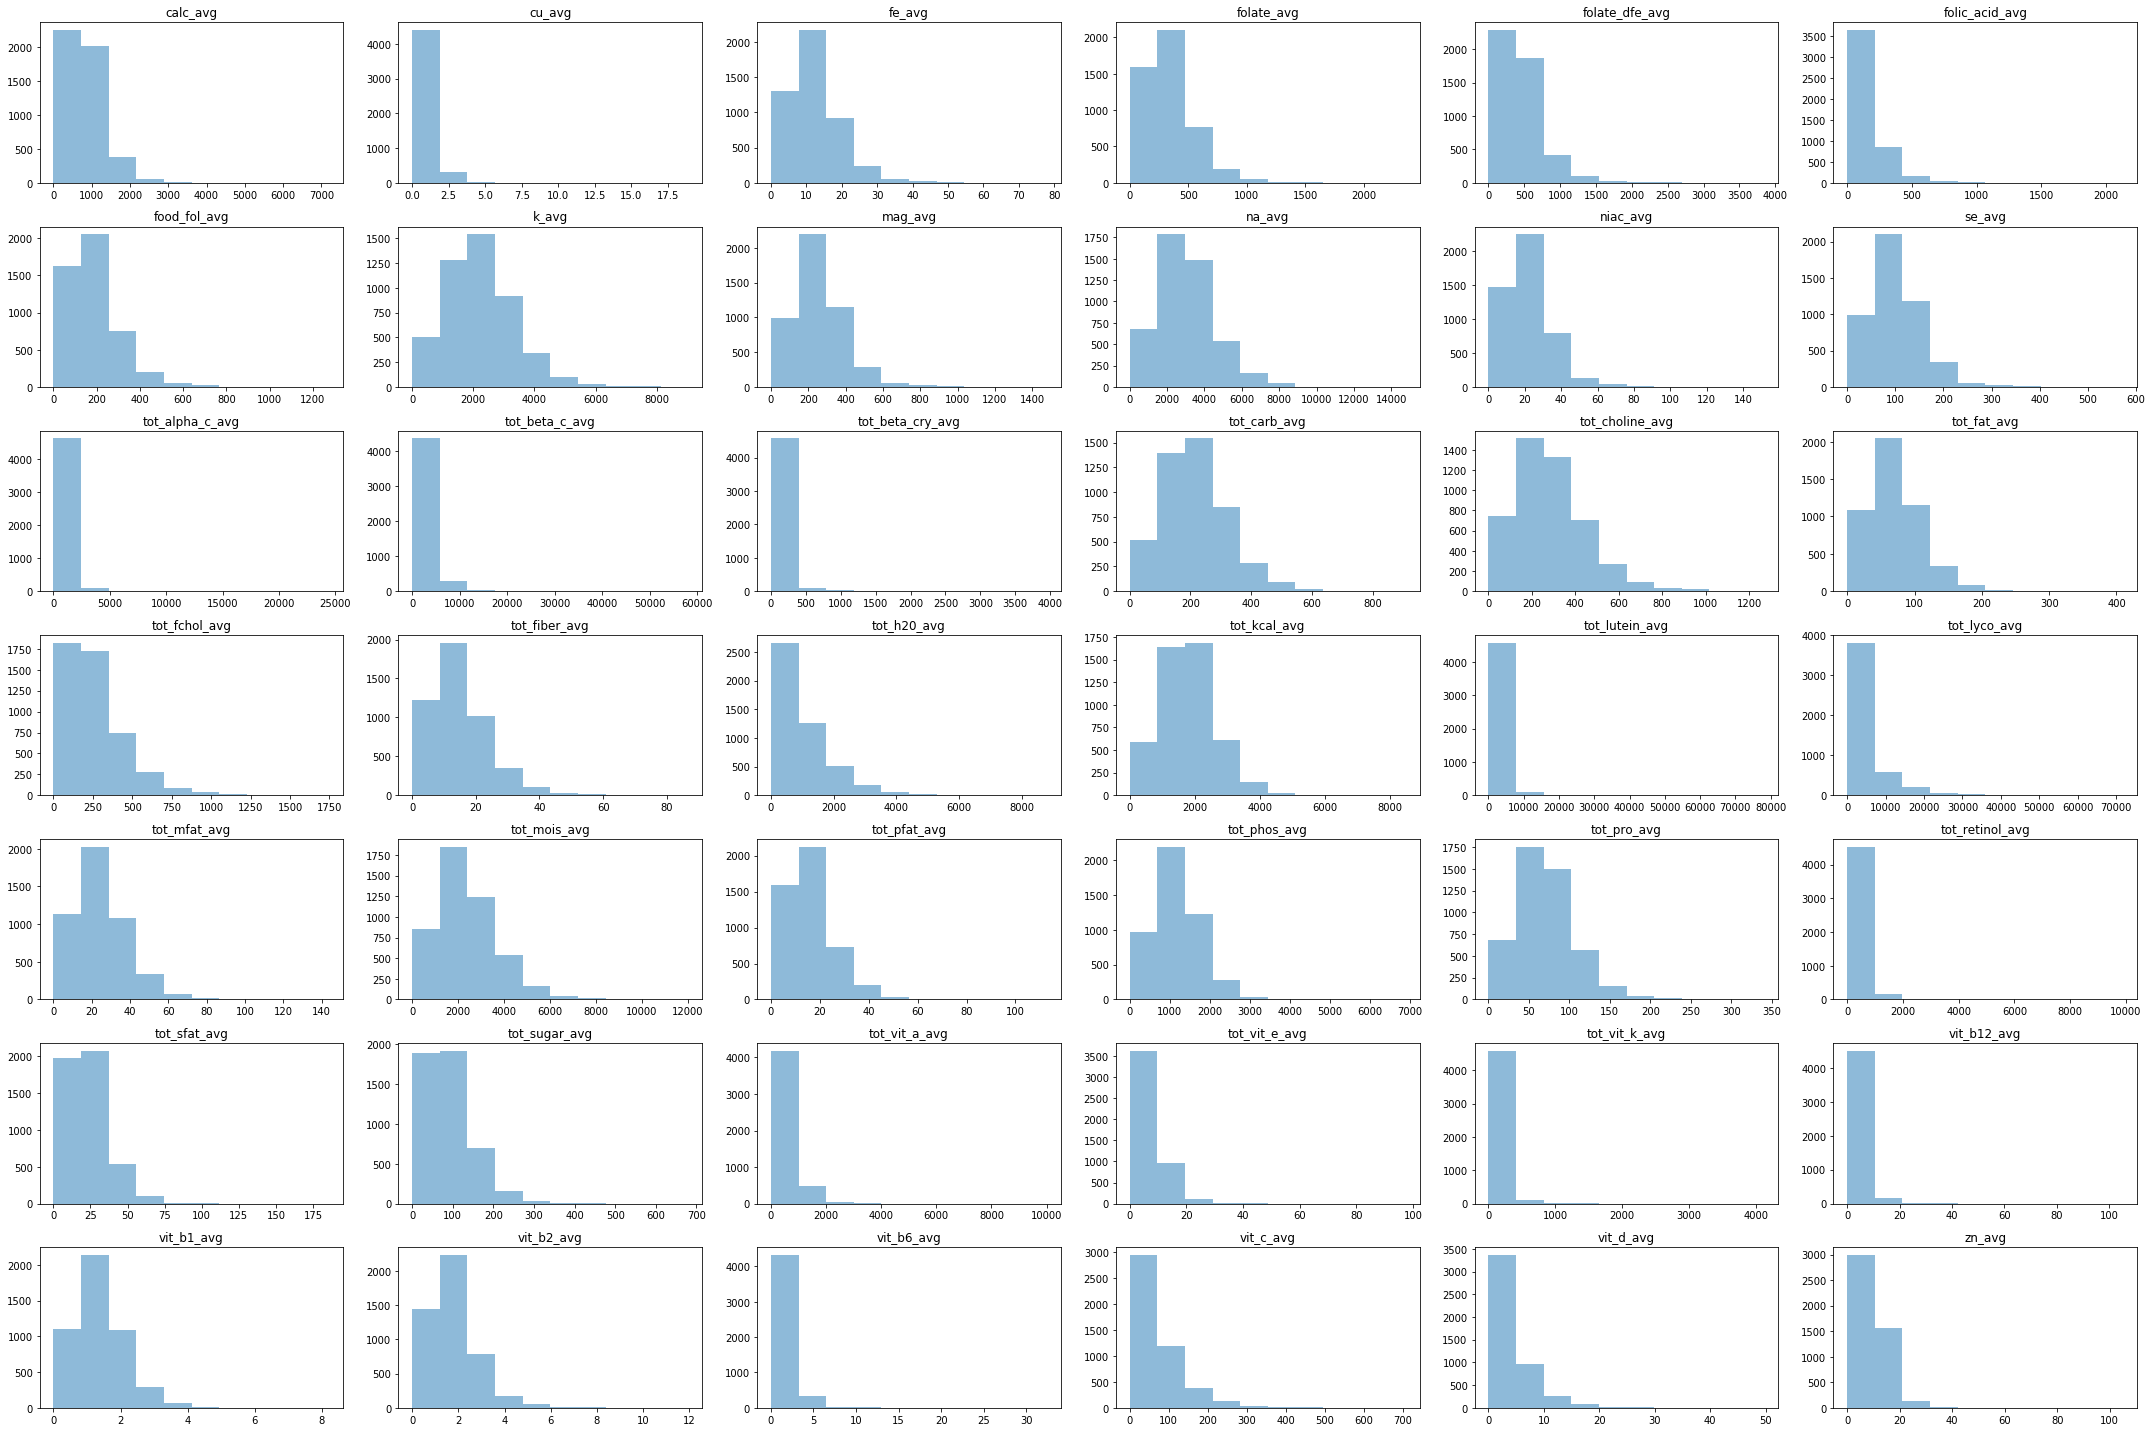

In [320]:
diet_continuous.hist(grid=False, alpha=0.5, figsize=(30, 20))
plt.tight_layout()

In [353]:
diet_log_continuous = nhanes_full_df[
    ['log_DR1TCAFF', 'log_tot_kcal_avg', 'log_tot_pro_avg', 'log_tot_carb_avg', 
     'log_tot_sugar_avg', 'log_tot_fiber_avg', 'log_tot_fat_avg', 'log_tot_sfat_avg',
     'log_tot_mfat_avg', 'log_tot_pfat_avg', 'log_tot_fchol_avg',
     'log_tot_vit_e_avg', 'log_tot_retinol_avg', 'log_tot_vit_a_avg',
     'log_tot_alpha_c_avg', 'log_tot_beta_c_avg', 'log_tot_beta_cry_avg',
     'log_tot_lyco_avg', 'log_tot_lutein_avg', 'log_vit_b1_avg',
     'log_vit_b2_avg', 'log_niac_avg', 'log_vit_b6_avg',
     'log_folate_avg', 'log_folic_acid_avg', 'log_food_fol_avg',
     'log_folate_dfe_avg', 'log_tot_choline_avg', 'log_vit_b12_avg',
     'log_vit_c_avg', 'log_vit_d_avg', 'log_tot_vit_k_avg',
     'log_calc_avg', 'log_tot_phos_avg', 'log_mag_avg',
     'log_fe_avg', 'log_zn_avg', 'log_cu_avg', 'log_na_avg', 
     'log_k_avg', 'log_se_avg', 'log_tot_mois_avg', 'log_tot_h20_avg', 
     'log_tot_b1_avg', 'log_tot_b2_avg', 'log_tot_niac_avg', 
     'log_tot_b6_avg', 'log_tot_b12_avg', 'log_tot_c_avg', 'log_tot_d_avg', 
     'log_tot_calc_avg', 'log_tot_mag_avg', 'log_tot_fe_avg', 'log_tot_zn_avg',
     'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg', 'log_tot_se_avg', 
     'log_tot_folate_avg']]

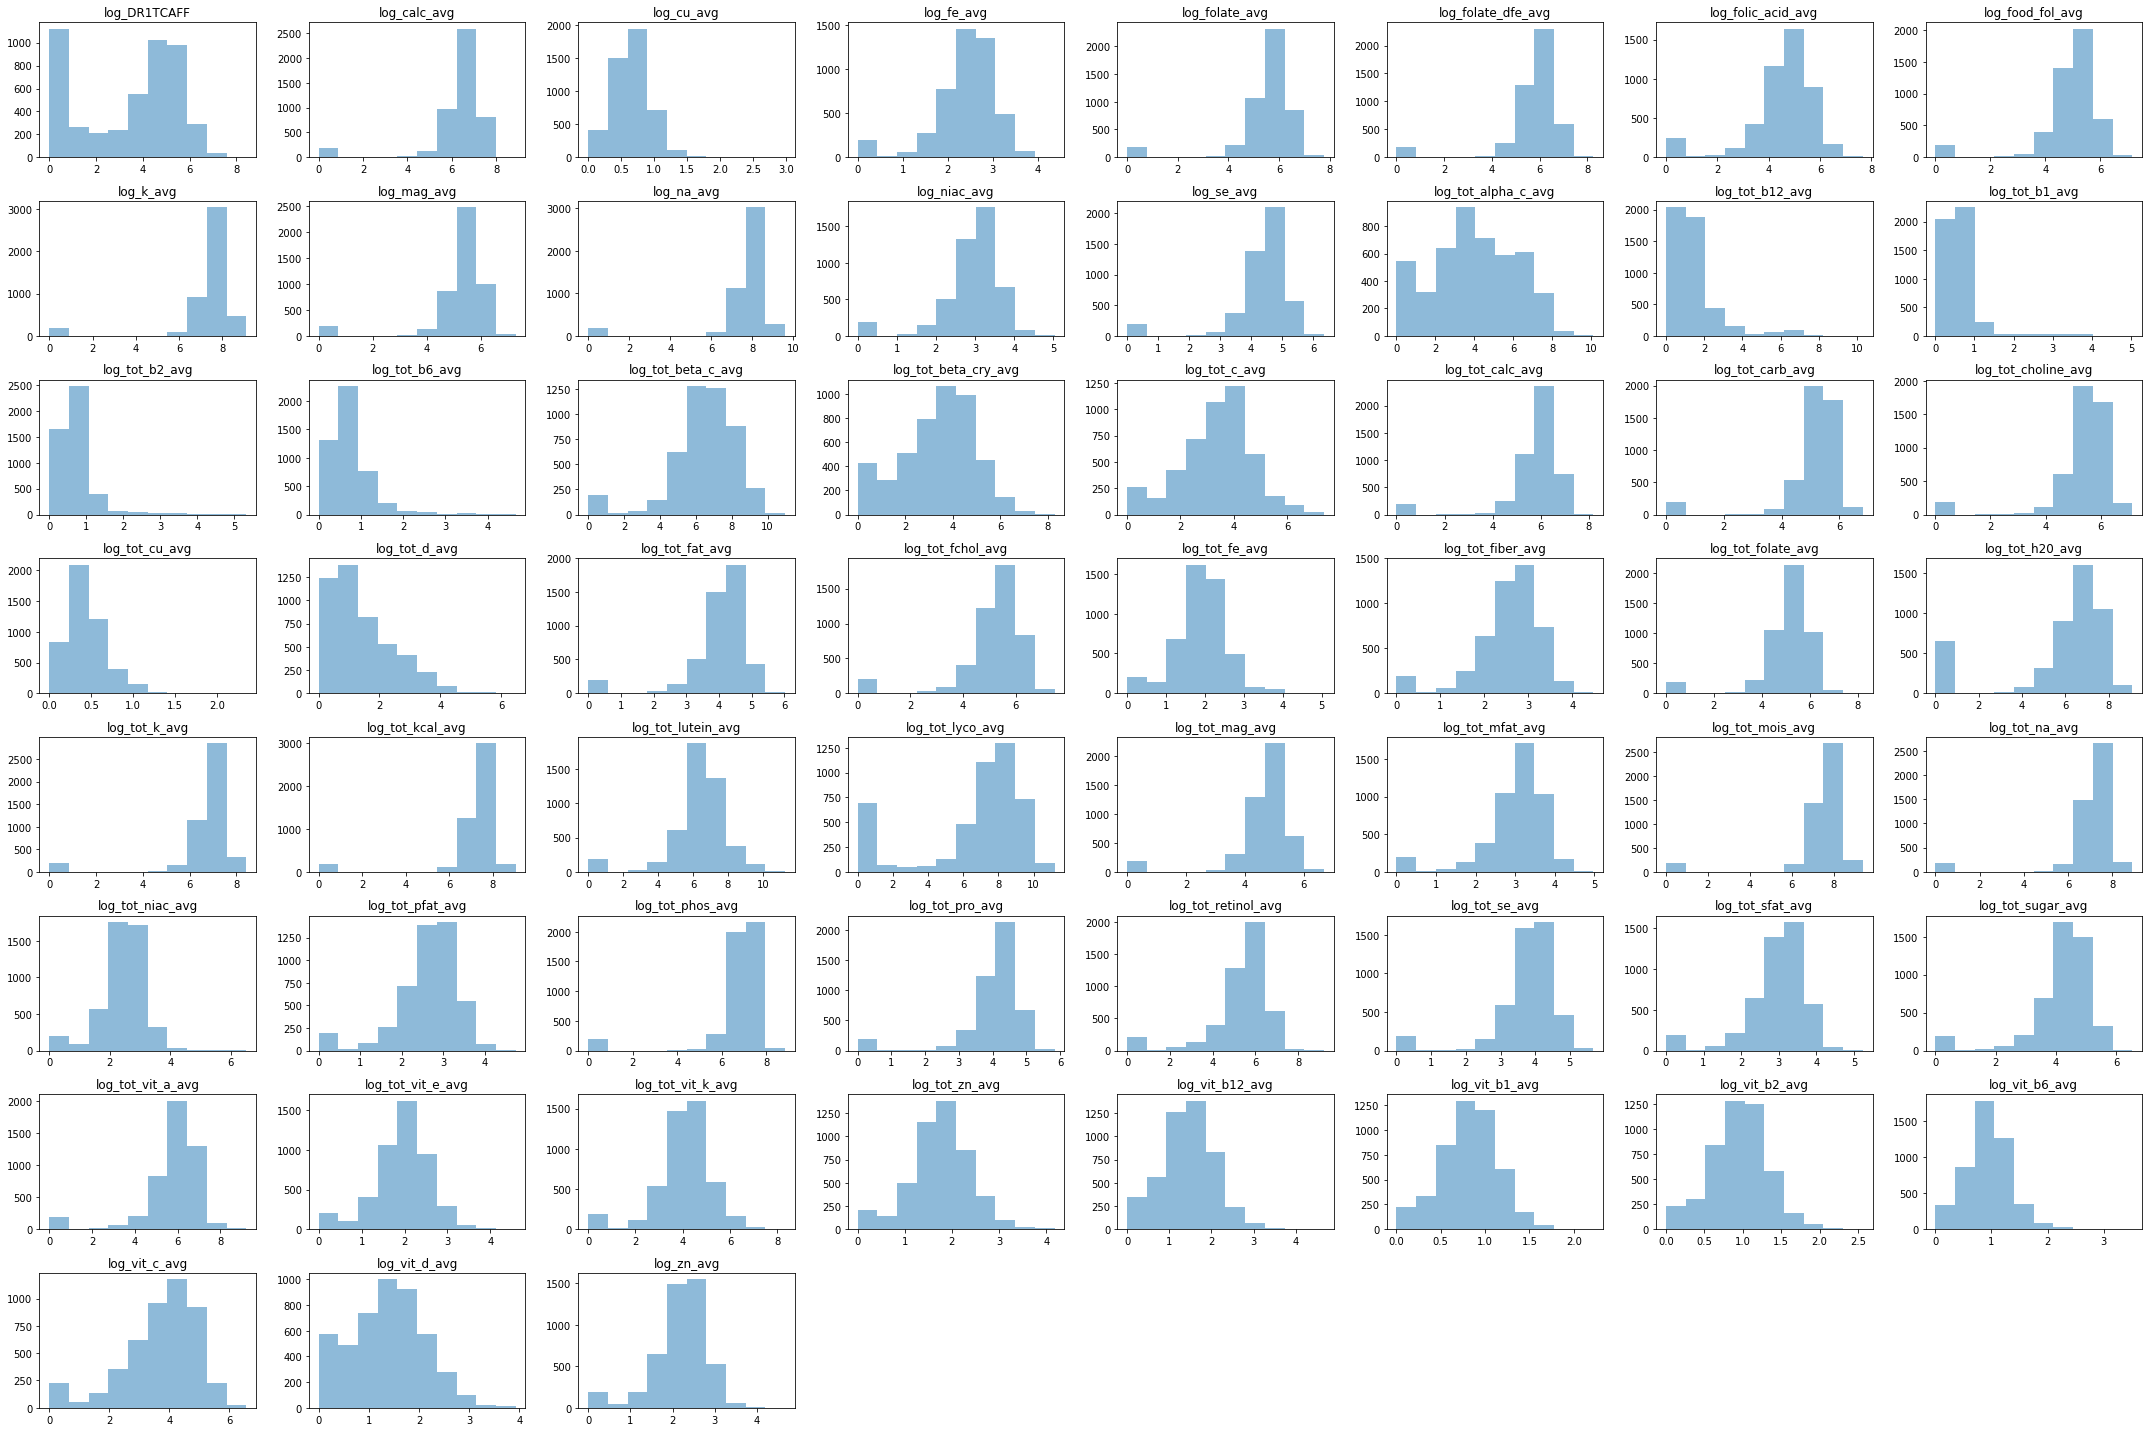

In [354]:
diet_log_continuous.hist(grid=False, alpha=0.5, figsize=(30, 20))
plt.tight_layout()

In [321]:
supplement_continuous = nhanes_full_df[['supp_b1_avg', 'supp_b2_avg', 'supp_nia_avg', 
                         'supp_b6_avg', 'supp_b12_avg', 'supp_folate_avg', 
                         'supp_folfde_avg', 'supp_c_avg', 'supp_d_avg', 
                         'supp_ca_avg', 'supp_mg_avg', 'supp_fe_avg', 
                         'supp_zn_avg', 'supp_cu_avg', 'supp_na_avg',
                         'supp_potk_avg', 'supp_se_avg']]

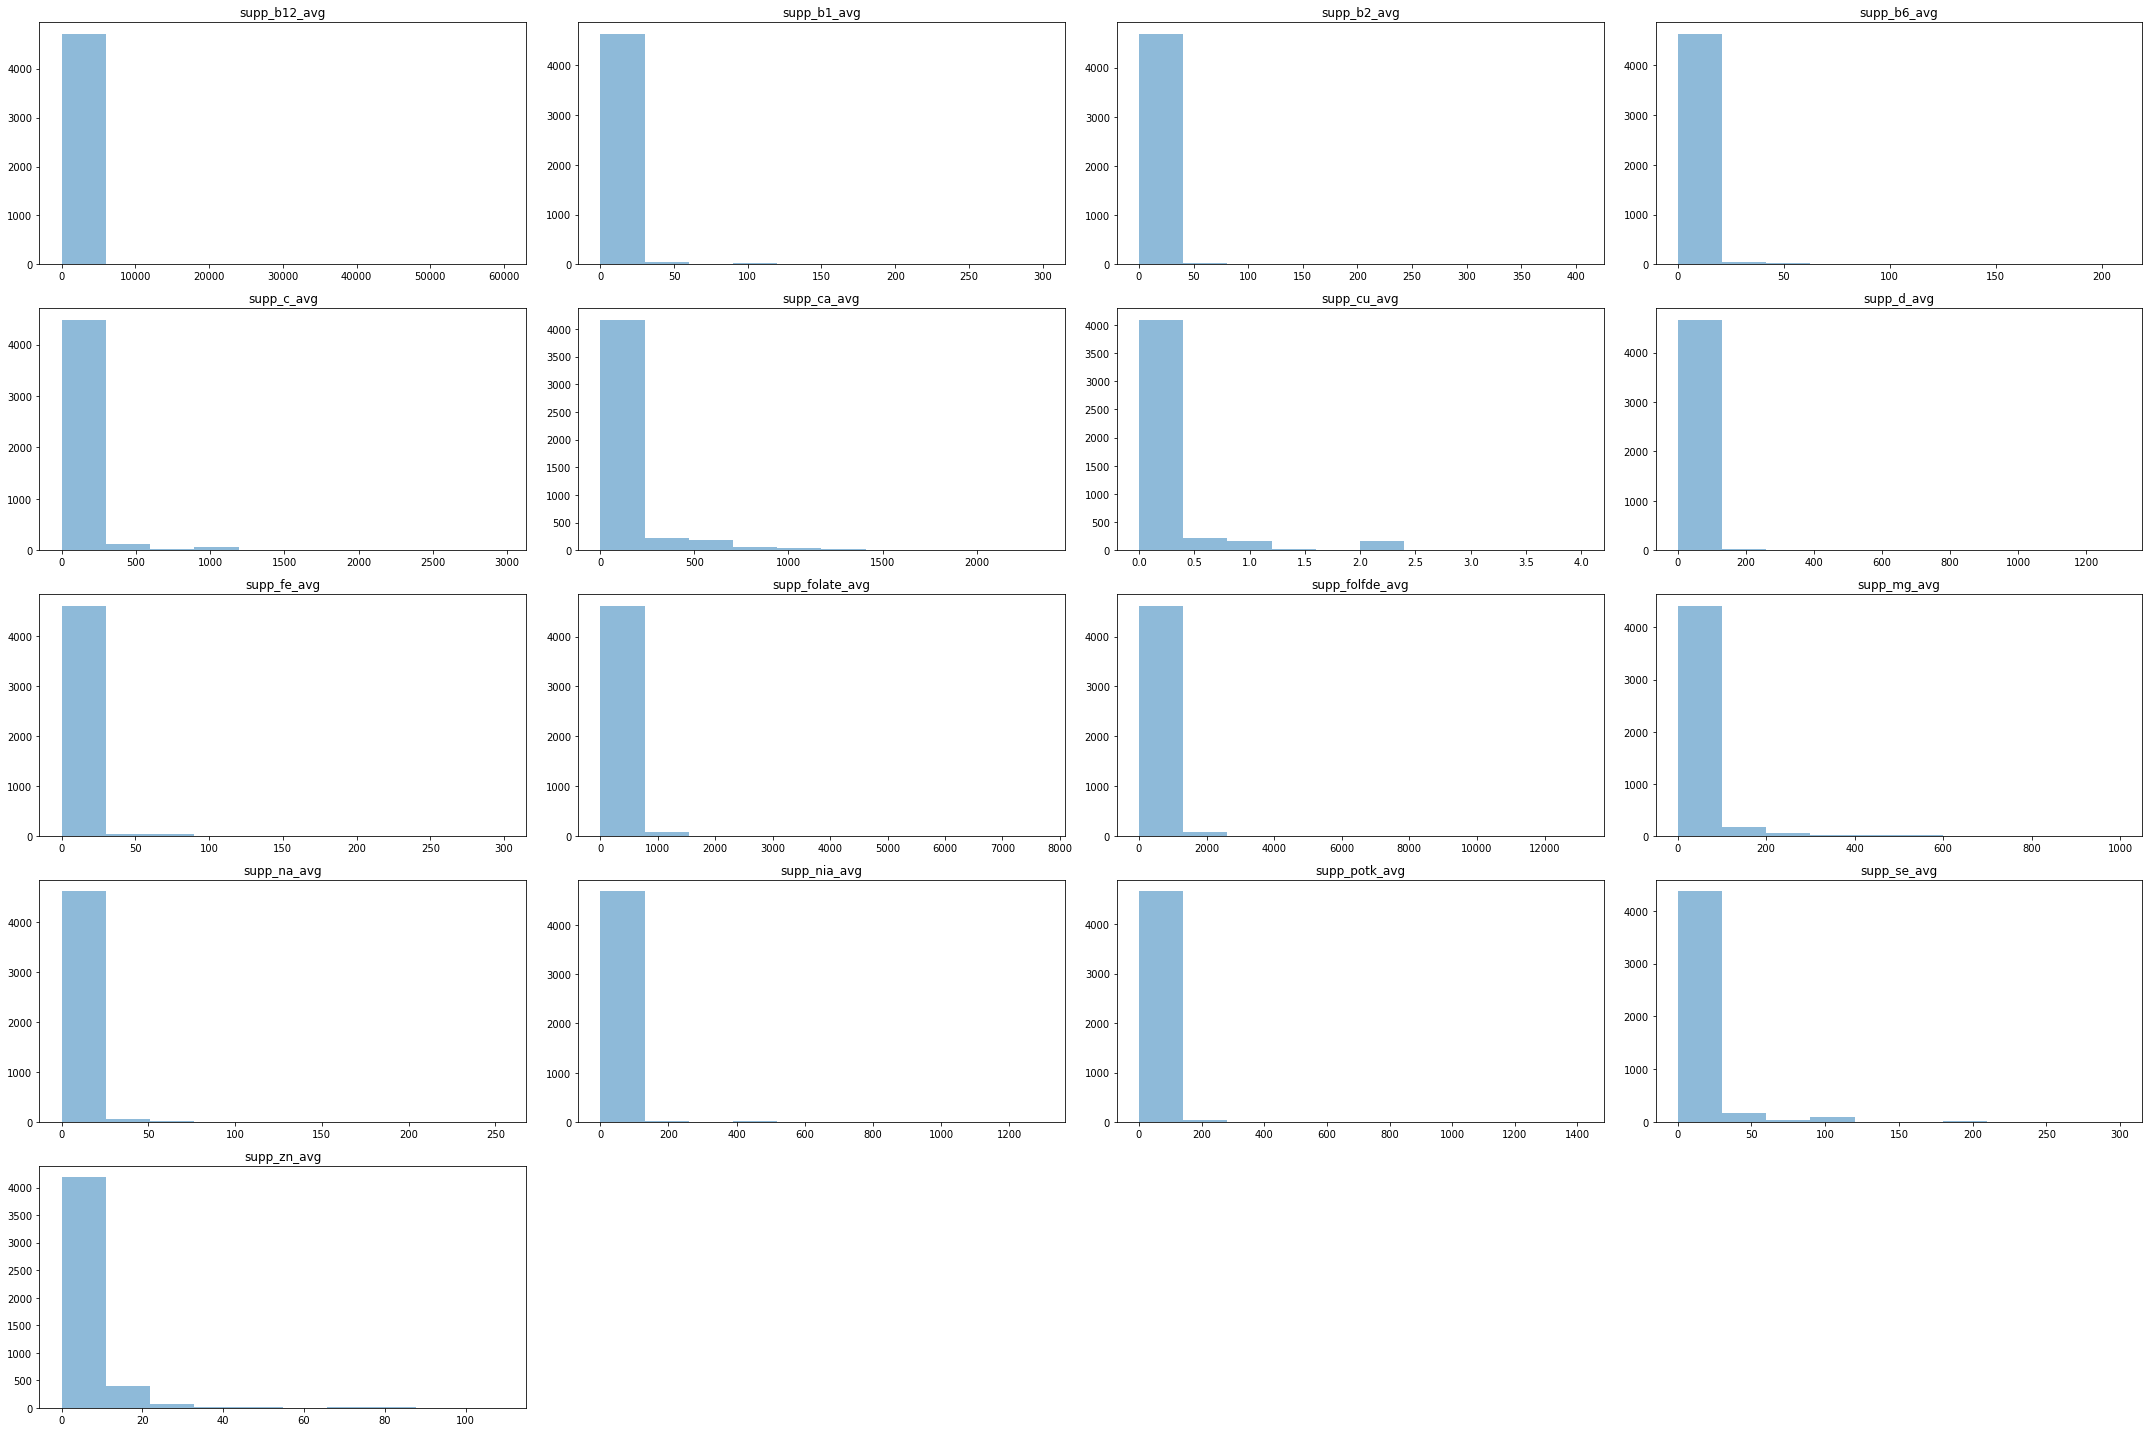

In [322]:
supplement_continuous.hist(grid=False, alpha=0.5, figsize=(30, 20))
plt.tight_layout()

In [323]:
total_intake_continuous = nhanes_full_df[['tot_kcal_avg', 'tot_pro_avg', 'tot_carb_avg',
                           'tot_sugar_avg', 'tot_fiber_avg', 'tot_fat_avg',
                           'tot_sfat_avg', 'tot_mfat_avg', 'tot_pfat_avg',
                           'tot_fchol_avg', 'tot_vit_e_avg', 'tot_retinol_avg',
                           'tot_vit_a_avg', 'tot_alpha_c_avg', 'tot_beta_c_avg',
                           'tot_beta_cry_avg', 'tot_lyco_avg', 'tot_lutein_avg',
                           'tot_choline_avg', 'tot_vit_k_avg', 'tot_phos_avg',
                           'tot_mois_avg', 'tot_h20_avg', 'tot_b1_avg', 
                           'tot_b2_avg', 'tot_niac_avg', 'tot_b6_avg', 
                           'tot_b12_avg', 'tot_c_avg', 'tot_d_avg', 
                           'tot_calc_avg', 'tot_mag_avg', 'tot_fe_avg',
                           'tot_zn_avg', 'tot_cu_avg', 'tot_na_avg', 
                           'tot_k_avg', 'tot_se_avg', 'tot_folate_avg']]

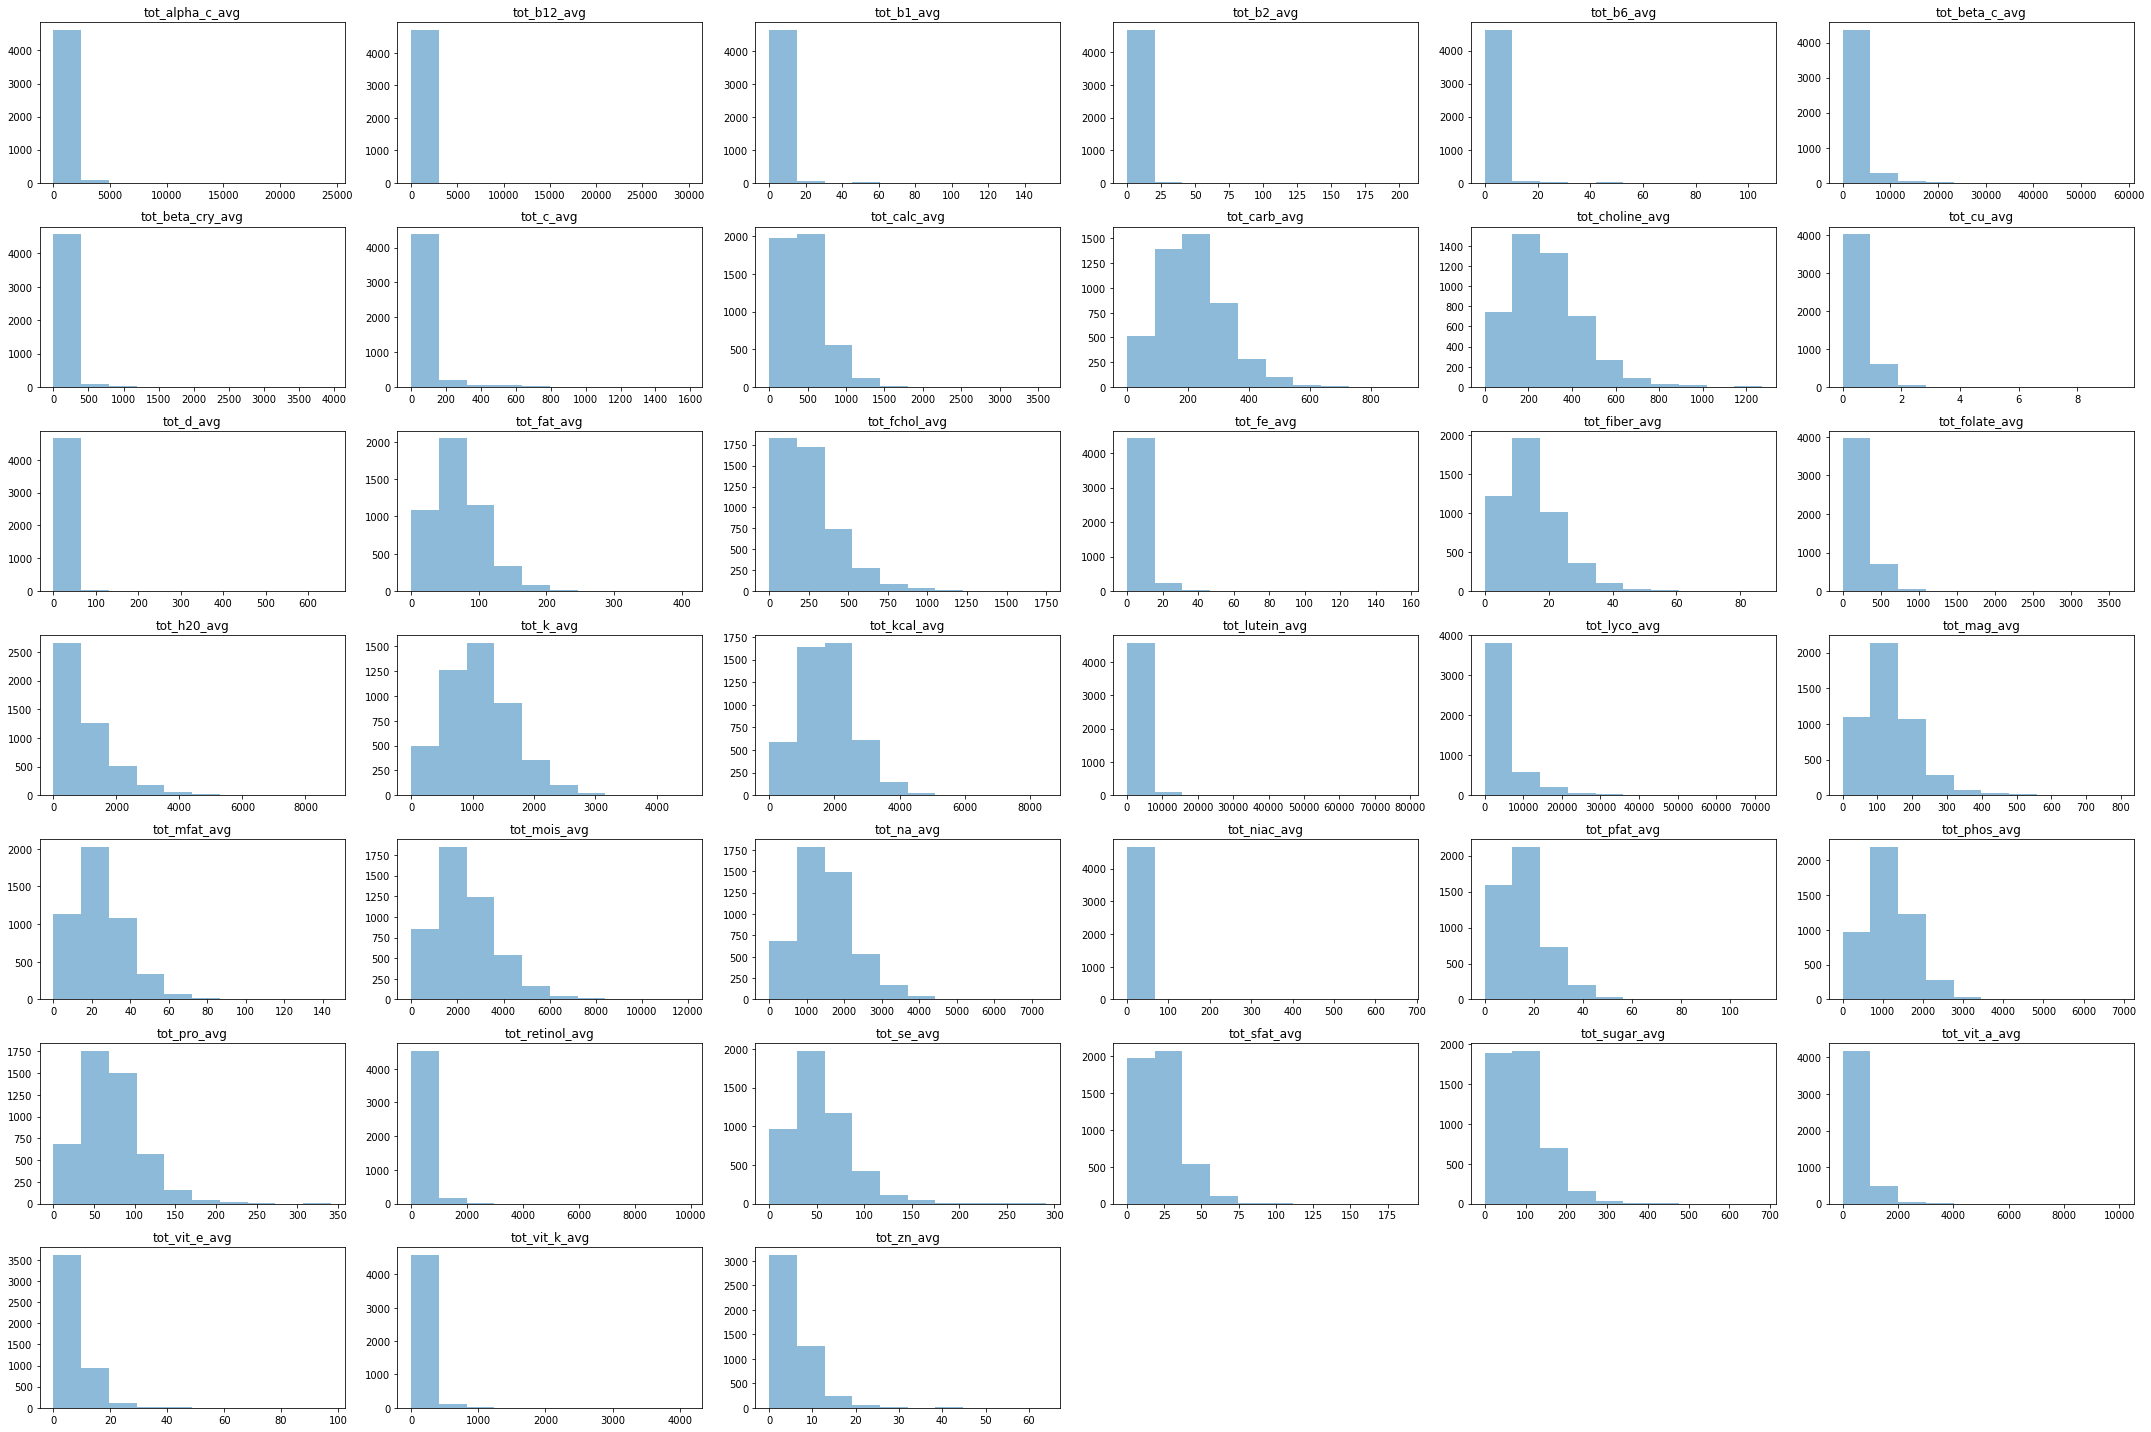

In [324]:
total_intake_continuous.hist(grid=False, alpha=0.5, figsize=(30, 20))
plt.tight_layout()

In [355]:
total_intake_log_continuous = nhanes_full_df[
    ['log_DR1TCAFF', 'log_tot_kcal_avg', 'log_tot_pro_avg', 
     'log_tot_carb_avg', 'log_tot_sugar_avg', 'log_tot_fiber_avg', 
     'log_tot_fat_avg', 'log_tot_sfat_avg', 'log_tot_mfat_avg', 
     'log_tot_pfat_avg', 'log_tot_fchol_avg', 'log_tot_vit_e_avg', 
     'log_tot_retinol_avg', 'log_tot_vit_a_avg', 'log_tot_alpha_c_avg', 
     'log_tot_beta_c_avg', 'log_tot_beta_cry_avg', 'log_tot_lyco_avg', 
     'log_tot_lutein_avg', 'log_tot_choline_avg', 'log_tot_vit_k_avg',
     'log_tot_phos_avg', 'log_tot_mois_avg', 'log_tot_h20_avg', 
     'log_tot_b1_avg', 'log_tot_b2_avg', 'log_tot_niac_avg', 
     'log_tot_niac_avg', 'log_tot_b6_avg', 'log_tot_b12_avg',
     'log_tot_c_avg', 'log_tot_d_avg', 'log_tot_calc_avg',
     'log_tot_mag_avg', 'log_tot_fe_avg', 'log_tot_zn_avg',
     'log_tot_cu_avg', 'log_tot_na_avg', 'log_tot_k_avg',
     'log_tot_se_avg', 'log_tot_folate_avg']]

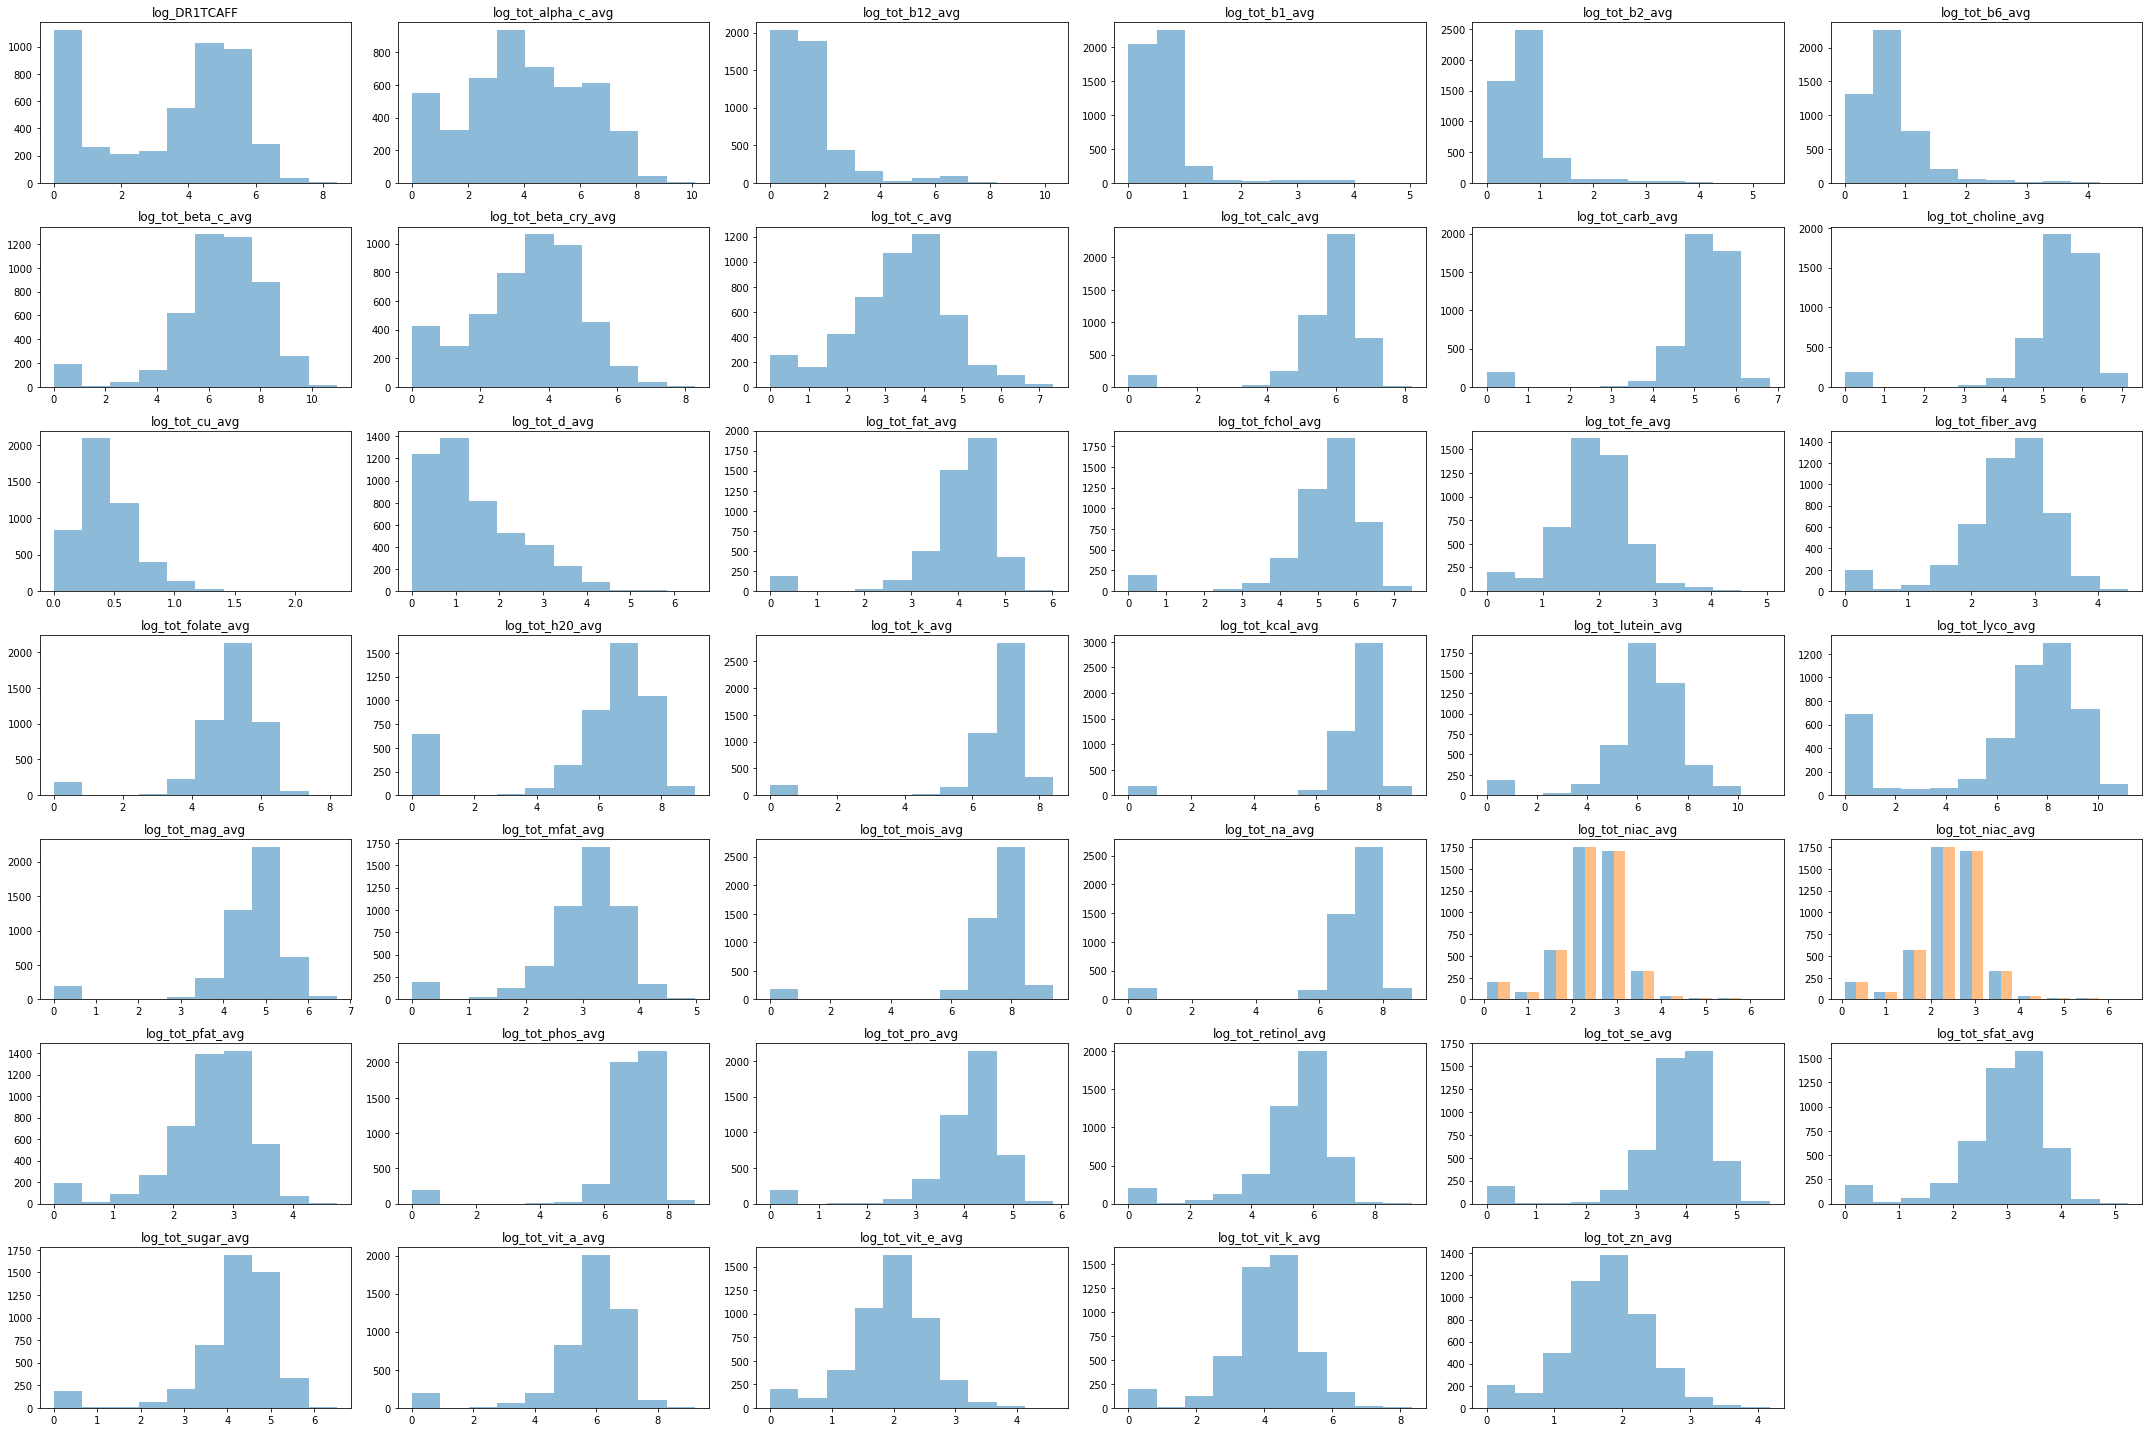

In [356]:
total_intake_log_continuous.hist(grid=False, alpha=0.5, figsize=(30, 20))
plt.tight_layout()

## convert questions to dummy variables for modeling

1 = yes; 2 = no; 7 = refused; 9 = don’t know
MCQ160B		Ever told had congestive heart failure
MCQ160C    Ever told you had coronary heart disease
MCQ160D    Ever told you had angina/angina pectoris
MCQ160E    Ever told you had heart attack
MCQ300A    Close relative had heart attack?
MCQ365C    Doctor told you to reduce salt in diet
MCQ365D    Doctor told you to reduce fat/calories
MCQ370A    Are you now controlling or losing weight
MCQ370C    Are you now reducing salt in diet
MCQ370D    Are you now reducing fat in diet


1 = yes; 2 = no; 7 = refused; 9 = don’t know
BPQ020     Ever told you had high blood pressure
BPQ030     Told had high blood pressure - 2+ times
BPQ040A    Taking prescription for hypertension
**BPQ050A    Now taking prescribed medicine for HBP**
BPQ080     Doctor told you - high cholesterol level
BPQ060     Ever had blood cholesterol checked
BPQ070     4711 non-null float64
BPQ090D    Told to take prescription for cholesterol
BPQ100D    1524 non-null float64

DBQ095Z     Type of table salt used
1=Ordinary salt; 2=lite salt; 3 = salt sub; 4 = no added salt; 
DBD100      How often add salt to food at table
1=rarely; 2=occasionally; 3=very often; 7=refused; 9=don’t know
DRQSPREP    Salt used in preparation?
1=never; 2=rarely; 3=occasionally; 4=v often; 9=don’t know
DR1STY      Salt used at table yesterday?
1 = yes; 2 = no; 9 = don’t know
DRQSDIET    On special diet?
1 = yes; 2 = no; 9 = don’t know

1 = yes; 2 = no; 7 = refused; 9 = don’t know
DS1DS       Any Dietary Supplements Taken?
DS1AN       Any Antacids Taken?

In [302]:
question_list = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ300A',
             'MCQ365C', 'MCQ365D', 'MCQ370A', 'MCQ370C', 'MCQ370D',  
             'BPQ020', 'BPQ030', 'BPQ040A', 'BPQ050A', 'BPQ080', 
             'BPQ060', 'BPQ070', 'BPQ090D', 'BPQ100D', 'DBD100', 
             'DRQSPREP', 'DR1STY', 'DRQSDIET', 'DR2STY', 'DS1DS', 
             'DS1AN', 'DS2DS', 'DS2AN'] 

In [303]:
for column in question_list:
    nhanes_full_df = pd.concat([nhanes_full_df, pd.get_dummies(nhanes_full_df[column], prefix=column, drop_first=True)], axis=1)


In [304]:
nhanes_full_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTINT2YR,WTMEC2YR,INDFMPIR,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ300A,MCQ365C,MCQ365D,MCQ370A,MCQ370C,MCQ370D,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMDAVSAD,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,bp_sys_avg,bp_dis_avg,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCK,LBXSCLSI,LBXSCR,LBXSGL,LBXSIR,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBXSTP,LBXSTR,LBXSUA,LBDHDD,LBXTC,LBXHSCRP,WTDRD1_x,WTDR2D_x,DRDINT_x,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TCAFF,DRD360,DR2STY,WTDRD1_x,WTDR2D_x,DS1DS,DS1AN,DS2DS,DS2AN,tot_kcal_avg,tot_pro_avg,tot_carb_avg,tot_sugar_avg,tot_fiber_avg,tot_fat_avg,tot_sfat_avg,tot_mfat_avg,tot_pfat_avg,tot_fchol_avg,tot_vit_e_avg,tot_retinol_avg,tot_vit_a_avg,tot_alpha_c_avg,tot_beta_c_avg,tot_beta_cry_avg,tot_lyco_avg,tot_lutein_avg,vit_b1_avg,vit_b2_avg,niac_avg,vit_b6_avg,folate_avg,folic_acid_avg,food_fol_avg,folate_dfe_avg,tot_choline_avg,vit_b12_avg,vit_c_avg,vit_d_avg,tot_vit_k_avg,calc_avg,tot_phos_avg,mag_avg,fe_avg,zn_avg,cu_avg,na_avg,k_avg,se_avg,tot_mois_avg,tot_h20_avg,supp_b1_avg,supp_b2_avg,supp_nia_avg,supp_b6_avg,supp_b12_avg,supp_folate_avg,supp_folfde_avg,supp_c_avg,supp_d_avg,supp_ca_avg,supp_mg_avg,supp_fe_avg,supp_zn_avg,supp_cu_avg,supp_na_avg,supp_potk_avg,supp_se_avg,tot_b1_avg,tot_b2_avg,tot_niac_avg,tot_b6_avg,tot_b12_avg,tot_c_avg,tot_d_avg,tot_calc_avg,tot_mag_avg,tot_fe_avg,tot_zn_avg,tot_cu_avg,tot_na_avg,tot_k_avg,tot_se_avg,tot_folate_avg,heart_dz,log_BMXWT,log_BMXBMI,log_BMXWAIST,log_bp_sys_avg,log_bp_dis_avg,log_LBXWBCSI,log_LBXLYPCT,log_LBXMOPCT,log_LBXEOPCT,log_LBXBAPCT,log_LBDLYMNO,log_LBDMONO,log_LBDNENO,log_LBDEONO,log_LBXRBCSI,log_LBXHCT,log_LBXRDW,log_LBXPLTSI,log_LBXMPSI,log_LBXSAPSI,log_LBXSASSI,log_LBXSATSI,log_LBXSBU,log_LBXSCA,log_LBXSCH,log_LBXSCK,log_LBXSCLSI,log_LBXSCR,log_LBXSGL,log_LBXSIR,log_LBXSKSI,log_LBXSLDSI,log_LBXSNASI,log_LBXSOSSI,log_LBXSPH,log_LBDSPHSI,log_LBXSTB,log_LBXSTP,log_LBXSTR,log_LBXSUA,log_LBDHDD,log_LBXTC,log_LBXHSCRP,log_DR1TCAFF,log_tot_kcal_avg,log_tot_pro_avg,log_tot_carb_avg,log_tot_sugar_avg,log_tot_fiber_avg,log_tot_fat_avg,log_tot_sfat_avg,log_tot_mfat_avg,log_tot_pfat_avg,log_tot_fchol_avg,log_tot_vit_e_avg,log_tot_retinol_avg,log_tot_vit_a_avg,log_tot_alpha_c_avg,log_tot_beta_c_avg,log_tot_beta_cry_avg,log_tot_lyco_avg,log_tot_lutein_avg,log_vit_b1_avg,log_vit_b2_avg,log_niac_avg,log_vit_b6_avg,log_folate_avg,log_folic_acid_avg,log_food_fol_avg,log_folate_dfe_avg,log_tot_choline_avg,log_vit_b12_avg,log_vit_c_avg,log_vit_d_avg,log_tot_vit_k_avg,log_calc_avg,log_tot_phos_avg,log_mag_avg,log_fe_avg,log_zn_avg,log_cu_avg,log_na_avg,log_k_avg,log_se_avg,log_tot_mois_avg,log_tot_h20_avg,log_tot_b1_avg,log_tot_b2_avg,log_tot_niac_avg,log_tot_b6_avg,log_tot_b12_avg,log_tot_c_avg,log_tot_d_avg,log_tot_calc_avg,log_tot_mag_avg,log_tot_fe_avg,log_tot_zn_avg,log_tot_cu_avg,log_tot_na_avg,log_tot_k_avg,log_tot_se_avg,log_tot_folate_avg,MCQ160B_2.0,MCQ160B_9.0,MCQ160C_2.0,MCQ160C_9.0,MCQ160D_2.0,MCQ160D_9.0,MCQ160E_2.0,MCQ160E_9.0,MCQ300A_2.0,MCQ300A_7.0,MCQ300A_9.0,MCQ365C_2.0,MCQ365C_9.0,MCQ365D_2.0,MCQ365D_9.0,MCQ370A_2.0,MCQ370A_9.0,MCQ370C_2.0,MCQ370C_9.0,MCQ370D_2.0,MCQ370D_9.0,BPQ020_2.0,BPQ020_9.0,BPQ030_2.0,BPQ030_9.0,BPQ040A_2.0,BPQ040A_9.0,BPQ050A_2.0,BPQ050A_9.0,BPQ080_2.0,BPQ080_9.0,BPQ060_2.0,BPQ060_9.0,BPQ070_2.0,BPQ070_3.0,BPQ070_4.0,BPQ070_9.0,BPQ090D_2.0,BPQ090D_9.0,BPQ100D_2.0,BPQ100D_9.0,DBD100_1.0,DBD100_2.0,DBD100_3.0,DBD100_9.0,DRQSPREP_1.0,DRQSPREP_2.0,DRQSPREP_3.0,DRQSPREP_4.0,DRQSPREP_9.0,DR1STY_1.0,DR1STY_2.0,DR1STY_9.0,DRQSDIET_1.0,DRQSDIET_2.0,DRQSDIET_9.0,DR2STY_1.0,DR2STY_2.0,DR2STY_9.0,DS1DS_1.0,DS1DS_2.0,DS1AN_1.0,DS1AN_2.0,DS2DS_1.0,DS2DS_2.0,DS2AN_1.0,DS2AN_2.0
0,83732.0,1,62.0,134671.370419,135629.507405,4.39,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,94.8,184.5,27.8,101.1,22.8,2.

# should these columns be dropped

In [ ]:
#drop original columns after values converted to columns
#retain target values of heart disease indicators
nhanes_full_df = nhanes_full_df.drop(
    ['MCQ300A', 'MCQ365C', 'MCQ365D', 'MCQ370A', 'MCQ370C', 'MCQ370D', 
     'BPQ020', 'BPQ030', 'BPQ040A', 'BPQ050A', 'BPQ080', 'BPQ060', 
     'BPQ070', 'BPQ090D', 'BPQ100D', 'DBD100', 'DRQSPREP', 'DR1STY', 
     'DRQSDIET', 'DR2STY', 'DS1DS', 'DS1AN', 'DS2DS', 'DS2AN'], axis=1)

In [305]:
nhanes_full_df.columns.tolist()

['SEQN',
 'RIAGENDR',
 'RIDAGEYR',
 'WTINT2YR',
 'WTMEC2YR',
 'INDFMPIR',
 'MCQ160B',
 'MCQ160C',
 'MCQ160D',
 'MCQ160E',
 'MCQ300A',
 'MCQ365C',
 'MCQ365D',
 'MCQ370A',
 'MCQ370C',
 'MCQ370D',
 'BMXWT',
 'BMXHT',
 'BMXBMI',
 'BMXWAIST',
 'BMDAVSAD',
 'BPQ020',
 'BPQ030',
 'BPQ040A',
 'BPQ050A',
 'BPQ080',
 'BPQ060',
 'BPQ070',
 'BPQ090D',
 'BPQ100D',
 'bp_sys_avg',
 'bp_dis_avg',
 'LBXWBCSI',
 'LBXLYPCT',
 'LBXMOPCT',
 'LBXNEPCT',
 'LBXEOPCT',
 'LBXBAPCT',
 'LBDLYMNO',
 'LBDMONO',
 'LBDNENO',
 'LBDEONO',
 'LBXRBCSI',
 'LBXHGB',
 'LBXHCT',
 'LBXMCVSI',
 'LBXMCHSI',
 'LBXRDW',
 'LBXPLTSI',
 'LBXMPSI',
 'LBXSAL',
 'LBXSAPSI',
 'LBXSASSI',
 'LBXSATSI',
 'LBXSBU',
 'LBXSC3SI',
 'LBXSCA',
 'LBXSCH',
 'LBXSCK',
 'LBXSCLSI',
 'LBXSCR',
 'LBXSGL',
 'LBXSIR',
 'LBXSKSI',
 'LBXSLDSI',
 'LBXSNASI',
 'LBXSOSSI',
 'LBXSPH',
 'LBDSPHSI',
 'LBXSTB',
 'LBXSTP',
 'LBXSTR',
 'LBXSUA',
 'LBDHDD',
 'LBXTC',
 'LBXHSCRP',
 'WTDRD1_x',
 'WTDR2D_x',
 'DRDINT_x',
 'DBQ095Z',
 'DBD100',
 'DRQSPREP',
 'DR1STY',


# unsupervised
## clustering
attempt to cluster lab data and body measurement data

#### creating dfs with variables for clustering
3 versions

In [390]:
#contains both mec & lab data + 'WTMEC2YR' weight
nhanes_cluster_df = nhanes_full_df[
    ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'WTMEC2YR', 'INDFMPIR', 
     'log_BMXWT', 'BMXHT', 'log_BMXBMI', 'log_BMXWAIST', 'BMDAVSAD',
     'log_bp_sys_avg', 'log_bp_dis_avg', 'log_LBXWBCSI', 'log_LBXLYPCT',
     'log_LBXMOPCT', 'LBXNEPCT', 'log_LBXEOPCT', 'log_LBXBAPCT', 
     'log_LBDLYMNO', 'log_LBDMONO', 'log_LBDNENO', 'log_LBDEONO',
     'log_LBXRBCSI', 'LBXHGB', 'log_LBXHCT', 'LBXMCVSI', 'LBXMCHSI',
     'log_LBXRDW', 'log_LBXPLTSI', 'log_LBXMPSI', 'LBXSAL', 'log_LBXSAPSI',
     'log_LBXSASSI', 'log_LBXSATSI', 'log_LBXSBU', 'LBXSC3SI', 'log_LBXSCA',
     'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI', 'log_LBXSCR', 'log_LBXSGL',
     'log_LBXSIR', 'log_LBXSKSI', 'log_LBXSLDSI', 'log_LBXSNASI', 'log_LBXSOSSI',
     'log_LBXSPH', 'log_LBDSPHSI', 'log_LBXSTB', 'log_LBXSTP', 'log_LBXSTR',
     'log_LBXSUA', 'log_LBDHDD', 'log_LBXTC', 'log_LBXHSCRP',]]

In [391]:
nhanes_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 9963
Data columns (total 56 columns):
SEQN              4712 non-null float64
RIAGENDR          4712 non-null int64
RIDAGEYR          4712 non-null float64
WTMEC2YR          4712 non-null float64
INDFMPIR          4712 non-null float64
log_BMXWT         4712 non-null float64
BMXHT             4712 non-null float64
log_BMXBMI        4712 non-null float64
log_BMXWAIST      4712 non-null float64
BMDAVSAD          4712 non-null float64
log_bp_sys_avg    4712 non-null float64
log_bp_dis_avg    4712 non-null float64
log_LBXWBCSI      4712 non-null float64
log_LBXLYPCT      4712 non-null float64
log_LBXMOPCT      4712 non-null float64
LBXNEPCT          4712 non-null float64
log_LBXEOPCT      4712 non-null float64
log_LBXBAPCT      4712 non-null float64
log_LBDLYMNO      4712 non-null float64
log_LBDMONO       4712 non-null float64
log_LBDNENO       4712 non-null float64
log_LBDEONO       4712 non-null float64
log_LBXRBCSI   

In [392]:
# mec cluster without weights
nhanes_mec_cluster_df = nhanes_full_df[
    ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'log_BMXWT', 
     'BMXHT', 'log_BMXBMI', 'log_BMXWAIST', 
     'BMDAVSAD', 'log_bp_sys_avg', 'log_bp_dis_avg']]

In [393]:
nhanes_mec_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 9963
Data columns (total 10 columns):
SEQN              4712 non-null float64
RIAGENDR          4712 non-null int64
RIDAGEYR          4712 non-null float64
log_BMXWT         4712 non-null float64
BMXHT             4712 non-null float64
log_BMXBMI        4712 non-null float64
log_BMXWAIST      4712 non-null float64
BMDAVSAD          4712 non-null float64
log_bp_sys_avg    4712 non-null float64
log_bp_dis_avg    4712 non-null float64
dtypes: float64(9), int64(1)
memory usage: 404.9 KB


In [394]:
# lab cluster without weights
nhanes_lab_cluster_df = nhanes_full_df[
    ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'log_LBXWBCSI', 'log_LBXLYPCT',
     'log_LBXMOPCT', 'LBXNEPCT', 'log_LBXEOPCT', 'log_LBXBAPCT', 
     'log_LBDLYMNO', 'log_LBDMONO', 'log_LBDNENO', 'log_LBDEONO',
     'log_LBXRBCSI', 'LBXHGB', 'log_LBXHCT', 'LBXMCVSI', 'LBXMCHSI',
     'log_LBXRDW', 'log_LBXPLTSI', 'log_LBXMPSI', 'LBXSAL', 
     'log_LBXSAPSI', 'log_LBXSASSI', 'log_LBXSATSI', 'log_LBXSBU', 
     'LBXSC3SI', 'log_LBXSCA', 'log_LBXSCH', 'log_LBXSCK', 'log_LBXSCLSI', 
     'log_LBXSCR', 'log_LBXSGL', 'log_LBXSIR', 'log_LBXSKSI', 'log_LBXSLDSI', 
     'log_LBXSNASI', 'log_LBXSOSSI', 'log_LBXSPH', 'log_LBDSPHSI', 
     'log_LBXSTB', 'log_LBXSTP', 'log_LBXSTR','log_LBXSUA', 
     'log_LBDHDD', 'log_LBXTC', 'log_LBXHSCRP',]]

In [395]:
nhanes_lab_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 9963
Data columns (total 47 columns):
SEQN            4712 non-null float64
RIAGENDR        4712 non-null int64
RIDAGEYR        4712 non-null float64
log_LBXWBCSI    4712 non-null float64
log_LBXLYPCT    4712 non-null float64
log_LBXMOPCT    4712 non-null float64
LBXNEPCT        4712 non-null float64
log_LBXEOPCT    4712 non-null float64
log_LBXBAPCT    4712 non-null float64
log_LBDLYMNO    4712 non-null float64
log_LBDMONO     4712 non-null float64
log_LBDNENO     4712 non-null float64
log_LBDEONO     4712 non-null float64
log_LBXRBCSI    4712 non-null float64
LBXHGB          4712 non-null float64
log_LBXHCT      4712 non-null float64
LBXMCVSI        4712 non-null float64
LBXMCHSI        4712 non-null float64
log_LBXRDW      4712 non-null float64
log_LBXPLTSI    4712 non-null float64
log_LBXMPSI     4712 non-null float64
LBXSAL          4712 non-null float64
log_LBXSAPSI    4712 non-null float64
log_LBXSASSI    4712 

## normalize data

In [308]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

In [363]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = nhanes_cluster_df
X_std = scaler.fit_transform(X)

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [400]:
X_std

array([[-1.73018312, -1.00254994,  0.93837642, ..., -0.35602814,
        -0.16680884, -0.76973186],
       [-1.72983521, -1.00254994,  0.49447731, ...,  0.69718171,
         1.75722325, -0.2747466 ],
       [-1.72948729, -1.00254994,  1.72753038, ..., -1.77570373,
         1.09803394, -0.76973186],
       ...,
       [ 1.73435027, -1.00254994, -0.54128727, ..., -0.82193733,
         0.48708857, -0.2747466 ],
       [ 1.73469818, -1.00254994, -0.88654213, ..., -0.14494847,
        -0.51880802,  0.28624304],
       [ 1.73608984,  0.99745655,  1.62888614, ...,  0.95379636,
        -1.12009823, -0.00233656]])

In [398]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = nhanes_mec_cluster_df
X_mec = scaler.fit_transform(X)

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [401]:
X_mec

array([[-1.73018312, -1.00254994,  0.93837642, ...,  0.11990712,
         0.09113671, -0.15829856],
       [-1.72983521, -1.00254994,  0.49447731, ...,  1.07087608,
         1.05635721,  1.36587117],
       [-1.72948729, -1.00254994,  1.72753038, ...,  0.92294757,
         0.80869067, -2.17484635],
       ...,
       [ 1.73435027, -1.00254994, -0.54128727, ...,  0.11990712,
        -0.35869185, -0.4480417 ],
       [ 1.73469818, -1.00254994, -0.88654213, ..., -0.74653126,
        -0.57261795,  0.67968185],
       [ 1.73608984,  0.99745655,  1.62888614, ..., -0.02802138,
        -0.61615974, -1.93735586]])

In [399]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = nhanes_lab_cluster_df
X_lab = scaler.fit_transform(X)

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [402]:
X_lab

array([[-1.73018312, -1.00254994,  0.93837642, ..., -0.35602814,
        -0.16680884, -0.76973186],
       [-1.72983521, -1.00254994,  0.49447731, ...,  0.69718171,
         1.75722325, -0.2747466 ],
       [-1.72948729, -1.00254994,  1.72753038, ..., -1.77570373,
         1.09803394, -0.76973186],
       ...,
       [ 1.73435027, -1.00254994, -0.54128727, ..., -0.82193733,
         0.48708857, -0.2747466 ],
       [ 1.73469818, -1.00254994, -0.88654213, ..., -0.14494847,
        -0.51880802,  0.28624304],
       [ 1.73608984,  0.99745655,  1.62888614, ...,  0.95379636,
        -1.12009823, -0.00233656]])

### divide into training and test sets?

X_train, X_test = train_test_split(
    X_std,
    test_size=0.9,
    random_state=42)

### X_std clustering, reference

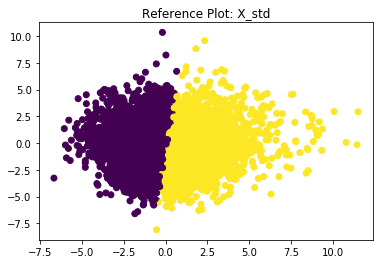

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0       233  2264
1      2119    96


In [427]:
# Reduce data to two components for plotting
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_std = KMeans(n_clusters=2, random_state=42).fit_predict(X_std)
y_pred_pca = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca)
plt.title('Reference Plot: X_std')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_pca, y_std))

### X_std, fit kmeans

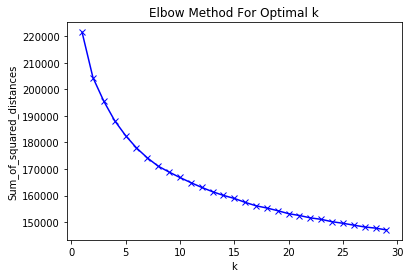

In [405]:
# find k
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

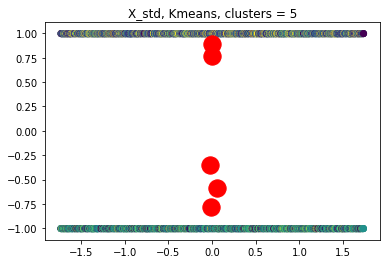

In [421]:
#X_std, using 5 clusters
kmeans5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
pred_y = kmeans5.fit_predict(X_std)

plt.scatter(X_std[:,0], X_std[:,1], c=pred_y)
plt.scatter(kmeans5.cluster_centers_[:, 0], 
            kmeans5.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_std, Kmeans, clusters = 5')
plt.show()

In [432]:
kmeans5.cluster_centers_

array([[-0.02334005, -0.98943514,  0.41938909,  1.10296463,  0.90957849,
         0.79889079,  1.01449711,  1.06905151,  0.54359381,  0.41860662],
       [ 0.01372161,  0.51541339, -0.95148137, -1.08184165, -0.51979503,
        -0.971021  , -1.13695362, -1.06489913, -0.92418757, -0.59579833],
       [ 0.0183988 , -0.96362488, -0.21760798, -0.03318458,  0.74682174,
        -0.41970596, -0.32113652, -0.37601472, -0.14726264, -0.00440756],
       [-0.05056223,  0.97647746,  0.13324162,  0.76425419, -0.51075088,
         1.13098267,  0.92551986,  0.91050936,  0.04991033,  0.09669287],
       [ 0.03786629,  0.70069748,  0.92693762, -0.6041747 , -0.81037105,
        -0.27576716, -0.21565794, -0.28306235,  0.74373497,  0.21087637]])

In [423]:
print(pd.crosstab(pred_y, y_std))

col_0     0     1
row_0            
0       223   565
1      1345    87
2        40  1230
3       245   459
4       499    19


In [434]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
silhoueette_kmeans5 = silhouette_score(X_std, kmeans5.labels_)

print('X_std, Kmeans, clusters = 5')
print(silhoueette_kmeans5)

X_std, Kmeans, clusters = 5
0.014477602503315812


In [425]:
pred_y

array([2, 2, 0, ..., 2, 2, 0])

In [435]:
identify_clusters = kmeans5.fit_predict(X_std)
identify_clusters

array([2, 2, 0, ..., 2, 2, 0])

### X_mec clustering, reference

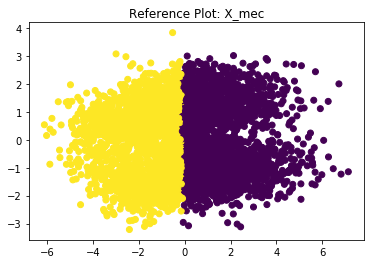

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0         5  2509
1      2166    32


In [430]:
# Reduce data to two components for plotting
X_mec_pca = PCA(2).fit_transform(X_mec)

# Calculate predicted values.
y_mec = KMeans(n_clusters=2, random_state=42).fit_predict(X_mec)
y_pred_mpca = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_mpca)
plt.title('Reference Plot: X_mec')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_mpca, y_mec))

### X_mec, fit kmeans

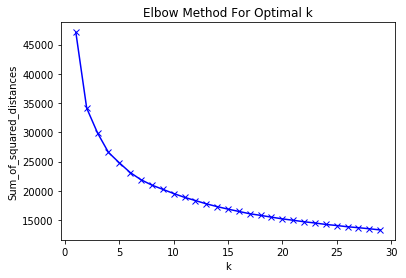

In [429]:
# find k
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_mec)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

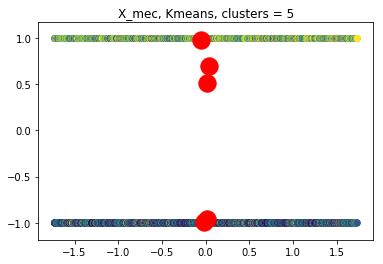

In [436]:
#X_std, using 5 clusters
kmeans_mec5 = KMeans(n_clusters=5, init='random', random_state=42)
mpred_y = kmeans_mec5.fit_predict(X_mec)

plt.scatter(X_mec[:,0], X_mec[:,1], c=mpred_y)
plt.scatter(kmeans_mec5.cluster_centers_[:, 0], 
            kmeans_mec5.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_mec, Kmeans, clusters = 5')
plt.show()

In [437]:
kmeans_mec5.cluster_centers_

array([[-0.02334005, -0.98943514,  0.41938909,  1.10296463,  0.90957849,
         0.79889079,  1.01449711,  1.06905151,  0.54359381,  0.41860662],
       [ 0.01372161,  0.51541339, -0.95148137, -1.08184165, -0.51979503,
        -0.971021  , -1.13695362, -1.06489913, -0.92418757, -0.59579833],
       [ 0.0183988 , -0.96362488, -0.21760798, -0.03318458,  0.74682174,
        -0.41970596, -0.32113652, -0.37601472, -0.14726264, -0.00440756],
       [-0.05056223,  0.97647746,  0.13324162,  0.76425419, -0.51075088,
         1.13098267,  0.92551986,  0.91050936,  0.04991033,  0.09669287],
       [ 0.03786629,  0.70069748,  0.92693762, -0.6041747 , -0.81037105,
        -0.27576716, -0.21565794, -0.28306235,  0.74373497,  0.21087637]])

In [438]:
print(pd.crosstab(mpred_y, y_mec))

col_0     0    1
row_0           
0         0  915
1      1059    0
2       604  474
3        55  803
4       453  349


In [439]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
silhoueette_kmeans_mec5 = silhouette_score(X_mec, kmeans_mec5.labels_)

print('X_mec, Kmeans, clusters = 5')
print(silhoueette_kmeans_mec5)

X_mec, Kmeans, clusters = 5
0.17181509062612688


In [440]:
mpred_y

array([0, 0, 0, ..., 2, 1, 4])

In [441]:
identify_clusters = kmeans_mec5.fit_predict(X_mec)
identify_clusters

array([0, 0, 0, ..., 2, 1, 4])

### X_lab clustering, reference

In [ ]:
# Reduce data to two components for plotting
X_pca = PCA(2).fit_transform(X_lab)

# Calculate predicted values.
y_lab = KMeans(n_clusters=2, random_state=42).fit_predict(X_lab)
y_pred_lpca = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_lpca)
plt.title('Reference Plot: X_lab')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_lpca, y_lab))

### X_lab, fit kmeans

In [ ]:
# find k
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_lab)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

In [ ]:
#X_lab, using N clusters
# change all N
kmeans_labN = KMeans(n_clusters=N, init='k-means++', random_state=42)
pred_y_lab = kmeans_labN.fit_predict(X_lab)

plt.scatter(X_lab[:,0], X_lab[:,1], c=pred_y_lab)
plt.scatter(kmeans_labN.cluster_centers_[:, 0], 
            kmeans_labN.cluster_centers_[:, 1], s=300, c='red')
plt.title('X_lab, Kmeans, clusters = 5')
plt.show()

In [ ]:
kmeans_labN.cluster_centers_

In [ ]:
print(pd.crosstab(pred_y_lab, y_lab))

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
silhoueette_kmeans_labN = silhouette_score(X_lab, kmeans_labN.labels_)

print('X_lab, Kmeans, clusters = N')
print(silhoueette_kmeans_labN)

nhanes_cluster_df; X_std; *y_std*; y_pred_pca; kmeans5; *pred_y*; silhoueette_kmeans5

nhanes_mec_cluster_df; X_mec; *y_mec;* y_pred_mpca; kmeans_mec5; *mpred_y*; silhoueette_kmeans_mec5

nhanes_lab_cluster_df; X_lab; *y_lab;* y_pred_lpca; kmeans_labN; *pred_y_lab ;* 

### mini batch kmeans

#### mini batch kmeans with 'random' centroids

In [382]:
#initiate random centroids
# Each batch will be made up of 200 data points.
minibatch_random = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200,
    random_state=42)
minibatch_random.fit(X_std)

# Predict new MiniBatch cluster memberships.
predict_mini_2random = minibatch_random.predict(X_std)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and minibatch_random k-means solutions:')
print(pd.crosstab(predict_mini_2random, pred_y))

Comparing k-means and minibatch_random k-means solutions:
col_0    0    1    2    3    4    5    6    7   8    9
row_0                                                 
0        0    0    0  462    0    0    0    0   1    0
1      162  698  420    0  669  415  585  616  21  663


In [ ]:
#finding the centroid
minibatch_random.cluster_centers_

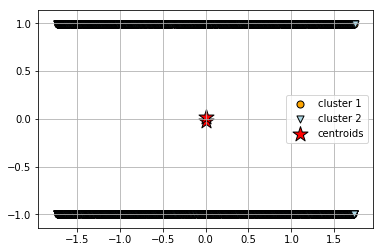

In [383]:
# plot the 10 clusters (random)

plt.scatter(
    X_std[predict_mini_2random == 0,0], X_std[predict_mini_2random == 0, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1')

plt.scatter(
    X_std[predict_mini_2random == 1, 0], X_std[predict_mini_2random == 1, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2')


# plot the centroids
plt.scatter(
    minibatch_random.cluster_centers_[:, 0], minibatch_random.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
# Calculate silhouette_score
silhoueette_minibatch_2random = silhouette_score(X_train, minibatch_random.labels_)
print(silhoueette_minibatch_2random)

In [ ]:
#initiate random centroids
# Each batch will be made up of 200 data points.
minibatch_random = MiniBatchKMeans(
    init='random',
    n_clusters=10,
    batch_size=200,
    random_state=42)
minibatch_random.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_mini_10random = minibatch_random.predict(X_train)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and minibatch_random k-means solutions:')
print(pd.crosstab(predict_mini_2random, pred_y))

In [ ]:
# plot the 10 clusters (random)

plt.scatter(
    X_train[predict_mini_10random == 0,0], X_train[predict_mini_10random == 0, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1')

plt.scatter(
    X_train[predict_mini_10random == 1, 0], X_train[predict_mini_10random == 1, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2')


# plot the centroids
plt.scatter(
    minibatch_random.cluster_centers_[:, 0], minibatch_random.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = minibatch_random.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
minibatch_random_labels = minibatch_random.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = minibatch_random_labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [ ]:
#### mini batch kmeans with 'k-means++' centroids

In [ ]:
#choosing centroid mean
minibatch_kmeans = MiniBatchKMeans(
    init='k-means++',
    n_clusters=2,
    batch_size=200,
    random_state=42)
X_train_mini = minibatch_kmeans.fit(X_train)

# Predict new MiniBatch cluster memberships.
predict_mini = minibatch_kmeans.predict(X_train)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and minibatch_kmeans solutions:')
print(pd.crosstab(predict_mini, pred_y))

In [ ]:
#finding the centroid
minibatch_kmeans.cluster_centers_

In [ ]:
print(pd.crosstab(predict_mini, predict_mini_random))

In [ ]:
# Calculate silhouette_score
silhoueette_minibatch_kmeans = silhouette_score(X_train, minibatch_kmeans.labels_)
print(silhoueette_minibatch_kmeans)

In [ ]:
# plot the 2 clusters (X_train)


plt.scatter(
    X_train[:,0], X_train[:, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1')

plt.scatter(
    X_train[:, 1], X_train[:, 0],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2')

# plot the centroids
plt.scatter(
    minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### mean shift

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# set the bandwidth automatically; function derives a bandwidth
# number based on an inspection of the distances among points 
# in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)

# plot the centroids
plt.scatter(
    ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')


plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In [ ]:
# Calculate silhouette_score
silhoueette_mean_shift = silhouette_score(X_train, ms.labels_)
print(silhoueette_mean_shift)

### AffinityPropagation

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# did not provide arguments to the model
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
af_labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = af_labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### spectral clustering

# unbalanced data  smote only on training
feed the supervised model

#### List of sample weight variables included in files, not included in :
**demog_df: 9972**   
'WTINT2YR' = full sample 2 year interview weight;
'WTMEC2YR' = full sample 2 year MEC exam weight.

**tot_intake1_df, tot_intake2_df: 9545**
'WTDRD1' = Dietary day one sample weight
'WTDR2D' = Dietary two-day sample weight

**tot_diet_supp_1_df, tot_diet_supp_2_df: 9545**
'WTDRD1' = Dietary day one sample weight
'WTDR2D' = Dietary two-day sample weight

MCQ160B		Ever told had congestive heart failure
1 = yes; 2 = no; 7 = refused; 9 = don’t know
MCQ160C    Ever told you had coronary heart disease
MCQ160D    Ever told you had angina/angina pectoris
MCQ160E    Ever told you had heart attack
MCQ300A    Close relative had heart attack?
MCQ365C    Doctor told you to reduce salt in diet
MCQ365D    Doctor told you to reduce fat/calories
MCQ370A    Are you now controlling or losing weight
MCQ370C    Are you now reducing salt in diet
MCQ370D    Are you now reducing fat in diet


BPQ020     Ever told you had high blood pressure
1 = yes; 2 = no; 7 = refused; 9 = don’t know
BPQ030     Told had high blood pressure - 2+ times
BPQ040A    Taking prescription for hypertension
**BPQ050A    Now taking prescribed medicine for HBP**
BPQ080     Doctor told you - high cholesterol level
BPQ060     Ever had blood cholesterol checked
**BPQ070     4711 non-null float64**
BPQ090D    Told to take prescription for cholesterol
**BPQ100D    1524 non-null float64**

DBQ095Z     Type of table salt used
1=Ordinary salt; 2=lite salt; 3 = salt sub; 4 = no added salt; 
DBD100      How often add salt to food at table
1=rarely; 2=occasionally; 3=very often; 7=refused; 9=don’t know
DRQSPREP    Salt used in preparation?
1=never; 2=rarely; 3=occasionally; 4=v often; 9=don’t know
DR1STY      Salt used at table yesterday?
1 = yes; 2 = no; 9 = don’t know
DRQSDIET    On special diet?
1 = yes; 2 = no; 9 = don’t know

DS1DS       Any Dietary Supplements Taken?
1 = yes; 2 = no; 7 = refused; 9 = don’t know
DS1AN       Any Antacids Taken?
